# Experiments

In [1]:
#!pip install matplotlib
#!pip install pandas
#!pip install tqdm

# code for importing from src
import os
os.chdir('../') # change working directory to the root of the project
# install package in editable mode
!pip install -e . 
os.chdir('src') # change working directory back to src

Obtaining file:///C:/Users/choho/Desktop/Master%20DS/Deep%20learning%20II/github/DeepLearning2-Project-M2DS
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: generative-model
    Found existing installation: generative-model 0.1
    Uninstalling generative-model-0.1:
      Successfully uninstalled generative-model-0.1
  Running setup.py develop for generative-model


In [2]:
# Import.
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from models.rbm import RBM
from models.dbn import DBN
from models.dnn import DNN
from utils import (
    load_mnist,
    load_alphadigit,
    read_alpha_digit,
    plot_characters_alphadigit,
    plot_generated_images
)

In [3]:
DATA_FOLDER = "../data/"
ALPHA_DIGIT_PATH = os.path.join(DATA_FOLDER, "binaryalphadigs.mat")
MNIST_PATH = os.path.join(DATA_FOLDER, "mnist_all.mat")

for path in [ALPHA_DIGIT_PATH, MNIST_PATH]:
    if not os.path.exists(path):
        raise FileNotFoundError(f"The file {path} does not exist.")

SEED = 42

## 1. Study on BinaryAlphaDigit

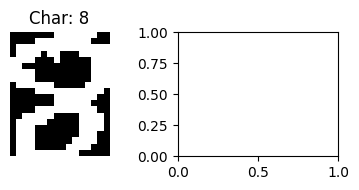

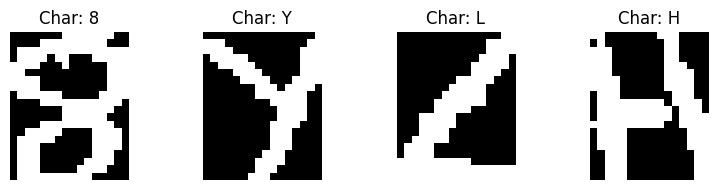

Original data: (36, 39)
Original data (unstack samples -> flatten images): (1365, 320)
Subset (1 character) data  (39, 320)
Subset (4 characters) data  (156, 320)


In [4]:
alphadigit = load_alphadigit(ALPHA_DIGIT_PATH)

chars_1 = [8]
chars_2 = chars_1 + ["Y"]
chars_3 = chars_2 + ["L"]
chars_4 = chars_3 + ["H"]
data_alpha_1 = read_alpha_digit(chars_1, data=alphadigit, use_data=True)
data_alpha_2 = read_alpha_digit(chars_2, data=alphadigit, use_data=True)
data_alpha_3 = read_alpha_digit(chars_3, data=alphadigit, use_data=True)
data_alpha_4 = read_alpha_digit(chars_4, data=alphadigit, use_data=True)

all_chars = np.arange(0, 35).tolist()
alphadigit_data = read_alpha_digit(all_chars, data=alphadigit, use_data=True) # read all characters

plot_characters_alphadigit(chars_1, data_alpha_1)
plot_characters_alphadigit(chars_4, data_alpha_4)

print("Original data:", alphadigit.shape)
print("Original data (unstack samples -> flatten images):", alphadigit_data.shape)
print(f"Subset ({len(chars_1)} character) data ", data_alpha_1.shape)
print(f"Subset ({len(chars_4)} characters) data ", data_alpha_4.shape)

### RBM

In [5]:
data_alpha = data_alpha_1
n_chars = data_alpha.shape[0] / 39

# Parameters
n_visible = data_alpha.shape[1]  # Number of visible units (size of each image)
n_hidden = 200  # Number of hidden units (hyperparameter)
learning_rate = 0.1
n_epochs = 100
batch_size = int(8 * n_chars)

# Initialize RBM
rbm = RBM(n_visible=n_visible, n_hidden=n_hidden, random_state=SEED)
print(rbm)

# Train RBM
rbm.train(data_alpha, learning_rate=learning_rate, n_epochs=n_epochs, batch_size=batch_size)

RBM(n_visible=320, n_hidden=200)


[0.2288,
 0.2056,
 0.2133,
 0.1863,
 0.184,
 0.1968,
 0.1862,
 0.1958,
 0.1735,
 0.1743,
 0.1879,
 0.1706,
 0.1564,
 0.1766,
 0.2011,
 0.158,
 0.199,
 0.1701,
 0.1641,
 0.2054,
 0.1746,
 0.1632,
 0.1348,
 0.1765,
 0.1417,
 0.1458,
 0.1404,
 0.1551,
 0.1345,
 0.1524,
 0.1437,
 0.1504,
 0.1596,
 0.1386,
 0.1311,
 0.1637,
 0.1363,
 0.1458,
 0.1603,
 0.1189,
 0.1173,
 0.1593,
 0.139,
 0.1317,
 0.1056,
 0.1481,
 0.1592,
 0.1063,
 0.1248,
 0.1268,
 0.1116,
 0.1078,
 0.1205,
 0.1015,
 0.1327,
 0.1222,
 0.1075,
 0.1284,
 0.1265,
 0.1534,
 0.0935,
 0.1138,
 0.1276,
 0.1299,
 0.1148,
 0.1249,
 0.1166,
 0.1173,
 0.1166,
 0.0965,
 0.1311,
 0.0987,
 0.109,
 0.1126,
 0.0896,
 0.1041,
 0.1231,
 0.1066,
 0.1022,
 0.1061,
 0.1104,
 0.1105,
 0.1055,
 0.1173,
 0.1136,
 0.1335,
 0.1006,
 0.1049,
 0.1133,
 0.1184,
 0.1014,
 0.1317,
 0.1081,
 0.0904,
 0.1172,
 0.085,
 0.1171,
 0.1191,
 0.1051,
 0.1293]

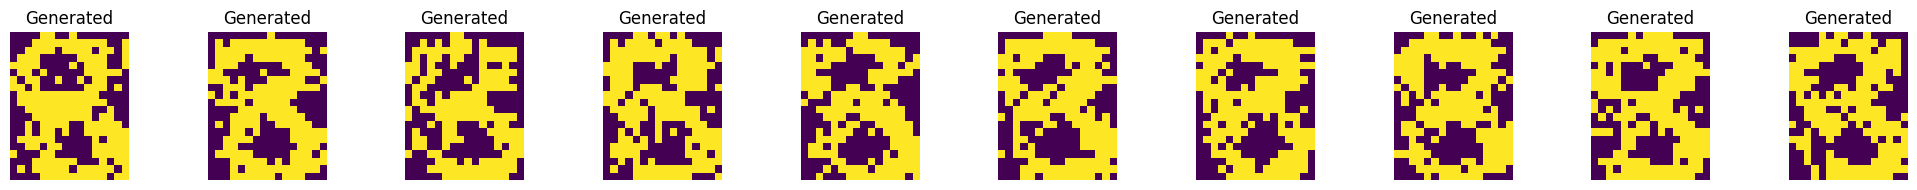

In [6]:
# Generate samples
generated_samples = rbm.generate_image(n_samples=10, n_gibbs_steps=1)

plot_generated_images(generated_samples, **{"cmap":None})

### DBN

In [7]:
data_alpha = data_alpha_1
n_chars = data_alpha.shape[0] / 39

# Parameters
n_visible = data_alpha.shape[1]  # Number of visible units (size of each image)
n_hidden = 200  # Number of hidden units (hyperparameter)
hidden_layer_sizes = [200, 200, 200]

learning_rate = 0.1
n_epochs = 100
batch_size = int(8 * n_chars)

dbn = DBN(n_visible=n_visible, hidden_layer_sizes=hidden_layer_sizes, random_state=SEED)
dbn.train(data_alpha, learning_rate=learning_rate, n_epochs=n_epochs, batch_size=batch_size)

Training RBM layers: 100%|██████████| 3/3 [00:01<00:00,  2.46layer/s]


([0.2288,
  0.2056,
  0.2133,
  0.1863,
  0.184,
  0.1968,
  0.1862,
  0.1958,
  0.1735,
  0.1743,
  0.1879,
  0.1706,
  0.1564,
  0.1766,
  0.2011,
  0.158,
  0.199,
  0.1701,
  0.1641,
  0.2054,
  0.1746,
  0.1632,
  0.1348,
  0.1765,
  0.1417,
  0.1458,
  0.1404,
  0.1551,
  0.1345,
  0.1524,
  0.1437,
  0.1504,
  0.1596,
  0.1386,
  0.1311,
  0.1637,
  0.1363,
  0.1458,
  0.1603,
  0.1189,
  0.1173,
  0.1593,
  0.139,
  0.1317,
  0.1056,
  0.1481,
  0.1592,
  0.1063,
  0.1248,
  0.1268,
  0.1116,
  0.1078,
  0.1205,
  0.1015,
  0.1327,
  0.1222,
  0.1075,
  0.1284,
  0.1265,
  0.1534,
  0.0935,
  0.1138,
  0.1276,
  0.1299,
  0.1148,
  0.1249,
  0.1166,
  0.1173,
  0.1166,
  0.0965,
  0.1311,
  0.0987,
  0.109,
  0.1126,
  0.0896,
  0.1041,
  0.1231,
  0.1066,
  0.1022,
  0.1061,
  0.1104,
  0.1105,
  0.1055,
  0.1173,
  0.1136,
  0.1335,
  0.1006,
  0.1049,
  0.1133,
  0.1184,
  0.1014,
  0.1317,
  0.1081,
  0.0904,
  0.1172,
  0.085,
  0.1171,
  0.1191,
  0.1051,
  0.1293,
  0.00

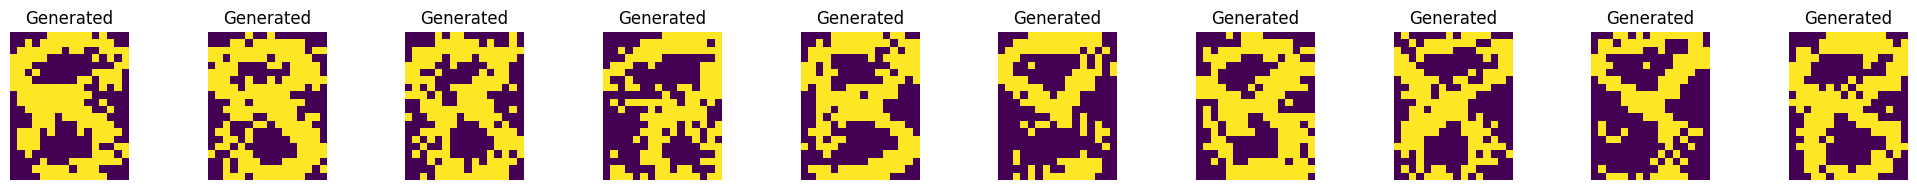

In [8]:
# # Generate images
generated_images = dbn.generate_image(n_samples=10, n_gibbs_steps=1)

# Display generated images
plot_generated_images(generated_images, **{"cmap":None})

### MNIST

In [9]:
import scipy.io

In [10]:
def load_mnist(mnist_path, mnist_dict=None, use_dict=False):
    if not use_dict:
        mnist_dict = scipy.io.loadmat(mnist_path)
    
    X_train = np.concatenate([mnist_dict[f"train{i}"] for i in range(10)], axis=0)
    X_test = np.concatenate([mnist_dict[f"test{i}"] for i in range(10)], axis=0)
    
    y_train = np.concatenate([np.eye(10)[[i]*mnist_dict[f"train{i}"].shape[0]] for i in range(10)], axis=0)
    y_test = np.concatenate([np.eye(10)[[i]*mnist_dict[f"test{i}"].shape[0]] for i in range(10)], axis=0)

    return X_train, y_train, X_test, y_test


def sample_indices(data_size: int, sample_size: int, random_state=None) -> np.ndarray:
    """
    Randomly sample indices from the range [0, data_size) without replacement.

    Parameters:
        data_size (int): Total number of indices available.
        sample_size (int): Number of indices to sample.
        random_state: Random seed for reproducibility.

    Returns:
        numpy.ndarray: Array of sampled indices.
    """
    rng = np.random.default_rng(random_state)
    if sample_size >= data_size:
        return np.arange(data_size)

    sampled_indices = rng.choice(data_size, size=sample_size, replace=False)
    return sampled_indices

def sample_mnist(X_train: np.ndarray, y_train: np.ndarray, sample_size: int, random_state=None) -> tuple:
    """
    Randomly sample a subset of samples from the MNIST dataset.

    Parameters:
        X_train (numpy.ndarray): Training data.
        y_train (numpy.ndarray): Training labels.
        sample_size (int): Number of samples to sample.
        random_state: Random seed for reproducibility.

    Returns:
        tuple: Sampled subset of training data and labels.
    """
    # Sample indices
    indices = sample_indices(len(X_train), sample_size, random_state=random_state)
    
    # Sample data and labels
    sampled_X_train = X_train[indices]
    sampled_y_train = y_train[indices]
    
    return sampled_X_train, sampled_y_train


def binarize_images(images):
    threshold = 127
    binary_images = np.where(images > threshold, 1, 0)
    return binary_images

mnist_train, mnist_train_labels, mnist_test, mnist_test_labels = (
    load_mnist(MNIST_PATH)
)


# Binarize the images
binary_mnist_train = binarize_images(mnist_train)
binary_mnist_test = binarize_images(mnist_test)


[mnist.shape for mnist in (mnist_train, mnist_train_labels, mnist_test, mnist_test_labels)]

[(60000, 784), (60000, 10), (10000, 784), (10000, 10)]

In [11]:
mnist_train_30000, mnist_train_labels_30000 = sample_mnist(mnist_train, mnist_train_labels, 30_000, 42)
mnist_train_30000.shape, mnist_train_labels_30000.shape

((30000, 784), (30000, 10))

In [12]:
print(mnist_train.max(), binary_mnist_train.max())

255 1


MNIST (60000, 28, 28)


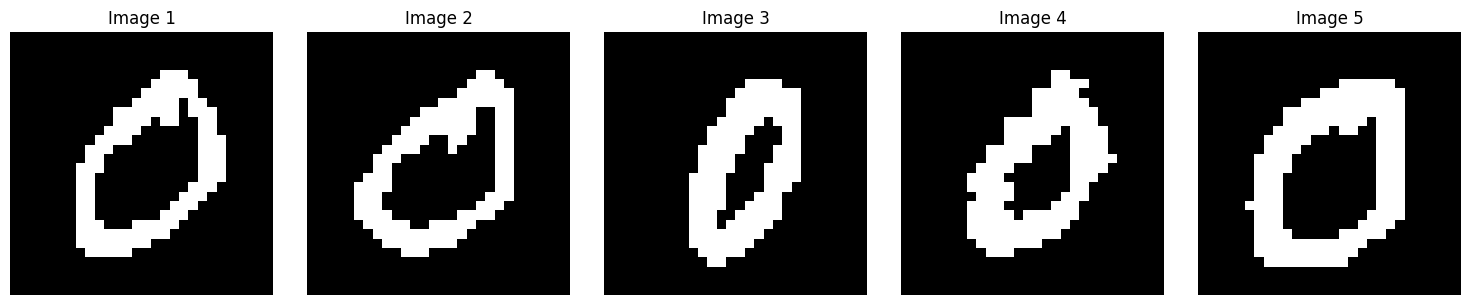

In [13]:
# Reshape mnist_train to its original shape
image_height = 28
image_width = 28
num_samples = binary_mnist_train.shape[0]
binary_mnist_train_images = binary_mnist_train.reshape(num_samples, image_height, image_width)
print("MNIST", binary_mnist_train_images.shape)

# Plot some images from mnist_train
num_images_to_plot = 5
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 3))
for i in range(num_images_to_plot):
    axes[i].imshow(binary_mnist_train_images[i], cmap='gray')
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [14]:
help(DNN)

Help on class DNN in module models.dnn:

class DNN(models.dbn.DBN)
 |  DNN(input_dim: int, output_dim: int, hidden_layer_sizes: List[int], random_state=None)
 |  
 |  Method resolution order:
 |      DNN
 |      models.dbn.DBN
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, key)
 |  
 |  __init__(self, input_dim: int, output_dim: int, hidden_layer_sizes: List[int], random_state=None)
 |      Initialize the Deep Neural Network (DNN).
 |      
 |      Parameters:
 |      - input_dim (int): Dimension of the input.
 |      - output_dim (int): Dimension of the output.
 |      - hidden_layer_sizes (List[int]): List of sizes for each hidden layer.
 |      - random_state: Random seed for reproducibility.
 |  
 |  __len__(self)
 |  
 |  __repr__(self)
 |      Return a string representation of the DBN object.
 |  
 |  backpropagation(self, input_data: numpy.ndarray, labels: numpy.ndarray, n_epochs: int = 100, learning_rate: float = 0.1, batch_size: int = 10, eps

# 0.Verify that DNN work well

Training:   5%|▌         | 1/20 [00:02<00:46,  2.43s/epoch]

Epoch 1/20, Cross Entropy: 2.133801568497678


Training:  10%|█         | 2/20 [00:04<00:43,  2.42s/epoch]

Epoch 2/20, Cross Entropy: 1.4636570400116549


Training:  15%|█▌        | 3/20 [00:06<00:39,  2.30s/epoch]

Epoch 3/20, Cross Entropy: 1.3469674018458633


Training:  20%|██        | 4/20 [00:09<00:36,  2.26s/epoch]

Epoch 4/20, Cross Entropy: 1.3393655904524406


Training:  25%|██▌       | 5/20 [00:11<00:33,  2.20s/epoch]

Epoch 5/20, Cross Entropy: 1.3306216373040813


Training:  30%|███       | 6/20 [00:13<00:31,  2.28s/epoch]

Epoch 6/20, Cross Entropy: 1.345462581499741


Training:  35%|███▌      | 7/20 [00:15<00:28,  2.22s/epoch]

Epoch 7/20, Cross Entropy: 1.3227643303246606


Training:  40%|████      | 8/20 [00:18<00:26,  2.24s/epoch]

Epoch 8/20, Cross Entropy: 1.3533744838822646


Training:  45%|████▌     | 9/20 [00:20<00:24,  2.26s/epoch]

Epoch 9/20, Cross Entropy: 1.3376150442680441


Training:  50%|█████     | 10/20 [00:22<00:22,  2.24s/epoch]

Epoch 10/20, Cross Entropy: 1.330680683711362


Training:  55%|█████▌    | 11/20 [00:24<00:20,  2.23s/epoch]

Epoch 11/20, Cross Entropy: 1.318538489745814


Training:  60%|██████    | 12/20 [00:26<00:17,  2.21s/epoch]

Epoch 12/20, Cross Entropy: 1.3409812035660578


Training:  65%|██████▌   | 13/20 [00:29<00:15,  2.22s/epoch]

Epoch 13/20, Cross Entropy: 1.327502992738857


Training:  70%|███████   | 14/20 [00:31<00:13,  2.18s/epoch]

Epoch 14/20, Cross Entropy: 1.3063754324129022


Training:  75%|███████▌  | 15/20 [00:33<00:10,  2.19s/epoch]

Epoch 15/20, Cross Entropy: 1.352079630079739


Training:  80%|████████  | 16/20 [00:35<00:08,  2.17s/epoch]

Epoch 16/20, Cross Entropy: 1.3429073294860094


Training:  85%|████████▌ | 17/20 [00:37<00:06,  2.18s/epoch]

Epoch 17/20, Cross Entropy: 1.2980126342137


Training:  90%|█████████ | 18/20 [00:39<00:04,  2.15s/epoch]

Epoch 18/20, Cross Entropy: 1.3421537922172777


Training:  95%|█████████▌| 19/20 [00:42<00:02,  2.15s/epoch]

Epoch 19/20, Cross Entropy: 1.336936430085128


Training: 100%|██████████| 20/20 [00:44<00:00,  2.22s/epoch]


Epoch 20/20, Cross Entropy: 1.3021843529619959
(0.38639999999999997, array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]))


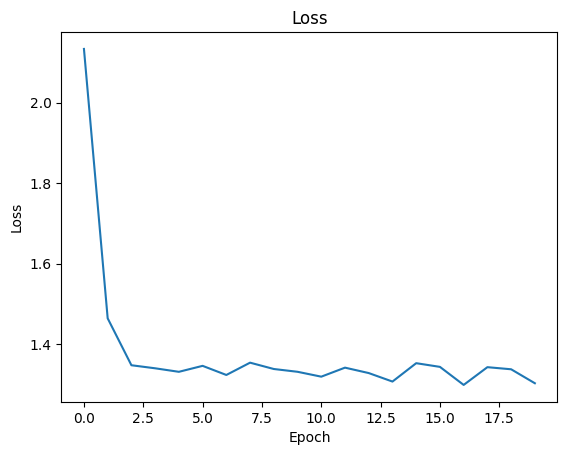

In [15]:
from copy import copy, deepcopy

data = mnist_train.copy()
n_samples, n_visible = data.shape # n_samples, n_features
n_visible = data.shape[1]
hidden_layer_sizes = [256]
n_classes = mnist_test_labels.shape[1]

dnn = DNN(input_dim=n_visible, output_dim=n_classes, hidden_layer_sizes=hidden_layer_sizes, random_state=42)

losses_100 = dnn.backpropagation(binary_mnist_train, labels=mnist_train_labels, n_epochs=20, learning_rate=1e-3, batch_size=512)


print(dnn.test(binary_mnist_test, mnist_test_labels))

#plotter la loss à partir d'une liste de loss
plt.plot(losses_100)
plt.title("Loss")   
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [16]:
print(dnn.test(binary_mnist_test, mnist_test_labels))


(0.3931, array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]))


# 1. Error rate according to varying layers numbers

In [17]:
import matplotlib.pyplot as plt
import pickle
import numpy as np


def save_object(obj, filename, output_dir):
    """
    Save a Python object to a file using pickle.

    Parameters:
    - obj: The Python object to save.
    - filename (str): The name of the file to save the object to.
    - output_dir (str): The directory where to save the file.
    """
    os.makedirs(output_dir, exist_ok=True)
    filepath = os.path.join(output_dir, filename)
    with open(filepath, 'wb') as f:
        pickle.dump(obj, f)

def load_object(filename, output_dir):
    """
    Load a Python object from a file using pickle.

    Parameters:
    - filename (str): The name of the file to load the object from.
    - output_dir (str): The directory where the file is located.

    Returns:
    - The Python object loaded from the file.
    """
    filepath = os.path.join(output_dir, filename)
    with open(filepath, 'rb') as f:
        return pickle.load(f)

## 1.1. Without pretraining

In [ ]:
n_samples, n_visible = mnist_train.shape # n_samples, n_features
n_classes = mnist_test_labels.shape[1]

layer_loss = []
layer_error_rate_train = []
layer_error_rate_test = []
for n_layers in [1, 2, 3, 4, 5]:
    hidden_layer_sizes = [256] * n_layers
    dnn = DNN(input_dim=n_visible, output_dim=n_classes, hidden_layer_sizes=hidden_layer_sizes, random_state=42)
    loss = dnn.backpropagation(binary_mnist_train, labels=mnist_train_labels, n_epochs=100, learning_rate=3e-4, batch_size=512)
    layer_loss.append(loss)
    
    error_rate_train, _ = dnn.test(test_data=binary_mnist_train, true_labels=mnist_train_labels)
    layer_error_rate_train.append(error_rate_train)  # Assurez-vous que error_rate_train est un scalaire

    error_rate_test, _ = dnn.test(test_data=binary_mnist_test, true_labels=mnist_test_labels)
    layer_error_rate_test.append(error_rate_test)  # Assurez-vous que error_rate_test est un scalaire

    # Save the lists with losses and error rates
    save_object(layer_loss, "layer_loss_" + str(n_layers) + ".pkl", output_dir="../results/experiments_mnist")
    save_object(layer_error_rate_train, "layer_error_rate_train_" + str(n_layers) + ".pkl",output_dir="../results/experiments_mnist")
    save_object(layer_error_rate_test, "layer_error_rate_test_" + str(n_layers) + ".pkl",output_dir="../results/experiments_mnist")


In [ ]:
a,b = dnn.test(mnist_test,mnist_test_labels)

In [ ]:
a

In [ ]:
import matplotlib.pyplot as plt

# Load the error rates for each number of layers
num_layers = [1, 2, 3, 4, 5]
train_error_rates = []
test_error_rates = []

for n_layers in num_layers:
    train_error_rate_layer = load_object("layer_error_rate_train_" + str(n_layers) + ".pkl","../results/experiments_mnist")
    test_error_rate_layer = load_object("layer_error_rate_test_" + str(n_layers) + ".pkl","../results/experiments_mnist")
    
# Plotting the error rates
plt.figure(figsize=(10, 6))
plt.plot(num_layers, train_error_rate_layer, label='Training Error Rate', marker='o')
plt.plot(num_layers, test_error_rate_layer, label='Test Error Rate', marker='o')

plt.xlabel('Number of Layers')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Layers')
plt.legend()
plt.grid(True)
plt.show()


## 1.2. With pretraining

In [ ]:
n_samples, n_visible = mnist_train.shape # n_samples, n_features
n_classes = mnist_test_labels.shape[1]

layer_loss = []
layer_error_rate_train = []
layer_error_rate_test = []
for n_layers in [1, 2, 3, 4, 5]:
    hidden_layer_sizes = [200] * n_layers
    dnn = DNN(input_dim=n_visible, output_dim=n_classes, hidden_layer_sizes=hidden_layer_sizes, random_state=42)
    # pretrain
    dnn.train(binary_mnist_train, n_epochs=10, learning_rate=3e-4, batch_size=512)

    loss = dnn.backpropagation(binary_mnist_train, labels=mnist_train_labels, n_epochs=100, learning_rate=3e-4, batch_size=512)
    layer_loss.append(loss)
    
    error_rate_train, _ = dnn.test(test_data=binary_mnist_train, true_labels=mnist_train_labels)
    layer_error_rate_train.append(error_rate_train)  # Assurez-vous que error_rate_train est un scalaire

    error_rate_test, _ = dnn.test(test_data=binary_mnist_test, true_labels=mnist_test_labels)
    layer_error_rate_test.append(error_rate_test)  # Assurez-vous que error_rate_test est un scalaire

    # Save the lists with losses and error rates
    save_object(layer_loss, "pretrain_layer_loss_" + str(n_layers) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_train, "pretrain_layer_error_rate_train_" + str(n_layers) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_test, "pretrain_layer_error_rate_test_" + str(n_layers) + ".pkl","../results/experiments_mnist")


In [ ]:
import matplotlib.pyplot as plt

# Load the error rates for each number of layers
num_layers = [1, 2, 3, 4, 5]
train_error_rates = []
test_error_rates = []

for n_layers in num_layers:
    train_error_rate_layer = load_object("pretrain_layer_error_rate_train_" + str(n_layers) + ".pkl","../results/experiments_mnist")
    test_error_rate_layer = load_object("pretrain_layer_error_rate_test_" + str(n_layers) + ".pkl","../results/experiments_mnist")
    
# Plotting the error rates
plt.figure(figsize=(10, 6))
plt.plot(num_layers, train_error_rate_layer, label='Training Error Rate', marker='o')
plt.plot(num_layers, test_error_rate_layer, label='Test Error Rate', marker='o')

plt.xlabel('Number of Layers')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Layers')
plt.legend()
plt.grid(True)
plt.show()


# 2.  number of neurons per layers

## 2.1. Without pretraining

In [ ]:
n_samples, n_visible = mnist_train.shape # n_samples, n_features
n_classes = mnist_test_labels.shape[1]

neurons_per_layer = [100, 300, 500, 700]
layer_loss_neurons = []
layer_error_rate_train_neurons = []
layer_error_rate_test_neurons = []

for n_neurons in neurons_per_layer:
    hidden_layer_sizes = [n_neurons] * 1  # Fixer le nombre de couches à 2
    dnn = DNN(input_dim=n_visible, output_dim=n_classes, hidden_layer_sizes=hidden_layer_sizes, random_state=42)
    loss = dnn.backpropagation(binary_mnist_train, labels=mnist_train_labels, n_epochs=10, learning_rate=3e-4, batch_size=512)
    layer_loss_neurons.append(loss)
    
    error_rate_train, _ = dnn.test(test_data=binary_mnist_train, true_labels=mnist_train_labels)
    layer_error_rate_train_neurons.append(error_rate_train)  # Assurez-vous que error_rate_train est un scalaire

    error_rate_test, _ = dnn.test(test_data=binary_mnist_test, true_labels=mnist_test_labels)
    layer_error_rate_test_neurons.append(error_rate_test)  # Assurez-vous que error_rate_test est un scalaire

    # Save the lists with losses and error rates
    save_object(layer_loss_neurons, "layer_loss_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_train_neurons, "layer_error_rate_train_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_test_neurons, "layer_error_rate_test_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")


In [ ]:
import matplotlib.pyplot as plt

# Load the error rates for each number of neurons per layer
neurons_per_layer = [100, 300, 500, 700]
train_error_rates_neurons = []
test_error_rates_neurons = []

for n_neurons in neurons_per_layer:
    train_error_rates_neurons = load_object("layer_error_rate_train_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")
    test_error_rates_neurons = load_object("layer_error_rate_test_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")
    

# Plotting the error rates for different numbers of neurons per layer
plt.figure(figsize=(10, 6))
plt.plot(neurons_per_layer, train_error_rates_neurons, label='Training Error Rate', marker='o')
plt.plot(neurons_per_layer, test_error_rates_neurons, label='Test Error Rate', marker='o')

plt.xlabel('Number of Neurons per Layer')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Neurons per Layer')
plt.legend()
plt.grid(True)
plt.show()


## 2.2. With pretraining

In [ ]:
n_samples, n_visible = mnist_train.shape # n_samples, n_features
n_classes = mnist_test_labels.shape[1]

neurons_per_layer = [100, 300, 500, 700]
layer_loss_neurons = []
layer_error_rate_train_neurons = []
layer_error_rate_test_neurons = []

for n_neurons in neurons_per_layer:
    hidden_layer_sizes = [n_neurons] * 2  # Fixer le nombre de couches à 2
    dnn = DNN(input_dim=n_visible, output_dim=n_classes, hidden_layer_sizes=hidden_layer_sizes, random_state=42)
    
    # pretrain
    dnn.train(mnist_train, n_epochs=10, learning_rate=3e-4, batch_size=512)
    
    loss = dnn.backpropagation(binary_mnist_train, labels=mnist_train_labels, n_epochs=10, learning_rate=3e-4, batch_size=512)
    layer_loss_neurons.append(loss)
    
    error_rate_train, _ = dnn.test(test_data=binary_mnist_train, true_labels=mnist_train_labels)
    layer_error_rate_train_neurons.append(error_rate_train)  # Assurez-vous que error_rate_train est un scalaire

    error_rate_test, _ = dnn.test(test_data=binary_mnist_test, true_labels=mnist_test_labels)
    layer_error_rate_test_neurons.append(error_rate_test)  # Assurez-vous que error_rate_test est un scalaire

    # Save the lists with losses and error rates
    save_object(layer_loss_neurons, "pretrain_layer_loss_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_train_neurons, "pretrain_layer_error_rate_train_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_test_neurons, "pretrain_layer_error_rate_test_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")


In [ ]:
import matplotlib.pyplot as plt

# Load the error rates for each number of neurons per layer
neurons_per_layer = [100, 300, 500, 700]
train_error_rates_neurons = []
test_error_rates_neurons = []

for n_neurons in neurons_per_layer:
    train_error_rates_neurons = load_object("pretrain_layer_error_rate_train_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")
    test_error_rates_neurons = load_object("pretrain_layer_error_rate_test_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")
    

# Plotting the error rates for different numbers of neurons per layer
plt.figure(figsize=(10, 6))
plt.plot(neurons_per_layer, train_error_rates_neurons, label='Training Error Rate', marker='o')
plt.plot(neurons_per_layer, test_error_rates_neurons, label='Test Error Rate', marker='o')

plt.xlabel('Number of Neurons per Layer')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Neurons per Layer')
plt.legend()
plt.grid(True)
plt.show()


# 3.  As a function of the number of data trains 

## 3.1. Without pretraining

In [22]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm



def create_stratified_subset(data, labels, num_samples_per_class):
    """
    Create a stratified subset of the dataset ensuring each class is represented equally.
    """
    unique_classes = np.arange(labels.shape[1])
    subset_data = []
    subset_labels = []

    for cls in unique_classes:
        class_indices = np.where(labels[:, cls] == 1)[0]
        selected_indices = class_indices[:num_samples_per_class]
        subset_data.append(data[selected_indices])
        subset_labels.append(labels[selected_indices])

    subset_data = np.concatenate(subset_data, axis=0)
    subset_labels = np.concatenate(subset_labels, axis=0)

    return subset_data, subset_labels

def check_label_distribution(labels):
    """
    Print the percentage of each class in the labels.
    """
    label_sums = np.sum(labels, axis=0)
    total = np.sum(label_sums)
    for idx, label_sum in enumerate(label_sums):
        print(f"Class {idx}: {label_sum / total * 100:.2f}%")

In [23]:
n_samples, n_visible = mnist_train.shape  # n_samples, n_features
n_classes = mnist_test_labels.shape[1]

# Defining different sizes for the subsets ensuring equal representation for each class
data_sizes = [1000, 3000, 7000, 10000, 30000, 60000]
num_classes = len(np.unique(mnist_train_labels))
layer_loss_data = []
layer_error_rate_train_data = []
layer_error_rate_test_data = []

for data_size in data_sizes:
    num_samples_per_class = data_size // num_classes
    subset_train_data, subset_train_labels = create_stratified_subset(binary_mnist_train, mnist_train_labels, num_samples_per_class)

    # Vérifier la distribution des labels
    print(f"Label distribution for {data_size} samples:")
    check_label_distribution(subset_train_labels)
    
    hidden_layer_sizes = [700] * 1  # Fixer le nombre de couches à 2 avec 200 neurones chacune
    dnn = DNN(input_dim=n_visible, output_dim=n_classes, hidden_layer_sizes=hidden_layer_sizes, random_state=42)
    loss = dnn.backpropagation(subset_train_data, labels=subset_train_labels, n_epochs=200, learning_rate=3e-4, batch_size=512)
    layer_loss_data.append(loss)
    
    error_rate_train, _ = dnn.test(test_data=subset_train_data, true_labels=subset_train_labels)
    layer_error_rate_train_data.append(error_rate_train)  # Assurez-vous que error_rate_train est un scalaire

    error_rate_test, _ = dnn.test(test_data=binary_mnist_test, true_labels=mnist_test_labels)
    layer_error_rate_test_data.append(error_rate_test)  # Assurez-vous que error_rate_test est un scalaire

    # Save the lists with losses and error rates
    save_object(layer_loss_data, "number_loss_data_" + str(data_size) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_train_data, "number_error_rate_train_data_" + str(data_size) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_test_data, "number_error_rate_test_data_" + str(data_size) + ".pkl","../results/experiments_mnist")


Label distribution for 1000 samples:
Class 0: 10.00%
Class 1: 10.00%
Class 2: 10.00%
Class 3: 10.00%
Class 4: 10.00%
Class 5: 10.00%
Class 6: 10.00%
Class 7: 10.00%
Class 8: 10.00%
Class 9: 10.00%


Training:   0%|          | 1/200 [00:00<01:00,  3.32epoch/s]

Epoch 1/200, Cross Entropy: 3.199734582820813


Training:   1%|          | 2/200 [00:00<00:59,  3.31epoch/s]

Epoch 2/200, Cross Entropy: 2.6083392937878793


Training:   2%|▏         | 3/200 [00:00<01:01,  3.21epoch/s]

Epoch 3/200, Cross Entropy: 2.2668277793975413


Training:   2%|▏         | 4/200 [00:01<00:58,  3.37epoch/s]

Epoch 4/200, Cross Entropy: 1.9572303562284865


Training:   2%|▎         | 5/200 [00:01<01:03,  3.08epoch/s]

Epoch 5/200, Cross Entropy: 1.8262705710719602


Training:   3%|▎         | 6/200 [00:01<01:05,  2.97epoch/s]

Epoch 6/200, Cross Entropy: 1.5957714416959219


Training:   4%|▎         | 7/200 [00:02<01:03,  3.04epoch/s]

Epoch 7/200, Cross Entropy: 1.5182644752078243


Training:   4%|▍         | 8/200 [00:02<00:58,  3.26epoch/s]

Epoch 8/200, Cross Entropy: 1.4534639952811332


Training:   4%|▍         | 9/200 [00:02<00:56,  3.37epoch/s]

Epoch 9/200, Cross Entropy: 1.3485487326853045


Training:   5%|▌         | 10/200 [00:03<00:55,  3.45epoch/s]

Epoch 10/200, Cross Entropy: 1.3830510681495576


Training:   6%|▌         | 11/200 [00:03<00:54,  3.44epoch/s]

Epoch 11/200, Cross Entropy: 1.2523305827864393


Training:   6%|▌         | 12/200 [00:03<00:53,  3.53epoch/s]

Epoch 12/200, Cross Entropy: 1.2306565411614572


Training:   6%|▋         | 13/200 [00:04<00:59,  3.17epoch/s]

Epoch 13/200, Cross Entropy: 1.1241434835103896


Training:   7%|▋         | 14/200 [00:04<00:56,  3.32epoch/s]

Epoch 14/200, Cross Entropy: 1.1710886100918294


Training:   8%|▊         | 15/200 [00:04<00:53,  3.44epoch/s]

Epoch 15/200, Cross Entropy: 1.0618976315250879


Training:   8%|▊         | 16/200 [00:04<00:52,  3.53epoch/s]

Epoch 16/200, Cross Entropy: 1.0410351079206637


Training:   8%|▊         | 17/200 [00:05<00:50,  3.60epoch/s]

Epoch 17/200, Cross Entropy: 1.0355985118229134


Training:   9%|▉         | 18/200 [00:05<00:50,  3.61epoch/s]

Epoch 18/200, Cross Entropy: 0.9996482191535874


Training:  10%|▉         | 19/200 [00:05<00:49,  3.66epoch/s]

Epoch 19/200, Cross Entropy: 0.9675238456400621


Training:  10%|█         | 20/200 [00:05<00:48,  3.71epoch/s]

Epoch 20/200, Cross Entropy: 0.9455958883662875


Training:  10%|█         | 21/200 [00:06<00:48,  3.69epoch/s]

Epoch 21/200, Cross Entropy: 0.9427397046146594


Training:  11%|█         | 22/200 [00:06<00:49,  3.62epoch/s]

Epoch 22/200, Cross Entropy: 0.943188369863804


Training:  12%|█▏        | 23/200 [00:06<00:48,  3.64epoch/s]

Epoch 23/200, Cross Entropy: 0.9144897874493783


Training:  12%|█▏        | 24/200 [00:06<00:49,  3.59epoch/s]

Epoch 24/200, Cross Entropy: 0.9132970413768177


Training:  12%|█▎        | 25/200 [00:07<00:48,  3.63epoch/s]

Epoch 25/200, Cross Entropy: 0.9309209813327006


Training:  13%|█▎        | 26/200 [00:07<00:47,  3.68epoch/s]

Epoch 26/200, Cross Entropy: 0.8592273763883317


Training:  14%|█▎        | 27/200 [00:07<00:46,  3.72epoch/s]

Epoch 27/200, Cross Entropy: 0.9005711449628534


Training:  14%|█▍        | 28/200 [00:08<00:47,  3.66epoch/s]

Epoch 28/200, Cross Entropy: 0.8635766202235671


Training:  14%|█▍        | 29/200 [00:08<00:47,  3.63epoch/s]

Epoch 29/200, Cross Entropy: 0.8637169005250195


Training:  15%|█▌        | 30/200 [00:08<00:47,  3.59epoch/s]

Epoch 30/200, Cross Entropy: 0.8805738128195606


Training:  16%|█▌        | 31/200 [00:08<00:46,  3.64epoch/s]

Epoch 31/200, Cross Entropy: 0.8324542999368294


Training:  16%|█▌        | 32/200 [00:09<00:46,  3.62epoch/s]

Epoch 32/200, Cross Entropy: 0.8483089959195318


Training:  16%|█▋        | 33/200 [00:09<00:47,  3.49epoch/s]

Epoch 33/200, Cross Entropy: 0.8171661503441685


Training:  17%|█▋        | 34/200 [00:09<00:46,  3.59epoch/s]

Epoch 34/200, Cross Entropy: 0.8116841655508921


Training:  18%|█▊        | 35/200 [00:10<00:45,  3.65epoch/s]

Epoch 35/200, Cross Entropy: 0.8125634247707977


Training:  18%|█▊        | 36/200 [00:10<00:44,  3.70epoch/s]

Epoch 36/200, Cross Entropy: 0.8113890358053742


Training:  18%|█▊        | 37/200 [00:10<00:43,  3.77epoch/s]

Epoch 37/200, Cross Entropy: 0.8119194110756686


Training:  19%|█▉        | 38/200 [00:10<00:44,  3.66epoch/s]

Epoch 38/200, Cross Entropy: 0.7968666583323607


Training:  20%|█▉        | 39/200 [00:11<00:43,  3.69epoch/s]

Epoch 39/200, Cross Entropy: 0.7917043878929558


Training:  20%|██        | 40/200 [00:11<00:42,  3.74epoch/s]

Epoch 40/200, Cross Entropy: 0.7902062312711259


Training:  20%|██        | 41/200 [00:11<00:42,  3.79epoch/s]

Epoch 41/200, Cross Entropy: 0.7964407197306745


Training:  21%|██        | 42/200 [00:11<00:43,  3.65epoch/s]

Epoch 42/200, Cross Entropy: 0.7855306407071971


Training:  22%|██▏       | 43/200 [00:12<00:42,  3.66epoch/s]

Epoch 43/200, Cross Entropy: 0.782190453619389


Training:  22%|██▏       | 44/200 [00:12<00:42,  3.66epoch/s]

Epoch 44/200, Cross Entropy: 0.7933693158165724


Training:  22%|██▎       | 45/200 [00:12<00:41,  3.71epoch/s]

Epoch 45/200, Cross Entropy: 0.7747795346456392


Training:  23%|██▎       | 46/200 [00:12<00:41,  3.68epoch/s]

Epoch 46/200, Cross Entropy: 0.7790408371718303


Training:  24%|██▎       | 47/200 [00:13<00:42,  3.58epoch/s]

Epoch 47/200, Cross Entropy: 0.7878042127482097


Training:  24%|██▍       | 48/200 [00:13<00:41,  3.64epoch/s]

Epoch 48/200, Cross Entropy: 0.7873444529456981


Training:  24%|██▍       | 49/200 [00:13<00:41,  3.68epoch/s]

Epoch 49/200, Cross Entropy: 0.7754096420687943


Training:  25%|██▌       | 50/200 [00:14<00:42,  3.52epoch/s]

Epoch 50/200, Cross Entropy: 0.7465508374455054


Training:  26%|██▌       | 51/200 [00:14<00:41,  3.60epoch/s]

Epoch 51/200, Cross Entropy: 0.7376787817391243


Training:  26%|██▌       | 52/200 [00:14<00:40,  3.66epoch/s]

Epoch 52/200, Cross Entropy: 0.7574096121288361


Training:  26%|██▋       | 53/200 [00:14<00:39,  3.70epoch/s]

Epoch 53/200, Cross Entropy: 0.7430614438297761


Training:  27%|██▋       | 54/200 [00:15<00:39,  3.68epoch/s]

Epoch 54/200, Cross Entropy: 0.7662799082596393


Training:  28%|██▊       | 55/200 [00:15<00:39,  3.70epoch/s]

Epoch 55/200, Cross Entropy: 0.7826023899233374


Training:  28%|██▊       | 56/200 [00:15<00:38,  3.75epoch/s]

Epoch 56/200, Cross Entropy: 0.7512874051015559


Training:  28%|██▊       | 57/200 [00:15<00:38,  3.73epoch/s]

Epoch 57/200, Cross Entropy: 0.7610828090153589


Training:  29%|██▉       | 58/200 [00:16<00:37,  3.76epoch/s]

Epoch 58/200, Cross Entropy: 0.7601226021918186


Training:  30%|██▉       | 59/200 [00:16<00:37,  3.79epoch/s]

Epoch 59/200, Cross Entropy: 0.7379187688111961


Training:  30%|███       | 60/200 [00:16<00:37,  3.69epoch/s]

Epoch 60/200, Cross Entropy: 0.7559754732825547


Training:  30%|███       | 61/200 [00:17<00:38,  3.60epoch/s]

Epoch 61/200, Cross Entropy: 0.7553686184346876


Training:  31%|███       | 62/200 [00:17<00:37,  3.66epoch/s]

Epoch 62/200, Cross Entropy: 0.742137401786673


Training:  32%|███▏      | 63/200 [00:17<00:37,  3.64epoch/s]

Epoch 63/200, Cross Entropy: 0.7292905329677631


Training:  32%|███▏      | 64/200 [00:17<00:37,  3.67epoch/s]

Epoch 64/200, Cross Entropy: 0.7384395396527997


Training:  32%|███▎      | 65/200 [00:18<00:37,  3.61epoch/s]

Epoch 65/200, Cross Entropy: 0.7276652837053549


Training:  33%|███▎      | 66/200 [00:18<00:36,  3.67epoch/s]

Epoch 66/200, Cross Entropy: 0.7319423738696501


Training:  34%|███▎      | 67/200 [00:18<00:35,  3.73epoch/s]

Epoch 67/200, Cross Entropy: 0.7236962605574008


Training:  34%|███▍      | 68/200 [00:19<00:37,  3.55epoch/s]

Epoch 68/200, Cross Entropy: 0.7393602471021582


Training:  34%|███▍      | 69/200 [00:19<00:36,  3.61epoch/s]

Epoch 69/200, Cross Entropy: 0.7384092152171274


Training:  35%|███▌      | 70/200 [00:19<00:35,  3.66epoch/s]

Epoch 70/200, Cross Entropy: 0.7269274735900956


Training:  36%|███▌      | 71/200 [00:19<00:35,  3.67epoch/s]

Epoch 71/200, Cross Entropy: 0.7463013058812124


Training:  36%|███▌      | 72/200 [00:20<00:34,  3.67epoch/s]

Epoch 72/200, Cross Entropy: 0.7417630160671691


Training:  36%|███▋      | 73/200 [00:20<00:34,  3.69epoch/s]

Epoch 73/200, Cross Entropy: 0.7380514141020977


Training:  37%|███▋      | 74/200 [00:20<00:33,  3.73epoch/s]

Epoch 74/200, Cross Entropy: 0.7175259365447754


Training:  38%|███▊      | 75/200 [00:20<00:32,  3.79epoch/s]

Epoch 75/200, Cross Entropy: 0.7243761754552541


Training:  38%|███▊      | 76/200 [00:21<00:32,  3.81epoch/s]

Epoch 76/200, Cross Entropy: 0.7246741179345064


Training:  38%|███▊      | 77/200 [00:21<00:32,  3.81epoch/s]

Epoch 77/200, Cross Entropy: 0.7025704288644083


Training:  39%|███▉      | 78/200 [00:21<00:32,  3.81epoch/s]

Epoch 78/200, Cross Entropy: 0.7152919559388397


Training:  40%|███▉      | 79/200 [00:21<00:32,  3.68epoch/s]

Epoch 79/200, Cross Entropy: 0.6921632362256896


Training:  40%|████      | 80/200 [00:22<00:33,  3.58epoch/s]

Epoch 80/200, Cross Entropy: 0.7008474045809595


Training:  40%|████      | 81/200 [00:22<00:32,  3.67epoch/s]

Epoch 81/200, Cross Entropy: 0.7279225943262286


Training:  41%|████      | 82/200 [00:22<00:31,  3.69epoch/s]

Epoch 82/200, Cross Entropy: 0.7328552678526331


Training:  42%|████▏     | 83/200 [00:23<00:31,  3.69epoch/s]

Epoch 83/200, Cross Entropy: 0.7227196176885584


Training:  42%|████▏     | 84/200 [00:23<00:33,  3.42epoch/s]

Epoch 84/200, Cross Entropy: 0.7132272900901007


Training:  42%|████▎     | 85/200 [00:23<00:32,  3.54epoch/s]

Epoch 85/200, Cross Entropy: 0.7133751185396057


Training:  43%|████▎     | 86/200 [00:23<00:31,  3.63epoch/s]

Epoch 86/200, Cross Entropy: 0.706752661934608


Training:  44%|████▎     | 87/200 [00:24<00:31,  3.62epoch/s]

Epoch 87/200, Cross Entropy: 0.7037013093307825


Training:  44%|████▍     | 88/200 [00:24<00:31,  3.60epoch/s]

Epoch 88/200, Cross Entropy: 0.714743708415979


Training:  44%|████▍     | 89/200 [00:24<00:30,  3.65epoch/s]

Epoch 89/200, Cross Entropy: 0.729482968023954


Training:  45%|████▌     | 90/200 [00:24<00:29,  3.69epoch/s]

Epoch 90/200, Cross Entropy: 0.6869542050915135


Training:  46%|████▌     | 91/200 [00:25<00:29,  3.69epoch/s]

Epoch 91/200, Cross Entropy: 0.6884441604965726


Training:  46%|████▌     | 92/200 [00:25<00:29,  3.72epoch/s]

Epoch 92/200, Cross Entropy: 0.6944158577505581


Training:  46%|████▋     | 93/200 [00:25<00:28,  3.73epoch/s]

Epoch 93/200, Cross Entropy: 0.7080757426523246


Training:  47%|████▋     | 94/200 [00:26<00:28,  3.77epoch/s]

Epoch 94/200, Cross Entropy: 0.6988501003070396


Training:  48%|████▊     | 95/200 [00:26<00:27,  3.80epoch/s]

Epoch 95/200, Cross Entropy: 0.7175577514994798


Training:  48%|████▊     | 96/200 [00:26<00:27,  3.74epoch/s]

Epoch 96/200, Cross Entropy: 0.7301881359549729


Training:  48%|████▊     | 97/200 [00:26<00:29,  3.48epoch/s]

Epoch 97/200, Cross Entropy: 0.6999971383713319


Training:  49%|████▉     | 98/200 [00:27<00:32,  3.12epoch/s]

Epoch 98/200, Cross Entropy: 0.7129850804066687


Training:  50%|████▉     | 99/200 [00:27<00:32,  3.09epoch/s]

Epoch 99/200, Cross Entropy: 0.7200912876624936


Training:  50%|█████     | 100/200 [00:27<00:31,  3.19epoch/s]

Epoch 100/200, Cross Entropy: 0.6972734940272413


Training:  50%|█████     | 101/200 [00:28<00:33,  2.97epoch/s]

Epoch 101/200, Cross Entropy: 0.7184017816232837


Training:  51%|█████     | 102/200 [00:28<00:31,  3.15epoch/s]

Epoch 102/200, Cross Entropy: 0.6778253827850763


Training:  52%|█████▏    | 103/200 [00:28<00:30,  3.21epoch/s]

Epoch 103/200, Cross Entropy: 0.7005355118948224


Training:  52%|█████▏    | 104/200 [00:29<00:29,  3.30epoch/s]

Epoch 104/200, Cross Entropy: 0.6868280188118397


Training:  52%|█████▎    | 105/200 [00:29<00:28,  3.37epoch/s]

Epoch 105/200, Cross Entropy: 0.7033619504354672


Training:  53%|█████▎    | 106/200 [00:29<00:27,  3.47epoch/s]

Epoch 106/200, Cross Entropy: 0.6841783911704555


Training:  54%|█████▎    | 107/200 [00:30<00:26,  3.49epoch/s]

Epoch 107/200, Cross Entropy: 0.7241071475848366


Training:  54%|█████▍    | 108/200 [00:30<00:26,  3.45epoch/s]

Epoch 108/200, Cross Entropy: 0.7174556021095112


Training:  55%|█████▍    | 109/200 [00:30<00:26,  3.50epoch/s]

Epoch 109/200, Cross Entropy: 0.7148320553236536


Training:  55%|█████▌    | 110/200 [00:30<00:25,  3.55epoch/s]

Epoch 110/200, Cross Entropy: 0.6683248473750418


Training:  56%|█████▌    | 111/200 [00:31<00:25,  3.46epoch/s]

Epoch 111/200, Cross Entropy: 0.6941414659025001


Training:  56%|█████▌    | 112/200 [00:31<00:25,  3.46epoch/s]

Epoch 112/200, Cross Entropy: 0.6928913707555601


Training:  56%|█████▋    | 113/200 [00:31<00:25,  3.44epoch/s]

Epoch 113/200, Cross Entropy: 0.6947008015918402


Training:  57%|█████▋    | 114/200 [00:32<00:25,  3.42epoch/s]

Epoch 114/200, Cross Entropy: 0.6807100163588587


Training:  57%|█████▊    | 115/200 [00:32<00:24,  3.54epoch/s]

Epoch 115/200, Cross Entropy: 0.700942972573071


Training:  58%|█████▊    | 116/200 [00:32<00:23,  3.59epoch/s]

Epoch 116/200, Cross Entropy: 0.6818798355016367


Training:  58%|█████▊    | 117/200 [00:32<00:22,  3.65epoch/s]

Epoch 117/200, Cross Entropy: 0.6900132281851163


Training:  59%|█████▉    | 118/200 [00:33<00:25,  3.27epoch/s]

Epoch 118/200, Cross Entropy: 0.6899584511177074


Training:  60%|█████▉    | 119/200 [00:33<00:24,  3.34epoch/s]

Epoch 119/200, Cross Entropy: 0.7019717050701683


Training:  60%|██████    | 120/200 [00:33<00:23,  3.47epoch/s]

Epoch 120/200, Cross Entropy: 0.6894063622171388


Training:  60%|██████    | 121/200 [00:34<00:22,  3.54epoch/s]

Epoch 121/200, Cross Entropy: 0.701666440422264


Training:  61%|██████    | 122/200 [00:34<00:21,  3.59epoch/s]

Epoch 122/200, Cross Entropy: 0.6942074519725545


Training:  62%|██████▏   | 123/200 [00:34<00:21,  3.64epoch/s]

Epoch 123/200, Cross Entropy: 0.7009025201634405


Training:  62%|██████▏   | 124/200 [00:34<00:20,  3.69epoch/s]

Epoch 124/200, Cross Entropy: 0.6854158224255437


Training:  62%|██████▎   | 125/200 [00:35<00:20,  3.71epoch/s]

Epoch 125/200, Cross Entropy: 0.6748279212649338


Training:  63%|██████▎   | 126/200 [00:35<00:19,  3.73epoch/s]

Epoch 126/200, Cross Entropy: 0.6918174653212092


Training:  64%|██████▎   | 127/200 [00:35<00:19,  3.74epoch/s]

Epoch 127/200, Cross Entropy: 0.6979784090424357


Training:  64%|██████▍   | 128/200 [00:35<00:19,  3.72epoch/s]

Epoch 128/200, Cross Entropy: 0.6772591189474219


Training:  64%|██████▍   | 129/200 [00:36<00:19,  3.68epoch/s]

Epoch 129/200, Cross Entropy: 0.6888530347184771


Training:  65%|██████▌   | 130/200 [00:36<00:18,  3.75epoch/s]

Epoch 130/200, Cross Entropy: 0.6780210328902073


Training:  66%|██████▌   | 131/200 [00:36<00:18,  3.73epoch/s]

Epoch 131/200, Cross Entropy: 0.7017029173688689


Training:  66%|██████▌   | 132/200 [00:36<00:18,  3.64epoch/s]

Epoch 132/200, Cross Entropy: 0.6903354070588713


Training:  66%|██████▋   | 133/200 [00:37<00:18,  3.65epoch/s]

Epoch 133/200, Cross Entropy: 0.7015765957040959


Training:  67%|██████▋   | 134/200 [00:37<00:17,  3.67epoch/s]

Epoch 134/200, Cross Entropy: 0.7086295745949034


Training:  68%|██████▊   | 135/200 [00:37<00:18,  3.46epoch/s]

Epoch 135/200, Cross Entropy: 0.7070847670552315


Training:  68%|██████▊   | 136/200 [00:38<00:18,  3.40epoch/s]

Epoch 136/200, Cross Entropy: 0.6873609530079512


Training:  68%|██████▊   | 137/200 [00:38<00:18,  3.48epoch/s]

Epoch 137/200, Cross Entropy: 0.6900369164315447


Training:  69%|██████▉   | 138/200 [00:38<00:17,  3.56epoch/s]

Epoch 138/200, Cross Entropy: 0.6875417838186934


Training:  70%|██████▉   | 139/200 [00:38<00:16,  3.63epoch/s]

Epoch 139/200, Cross Entropy: 0.7073439090920459


Training:  70%|███████   | 140/200 [00:39<00:16,  3.67epoch/s]

Epoch 140/200, Cross Entropy: 0.6712575151137722


Training:  70%|███████   | 141/200 [00:39<00:15,  3.70epoch/s]

Epoch 141/200, Cross Entropy: 0.7005882554995323


Training:  71%|███████   | 142/200 [00:39<00:15,  3.75epoch/s]

Epoch 142/200, Cross Entropy: 0.6898297943985188


Training:  72%|███████▏  | 143/200 [00:40<00:15,  3.77epoch/s]

Epoch 143/200, Cross Entropy: 0.6897493748548711


Training:  72%|███████▏  | 144/200 [00:40<00:15,  3.72epoch/s]

Epoch 144/200, Cross Entropy: 0.6956978484312555


Training:  72%|███████▎  | 145/200 [00:40<00:14,  3.75epoch/s]

Epoch 145/200, Cross Entropy: 0.6767948773221228


Training:  73%|███████▎  | 146/200 [00:40<00:14,  3.77epoch/s]

Epoch 146/200, Cross Entropy: 0.6930394942560777


Training:  74%|███████▎  | 147/200 [00:41<00:13,  3.80epoch/s]

Epoch 147/200, Cross Entropy: 0.7023555735378619


Training:  74%|███████▍  | 148/200 [00:41<00:13,  3.77epoch/s]

Epoch 148/200, Cross Entropy: 0.6866670504805948


Training:  74%|███████▍  | 149/200 [00:41<00:13,  3.78epoch/s]

Epoch 149/200, Cross Entropy: 0.7041375281174495


Training:  75%|███████▌  | 150/200 [00:41<00:14,  3.45epoch/s]

Epoch 150/200, Cross Entropy: 0.6924932231711155


Training:  76%|███████▌  | 151/200 [00:42<00:14,  3.48epoch/s]

Epoch 151/200, Cross Entropy: 0.6870536119712989


Training:  76%|███████▌  | 152/200 [00:42<00:13,  3.52epoch/s]

Epoch 152/200, Cross Entropy: 0.7142704415652216


Training:  76%|███████▋  | 153/200 [00:42<00:13,  3.59epoch/s]

Epoch 153/200, Cross Entropy: 0.7191389505192839


Training:  77%|███████▋  | 154/200 [00:43<00:12,  3.59epoch/s]

Epoch 154/200, Cross Entropy: 0.7042953211890645


Training:  78%|███████▊  | 155/200 [00:43<00:12,  3.55epoch/s]

Epoch 155/200, Cross Entropy: 0.6941620179650465


Training:  78%|███████▊  | 156/200 [00:43<00:12,  3.61epoch/s]

Epoch 156/200, Cross Entropy: 0.6905555175035846


Training:  78%|███████▊  | 157/200 [00:43<00:11,  3.69epoch/s]

Epoch 157/200, Cross Entropy: 0.7124753105737703


Training:  79%|███████▉  | 158/200 [00:44<00:11,  3.67epoch/s]

Epoch 158/200, Cross Entropy: 0.6788806666781465


Training:  80%|███████▉  | 159/200 [00:44<00:11,  3.70epoch/s]

Epoch 159/200, Cross Entropy: 0.6831509619737591


Training:  80%|████████  | 160/200 [00:44<00:11,  3.63epoch/s]

Epoch 160/200, Cross Entropy: 0.6859905635677165


Training:  80%|████████  | 161/200 [00:44<00:10,  3.64epoch/s]

Epoch 161/200, Cross Entropy: 0.6955384042436239


Training:  81%|████████  | 162/200 [00:45<00:10,  3.66epoch/s]

Epoch 162/200, Cross Entropy: 0.6827537418553911


Training:  82%|████████▏ | 163/200 [00:45<00:10,  3.68epoch/s]

Epoch 163/200, Cross Entropy: 0.7071287286013678


Training:  82%|████████▏ | 164/200 [00:45<00:09,  3.73epoch/s]

Epoch 164/200, Cross Entropy: 0.6806182804692428


Training:  82%|████████▎ | 165/200 [00:46<00:09,  3.54epoch/s]

Epoch 165/200, Cross Entropy: 0.6702093573855951


Training:  83%|████████▎ | 166/200 [00:46<00:09,  3.64epoch/s]

Epoch 166/200, Cross Entropy: 0.6839638527570362


Training:  84%|████████▎ | 167/200 [00:46<00:08,  3.68epoch/s]

Epoch 167/200, Cross Entropy: 0.6909457879615414


Training:  84%|████████▍ | 168/200 [00:46<00:08,  3.59epoch/s]

Epoch 168/200, Cross Entropy: 0.7093279487990569


Training:  84%|████████▍ | 169/200 [00:47<00:08,  3.56epoch/s]

Epoch 169/200, Cross Entropy: 0.6862780979488063


Training:  85%|████████▌ | 170/200 [00:47<00:08,  3.64epoch/s]

Epoch 170/200, Cross Entropy: 0.6891984080830998


Training:  86%|████████▌ | 171/200 [00:47<00:07,  3.69epoch/s]

Epoch 171/200, Cross Entropy: 0.705554505455145


Training:  86%|████████▌ | 172/200 [00:47<00:07,  3.72epoch/s]

Epoch 172/200, Cross Entropy: 0.6914944326535903


Training:  86%|████████▋ | 173/200 [00:48<00:07,  3.62epoch/s]

Epoch 173/200, Cross Entropy: 0.6786911679244287


Training:  87%|████████▋ | 174/200 [00:48<00:07,  3.66epoch/s]

Epoch 174/200, Cross Entropy: 0.6759010723071094


Training:  88%|████████▊ | 175/200 [00:48<00:06,  3.68epoch/s]

Epoch 175/200, Cross Entropy: 0.6851440094233643


Training:  88%|████████▊ | 176/200 [00:49<00:06,  3.70epoch/s]

Epoch 176/200, Cross Entropy: 0.6895748099096893


Training:  88%|████████▊ | 177/200 [00:49<00:06,  3.57epoch/s]

Epoch 177/200, Cross Entropy: 0.6760467398876115


Training:  89%|████████▉ | 178/200 [00:49<00:06,  3.63epoch/s]

Epoch 178/200, Cross Entropy: 0.693563142730582


Training:  90%|████████▉ | 179/200 [00:49<00:06,  3.48epoch/s]

Epoch 179/200, Cross Entropy: 0.6983931867794554


Training:  90%|█████████ | 180/200 [00:50<00:05,  3.56epoch/s]

Epoch 180/200, Cross Entropy: 0.7027029760080773


Training:  90%|█████████ | 181/200 [00:50<00:05,  3.65epoch/s]

Epoch 181/200, Cross Entropy: 0.6839560767313468


Training:  91%|█████████ | 182/200 [00:50<00:04,  3.72epoch/s]

Epoch 182/200, Cross Entropy: 0.6856582683617494


Training:  92%|█████████▏| 183/200 [00:51<00:04,  3.76epoch/s]

Epoch 183/200, Cross Entropy: 0.6784686697039534


Training:  92%|█████████▏| 184/200 [00:51<00:04,  3.78epoch/s]

Epoch 184/200, Cross Entropy: 0.6806686195396224


Training:  92%|█████████▎| 185/200 [00:51<00:04,  3.73epoch/s]

Epoch 185/200, Cross Entropy: 0.6871704107652395


Training:  93%|█████████▎| 186/200 [00:51<00:03,  3.68epoch/s]

Epoch 186/200, Cross Entropy: 0.6854624313514889


Training:  94%|█████████▎| 187/200 [00:52<00:03,  3.66epoch/s]

Epoch 187/200, Cross Entropy: 0.6719506462623993


Training:  94%|█████████▍| 188/200 [00:52<00:03,  3.67epoch/s]

Epoch 188/200, Cross Entropy: 0.6863308131115423


Training:  94%|█████████▍| 189/200 [00:52<00:02,  3.70epoch/s]

Epoch 189/200, Cross Entropy: 0.7085804989902029


Training:  95%|█████████▌| 190/200 [00:52<00:02,  3.71epoch/s]

Epoch 190/200, Cross Entropy: 0.6796378524072142


Training:  96%|█████████▌| 191/200 [00:53<00:02,  3.60epoch/s]

Epoch 191/200, Cross Entropy: 0.697048029724637


Training:  96%|█████████▌| 192/200 [00:53<00:02,  3.37epoch/s]

Epoch 192/200, Cross Entropy: 0.7029126145802522


Training:  96%|█████████▋| 193/200 [00:53<00:02,  3.37epoch/s]

Epoch 193/200, Cross Entropy: 0.6704271875625556


Training:  97%|█████████▋| 194/200 [00:54<00:01,  3.50epoch/s]

Epoch 194/200, Cross Entropy: 0.6844258262189236


Training:  98%|█████████▊| 195/200 [00:54<00:01,  3.52epoch/s]

Epoch 195/200, Cross Entropy: 0.679363067371142


Training:  98%|█████████▊| 196/200 [00:54<00:01,  3.60epoch/s]

Epoch 196/200, Cross Entropy: 0.690664843045845


Training:  98%|█████████▊| 197/200 [00:54<00:00,  3.67epoch/s]

Epoch 197/200, Cross Entropy: 0.7029861725359123


Training:  99%|█████████▉| 198/200 [00:55<00:00,  3.68epoch/s]

Epoch 198/200, Cross Entropy: 0.6547175371104065


Training: 100%|█████████▉| 199/200 [00:55<00:00,  3.70epoch/s]

Epoch 199/200, Cross Entropy: 0.6770048435151715


Training: 100%|██████████| 200/200 [00:55<00:00,  3.59epoch/s]


Epoch 200/200, Cross Entropy: 0.6851247359901256
Label distribution for 3000 samples:
Class 0: 10.00%
Class 1: 10.00%
Class 2: 10.00%
Class 3: 10.00%
Class 4: 10.00%
Class 5: 10.00%
Class 6: 10.00%
Class 7: 10.00%
Class 8: 10.00%
Class 9: 10.00%


Training:   0%|          | 1/200 [00:00<02:43,  1.22epoch/s]

Epoch 1/200, Cross Entropy: 2.818566904489535


Training:   1%|          | 2/200 [00:01<02:40,  1.23epoch/s]

Epoch 2/200, Cross Entropy: 1.9429137276051625


Training:   2%|▏         | 3/200 [00:02<02:41,  1.22epoch/s]

Epoch 3/200, Cross Entropy: 1.4822637676475612


Training:   2%|▏         | 4/200 [00:03<02:36,  1.25epoch/s]

Epoch 4/200, Cross Entropy: 1.286746812473376


Training:   2%|▎         | 5/200 [00:04<02:35,  1.26epoch/s]

Epoch 5/200, Cross Entropy: 1.137528033799825


Training:   3%|▎         | 6/200 [00:04<02:32,  1.27epoch/s]

Epoch 6/200, Cross Entropy: 1.0740147136600908


Training:   4%|▎         | 7/200 [00:05<02:32,  1.26epoch/s]

Epoch 7/200, Cross Entropy: 1.0163868995954441


Training:   4%|▍         | 8/200 [00:06<02:33,  1.25epoch/s]

Epoch 8/200, Cross Entropy: 0.9594371483793449


Training:   4%|▍         | 9/200 [00:07<02:31,  1.26epoch/s]

Epoch 9/200, Cross Entropy: 0.921178287245325


Training:   5%|▌         | 10/200 [00:07<02:29,  1.27epoch/s]

Epoch 10/200, Cross Entropy: 0.893025377076484


Training:   6%|▌         | 11/200 [00:08<02:28,  1.27epoch/s]

Epoch 11/200, Cross Entropy: 0.8666739575713757


Training:   6%|▌         | 12/200 [00:09<02:26,  1.28epoch/s]

Epoch 12/200, Cross Entropy: 0.8476967148515667


Training:   6%|▋         | 13/200 [00:10<02:26,  1.27epoch/s]

Epoch 13/200, Cross Entropy: 0.8500330928857714


Training:   7%|▋         | 14/200 [00:11<02:25,  1.27epoch/s]

Epoch 14/200, Cross Entropy: 0.8478961502386024


Training:   8%|▊         | 15/200 [00:11<02:25,  1.27epoch/s]

Epoch 15/200, Cross Entropy: 0.8459339476781843


Training:   8%|▊         | 16/200 [00:12<02:25,  1.27epoch/s]

Epoch 16/200, Cross Entropy: 0.8237273132262951


Training:   8%|▊         | 17/200 [00:13<02:27,  1.24epoch/s]

Epoch 17/200, Cross Entropy: 0.8114584551949021


Training:   9%|▉         | 18/200 [00:14<02:24,  1.26epoch/s]

Epoch 18/200, Cross Entropy: 0.7986477148861189


Training:  10%|▉         | 19/200 [00:15<02:23,  1.26epoch/s]

Epoch 19/200, Cross Entropy: 0.7874003790535332


Training:  10%|█         | 20/200 [00:15<02:22,  1.26epoch/s]

Epoch 20/200, Cross Entropy: 0.7855039888041888


Training:  10%|█         | 21/200 [00:16<02:21,  1.26epoch/s]

Epoch 21/200, Cross Entropy: 0.7755681770217453


Training:  11%|█         | 22/200 [00:17<02:21,  1.26epoch/s]

Epoch 22/200, Cross Entropy: 0.7792442727550167


Training:  12%|█▏        | 23/200 [00:18<02:19,  1.27epoch/s]

Epoch 23/200, Cross Entropy: 0.7565273910339518


Training:  12%|█▏        | 24/200 [00:18<02:17,  1.28epoch/s]

Epoch 24/200, Cross Entropy: 0.7701370646450255


Training:  12%|█▎        | 25/200 [00:19<02:18,  1.27epoch/s]

Epoch 25/200, Cross Entropy: 0.7619809949029381


Training:  13%|█▎        | 26/200 [00:20<02:18,  1.26epoch/s]

Epoch 26/200, Cross Entropy: 0.7645030122315076


Training:  14%|█▎        | 27/200 [00:21<02:17,  1.25epoch/s]

Epoch 27/200, Cross Entropy: 0.7529776663090082


Training:  14%|█▍        | 28/200 [00:22<02:17,  1.25epoch/s]

Epoch 28/200, Cross Entropy: 0.7662520780589934


Training:  14%|█▍        | 29/200 [00:22<02:15,  1.27epoch/s]

Epoch 29/200, Cross Entropy: 0.7466782388465297


Training:  15%|█▌        | 30/200 [00:23<02:13,  1.28epoch/s]

Epoch 30/200, Cross Entropy: 0.7520844840046793


Training:  16%|█▌        | 31/200 [00:24<02:15,  1.25epoch/s]

Epoch 31/200, Cross Entropy: 0.7478374869692602


Training:  16%|█▌        | 32/200 [00:25<02:15,  1.24epoch/s]

Epoch 32/200, Cross Entropy: 0.7589036306120567


Training:  16%|█▋        | 33/200 [00:26<02:12,  1.26epoch/s]

Epoch 33/200, Cross Entropy: 0.755403748561928


Training:  17%|█▋        | 34/200 [00:26<02:12,  1.25epoch/s]

Epoch 34/200, Cross Entropy: 0.7332314447204616


Training:  18%|█▊        | 35/200 [00:27<02:10,  1.26epoch/s]

Epoch 35/200, Cross Entropy: 0.7570086282341572


Training:  18%|█▊        | 36/200 [00:28<02:08,  1.27epoch/s]

Epoch 36/200, Cross Entropy: 0.7491442480394496


Training:  18%|█▊        | 37/200 [00:29<02:08,  1.27epoch/s]

Epoch 37/200, Cross Entropy: 0.7462468544809268


Training:  19%|█▉        | 38/200 [00:30<02:07,  1.27epoch/s]

Epoch 38/200, Cross Entropy: 0.7443049583563146


Training:  20%|█▉        | 39/200 [00:30<02:06,  1.27epoch/s]

Epoch 39/200, Cross Entropy: 0.7404357578321472


Training:  20%|██        | 40/200 [00:31<02:06,  1.26epoch/s]

Epoch 40/200, Cross Entropy: 0.7442082855356843


Training:  20%|██        | 41/200 [00:32<02:05,  1.27epoch/s]

Epoch 41/200, Cross Entropy: 0.7533299213293357


Training:  21%|██        | 42/200 [00:33<02:05,  1.26epoch/s]

Epoch 42/200, Cross Entropy: 0.7259516663646802


Training:  22%|██▏       | 43/200 [00:34<02:03,  1.27epoch/s]

Epoch 43/200, Cross Entropy: 0.7362313563776189


Training:  22%|██▏       | 44/200 [00:34<02:02,  1.28epoch/s]

Epoch 44/200, Cross Entropy: 0.7286627533381087


Training:  22%|██▎       | 45/200 [00:35<02:05,  1.23epoch/s]

Epoch 45/200, Cross Entropy: 0.7420757497715366


Training:  23%|██▎       | 46/200 [00:36<02:04,  1.24epoch/s]

Epoch 46/200, Cross Entropy: 0.7354524446076498


Training:  24%|██▎       | 47/200 [00:37<02:01,  1.26epoch/s]

Epoch 47/200, Cross Entropy: 0.7443117940692805


Training:  24%|██▍       | 48/200 [00:38<02:00,  1.26epoch/s]

Epoch 48/200, Cross Entropy: 0.720542227352962


Training:  24%|██▍       | 49/200 [00:38<01:58,  1.28epoch/s]

Epoch 49/200, Cross Entropy: 0.7193994958127484


Training:  25%|██▌       | 50/200 [00:39<01:56,  1.29epoch/s]

Epoch 50/200, Cross Entropy: 0.7327998398956782


Training:  26%|██▌       | 51/200 [00:40<01:57,  1.27epoch/s]

Epoch 51/200, Cross Entropy: 0.7322803120567818


Training:  26%|██▌       | 52/200 [00:41<01:55,  1.28epoch/s]

Epoch 52/200, Cross Entropy: 0.719554627549659


Training:  26%|██▋       | 53/200 [00:41<01:55,  1.27epoch/s]

Epoch 53/200, Cross Entropy: 0.7201735769405084


Training:  27%|██▋       | 54/200 [00:42<01:54,  1.27epoch/s]

Epoch 54/200, Cross Entropy: 0.729380126581239


Training:  28%|██▊       | 55/200 [00:43<01:53,  1.28epoch/s]

Epoch 55/200, Cross Entropy: 0.7323526968730998


Training:  28%|██▊       | 56/200 [00:44<01:51,  1.29epoch/s]

Epoch 56/200, Cross Entropy: 0.730160441341362


Training:  28%|██▊       | 57/200 [00:45<01:54,  1.25epoch/s]

Epoch 57/200, Cross Entropy: 0.7278290804150697


Training:  29%|██▉       | 58/200 [00:45<01:52,  1.26epoch/s]

Epoch 58/200, Cross Entropy: 0.7297556133007924


Training:  30%|██▉       | 59/200 [00:46<01:54,  1.23epoch/s]

Epoch 59/200, Cross Entropy: 0.7228623276512776


Training:  30%|███       | 60/200 [00:47<01:52,  1.25epoch/s]

Epoch 60/200, Cross Entropy: 0.733460254779822


Training:  30%|███       | 61/200 [00:48<01:50,  1.26epoch/s]

Epoch 61/200, Cross Entropy: 0.7250501883690607


Training:  31%|███       | 62/200 [00:49<01:49,  1.26epoch/s]

Epoch 62/200, Cross Entropy: 0.7176001671976474


Training:  32%|███▏      | 63/200 [00:49<01:47,  1.27epoch/s]

Epoch 63/200, Cross Entropy: 0.7179647821225167


Training:  32%|███▏      | 64/200 [00:50<01:47,  1.27epoch/s]

Epoch 64/200, Cross Entropy: 0.7260661443612857


Training:  32%|███▎      | 65/200 [00:51<01:47,  1.26epoch/s]

Epoch 65/200, Cross Entropy: 0.7368854474691707


Training:  33%|███▎      | 66/200 [00:52<01:45,  1.27epoch/s]

Epoch 66/200, Cross Entropy: 0.7183900604314125


Training:  34%|███▎      | 67/200 [00:53<01:44,  1.27epoch/s]

Epoch 67/200, Cross Entropy: 0.7202195632733404


Training:  34%|███▍      | 68/200 [00:53<01:43,  1.27epoch/s]

Epoch 68/200, Cross Entropy: 0.7267561842007373


Training:  34%|███▍      | 69/200 [00:54<01:42,  1.28epoch/s]

Epoch 69/200, Cross Entropy: 0.722118897035926


Training:  35%|███▌      | 70/200 [00:55<01:41,  1.28epoch/s]

Epoch 70/200, Cross Entropy: 0.7262669588449365


Training:  36%|███▌      | 71/200 [00:56<01:41,  1.27epoch/s]

Epoch 71/200, Cross Entropy: 0.7260954129693952


Training:  36%|███▌      | 72/200 [00:57<01:43,  1.24epoch/s]

Epoch 72/200, Cross Entropy: 0.7331547652231905


Training:  36%|███▋      | 73/200 [00:57<01:41,  1.25epoch/s]

Epoch 73/200, Cross Entropy: 0.7268707856313643


Training:  37%|███▋      | 74/200 [00:58<01:40,  1.26epoch/s]

Epoch 74/200, Cross Entropy: 0.7142437567353687


Training:  38%|███▊      | 75/200 [00:59<01:38,  1.28epoch/s]

Epoch 75/200, Cross Entropy: 0.7282638585333042


Training:  38%|███▊      | 76/200 [01:00<01:38,  1.26epoch/s]

Epoch 76/200, Cross Entropy: 0.7321755442603561


Training:  38%|███▊      | 77/200 [01:00<01:37,  1.26epoch/s]

Epoch 77/200, Cross Entropy: 0.7221284925591749


Training:  39%|███▉      | 78/200 [01:01<01:37,  1.25epoch/s]

Epoch 78/200, Cross Entropy: 0.7271503273005432


Training:  40%|███▉      | 79/200 [01:02<01:35,  1.26epoch/s]

Epoch 79/200, Cross Entropy: 0.7183079880489316


Training:  40%|████      | 80/200 [01:03<01:34,  1.27epoch/s]

Epoch 80/200, Cross Entropy: 0.7321047412460299


Training:  40%|████      | 81/200 [01:04<01:32,  1.29epoch/s]

Epoch 81/200, Cross Entropy: 0.7244182626890622


Training:  41%|████      | 82/200 [01:04<01:32,  1.28epoch/s]

Epoch 82/200, Cross Entropy: 0.7230230333961771


Training:  42%|████▏     | 83/200 [01:05<01:32,  1.27epoch/s]

Epoch 83/200, Cross Entropy: 0.7349803242379785


Training:  42%|████▏     | 84/200 [01:06<01:32,  1.26epoch/s]

Epoch 84/200, Cross Entropy: 0.7350993576160086


Training:  42%|████▎     | 85/200 [01:07<01:32,  1.24epoch/s]

Epoch 85/200, Cross Entropy: 0.7317736685320807


Training:  43%|████▎     | 86/200 [01:08<01:30,  1.26epoch/s]

Epoch 86/200, Cross Entropy: 0.7352482498350327


Training:  44%|████▎     | 87/200 [01:08<01:28,  1.27epoch/s]

Epoch 87/200, Cross Entropy: 0.7238574942509838


Training:  44%|████▍     | 88/200 [01:09<01:27,  1.27epoch/s]

Epoch 88/200, Cross Entropy: 0.7159415926313114


Training:  44%|████▍     | 89/200 [01:10<01:27,  1.27epoch/s]

Epoch 89/200, Cross Entropy: 0.7239178130421342


Training:  45%|████▌     | 90/200 [01:11<01:25,  1.28epoch/s]

Epoch 90/200, Cross Entropy: 0.7291977859171607


Training:  46%|████▌     | 91/200 [01:12<01:26,  1.26epoch/s]

Epoch 91/200, Cross Entropy: 0.7164525214912815


Training:  46%|████▌     | 92/200 [01:12<01:25,  1.27epoch/s]

Epoch 92/200, Cross Entropy: 0.72698782465883


Training:  46%|████▋     | 93/200 [01:13<01:23,  1.28epoch/s]

Epoch 93/200, Cross Entropy: 0.7227694133752743


Training:  47%|████▋     | 94/200 [01:14<01:22,  1.28epoch/s]

Epoch 94/200, Cross Entropy: 0.7266505273219807


Training:  48%|████▊     | 95/200 [01:15<01:21,  1.28epoch/s]

Epoch 95/200, Cross Entropy: 0.7301147003038619


Training:  48%|████▊     | 96/200 [01:15<01:21,  1.28epoch/s]

Epoch 96/200, Cross Entropy: 0.7226183576529897


Training:  48%|████▊     | 97/200 [01:16<01:20,  1.27epoch/s]

Epoch 97/200, Cross Entropy: 0.7319820397712999


Training:  49%|████▉     | 98/200 [01:17<01:19,  1.28epoch/s]

Epoch 98/200, Cross Entropy: 0.7256263858445041


Training:  50%|████▉     | 99/200 [01:18<01:20,  1.25epoch/s]

Epoch 99/200, Cross Entropy: 0.7250460655444502


Training:  50%|█████     | 100/200 [01:19<01:19,  1.26epoch/s]

Epoch 100/200, Cross Entropy: 0.7330953506992559


Training:  50%|█████     | 101/200 [01:19<01:17,  1.28epoch/s]

Epoch 101/200, Cross Entropy: 0.7324144486156738


Training:  51%|█████     | 102/200 [01:20<01:18,  1.25epoch/s]

Epoch 102/200, Cross Entropy: 0.7144678110089105


Training:  52%|█████▏    | 103/200 [01:21<01:17,  1.25epoch/s]

Epoch 103/200, Cross Entropy: 0.7187228181159167


Training:  52%|█████▏    | 104/200 [01:22<01:15,  1.27epoch/s]

Epoch 104/200, Cross Entropy: 0.7323515371493002


Training:  52%|█████▎    | 105/200 [01:23<01:14,  1.28epoch/s]

Epoch 105/200, Cross Entropy: 0.7299982139724279


Training:  53%|█████▎    | 106/200 [01:23<01:13,  1.28epoch/s]

Epoch 106/200, Cross Entropy: 0.7199417161807177


Training:  54%|█████▎    | 107/200 [01:24<01:11,  1.29epoch/s]

Epoch 107/200, Cross Entropy: 0.7283677926464901


Training:  54%|█████▍    | 108/200 [01:25<01:12,  1.27epoch/s]

Epoch 108/200, Cross Entropy: 0.7384851992238695


Training:  55%|█████▍    | 109/200 [01:26<01:11,  1.27epoch/s]

Epoch 109/200, Cross Entropy: 0.7210437265716604


Training:  55%|█████▌    | 110/200 [01:26<01:10,  1.27epoch/s]

Epoch 110/200, Cross Entropy: 0.716977802946628


Training:  56%|█████▌    | 111/200 [01:27<01:12,  1.23epoch/s]

Epoch 111/200, Cross Entropy: 0.7193351897695535


Training:  56%|█████▌    | 112/200 [01:28<01:10,  1.25epoch/s]

Epoch 112/200, Cross Entropy: 0.7186625490885935


Training:  56%|█████▋    | 113/200 [01:29<01:08,  1.27epoch/s]

Epoch 113/200, Cross Entropy: 0.7308733808115259


Training:  57%|█████▋    | 114/200 [01:30<01:08,  1.25epoch/s]

Epoch 114/200, Cross Entropy: 0.7257407012659476


Training:  57%|█████▊    | 115/200 [01:30<01:07,  1.26epoch/s]

Epoch 115/200, Cross Entropy: 0.7180698825675762


Training:  58%|█████▊    | 116/200 [01:31<01:06,  1.25epoch/s]

Epoch 116/200, Cross Entropy: 0.7240147598517208


Training:  58%|█████▊    | 117/200 [01:32<01:06,  1.25epoch/s]

Epoch 117/200, Cross Entropy: 0.722494969695056


Training:  59%|█████▉    | 118/200 [01:33<01:04,  1.27epoch/s]

Epoch 118/200, Cross Entropy: 0.7222377721728495


Training:  60%|█████▉    | 119/200 [01:34<01:03,  1.27epoch/s]

Epoch 119/200, Cross Entropy: 0.7178987330139724


Training:  60%|██████    | 120/200 [01:34<01:02,  1.28epoch/s]

Epoch 120/200, Cross Entropy: 0.724603244139082


Training:  60%|██████    | 121/200 [01:35<01:02,  1.27epoch/s]

Epoch 121/200, Cross Entropy: 0.7166490065061488


Training:  61%|██████    | 122/200 [01:36<01:02,  1.25epoch/s]

Epoch 122/200, Cross Entropy: 0.7193511100749111


Training:  62%|██████▏   | 123/200 [01:37<01:02,  1.24epoch/s]

Epoch 123/200, Cross Entropy: 0.7165722412358134


Training:  62%|██████▏   | 124/200 [01:38<01:00,  1.26epoch/s]

Epoch 124/200, Cross Entropy: 0.7130986689352574


Training:  62%|██████▎   | 125/200 [01:38<00:59,  1.26epoch/s]

Epoch 125/200, Cross Entropy: 0.7199927466613062


Training:  63%|██████▎   | 126/200 [01:39<00:57,  1.28epoch/s]

Epoch 126/200, Cross Entropy: 0.7214055439785011


Training:  64%|██████▎   | 127/200 [01:40<00:57,  1.27epoch/s]

Epoch 127/200, Cross Entropy: 0.7294654840900101


Training:  64%|██████▍   | 128/200 [01:41<00:57,  1.26epoch/s]

Epoch 128/200, Cross Entropy: 0.7286584871837947


Training:  64%|██████▍   | 129/200 [01:42<00:56,  1.26epoch/s]

Epoch 129/200, Cross Entropy: 0.7302007645047311


Training:  65%|██████▌   | 130/200 [01:42<00:55,  1.27epoch/s]

Epoch 130/200, Cross Entropy: 0.7114739506358176


Training:  66%|██████▌   | 131/200 [01:43<00:54,  1.27epoch/s]

Epoch 131/200, Cross Entropy: 0.7214581981915067


Training:  66%|██████▌   | 132/200 [01:44<00:53,  1.28epoch/s]

Epoch 132/200, Cross Entropy: 0.7271156629907316


Training:  66%|██████▋   | 133/200 [01:45<00:52,  1.27epoch/s]

Epoch 133/200, Cross Entropy: 0.7142299217799584


Training:  67%|██████▋   | 134/200 [01:45<00:52,  1.27epoch/s]

Epoch 134/200, Cross Entropy: 0.7366391966025075


Training:  68%|██████▊   | 135/200 [01:46<00:52,  1.24epoch/s]

Epoch 135/200, Cross Entropy: 0.7221987723985626


Training:  68%|██████▊   | 136/200 [01:47<00:51,  1.25epoch/s]

Epoch 136/200, Cross Entropy: 0.7271771273190165


Training:  68%|██████▊   | 137/200 [01:48<00:50,  1.26epoch/s]

Epoch 137/200, Cross Entropy: 0.716007889069685


Training:  69%|██████▉   | 138/200 [01:49<00:48,  1.27epoch/s]

Epoch 138/200, Cross Entropy: 0.7193802118626533


Training:  70%|██████▉   | 139/200 [01:49<00:48,  1.27epoch/s]

Epoch 139/200, Cross Entropy: 0.7294224447212908


Training:  70%|███████   | 140/200 [01:50<00:47,  1.27epoch/s]

Epoch 140/200, Cross Entropy: 0.7205731748089201


Training:  70%|███████   | 141/200 [01:51<00:46,  1.27epoch/s]

Epoch 141/200, Cross Entropy: 0.7133011420682914


Training:  71%|███████   | 142/200 [01:52<00:45,  1.27epoch/s]

Epoch 142/200, Cross Entropy: 0.7163137224808639


Training:  72%|███████▏  | 143/200 [01:53<00:44,  1.28epoch/s]

Epoch 143/200, Cross Entropy: 0.7320787976914586


Training:  72%|███████▏  | 144/200 [01:53<00:43,  1.28epoch/s]

Epoch 144/200, Cross Entropy: 0.721463893447923


Training:  72%|███████▎  | 145/200 [01:54<00:42,  1.29epoch/s]

Epoch 145/200, Cross Entropy: 0.7215617039447705


Training:  73%|███████▎  | 146/200 [01:55<00:42,  1.28epoch/s]

Epoch 146/200, Cross Entropy: 0.7190510649185698


Training:  74%|███████▎  | 147/200 [01:56<00:42,  1.24epoch/s]

Epoch 147/200, Cross Entropy: 0.7165514617650932


Training:  74%|███████▍  | 148/200 [01:57<00:42,  1.24epoch/s]

Epoch 148/200, Cross Entropy: 0.724850653475926


Training:  74%|███████▍  | 149/200 [01:57<00:40,  1.25epoch/s]

Epoch 149/200, Cross Entropy: 0.728468714879867


Training:  75%|███████▌  | 150/200 [01:58<00:39,  1.28epoch/s]

Epoch 150/200, Cross Entropy: 0.7207898061702133


Training:  76%|███████▌  | 151/200 [01:59<00:38,  1.27epoch/s]

Epoch 151/200, Cross Entropy: 0.7278698299696096


Training:  76%|███████▌  | 152/200 [02:00<00:38,  1.26epoch/s]

Epoch 152/200, Cross Entropy: 0.7120430246115994


Training:  76%|███████▋  | 153/200 [02:00<00:37,  1.27epoch/s]

Epoch 153/200, Cross Entropy: 0.7269560352584415


Training:  77%|███████▋  | 154/200 [02:01<00:36,  1.26epoch/s]

Epoch 154/200, Cross Entropy: 0.726921320268723


Training:  78%|███████▊  | 155/200 [02:02<00:35,  1.27epoch/s]

Epoch 155/200, Cross Entropy: 0.7263990377987362


Training:  78%|███████▊  | 156/200 [02:03<00:34,  1.27epoch/s]

Epoch 156/200, Cross Entropy: 0.717908548121283


Training:  78%|███████▊  | 157/200 [02:04<00:33,  1.27epoch/s]

Epoch 157/200, Cross Entropy: 0.7182409123785006


Training:  79%|███████▉  | 158/200 [02:04<00:32,  1.28epoch/s]

Epoch 158/200, Cross Entropy: 0.7321560602312367


Training:  80%|███████▉  | 159/200 [02:05<00:33,  1.24epoch/s]

Epoch 159/200, Cross Entropy: 0.7275977567988169


Training:  80%|████████  | 160/200 [02:06<00:31,  1.25epoch/s]

Epoch 160/200, Cross Entropy: 0.7159710619383897


Training:  80%|████████  | 161/200 [02:07<00:30,  1.27epoch/s]

Epoch 161/200, Cross Entropy: 0.7342303755985355


Training:  81%|████████  | 162/200 [02:08<00:30,  1.27epoch/s]

Epoch 162/200, Cross Entropy: 0.7199592254192286


Training:  82%|████████▏ | 163/200 [02:08<00:28,  1.28epoch/s]

Epoch 163/200, Cross Entropy: 0.7352716122403625


Training:  82%|████████▏ | 164/200 [02:09<00:27,  1.29epoch/s]

Epoch 164/200, Cross Entropy: 0.7355618478467175


Training:  82%|████████▎ | 165/200 [02:10<00:27,  1.27epoch/s]

Epoch 165/200, Cross Entropy: 0.7219125382475553


Training:  83%|████████▎ | 166/200 [02:11<00:26,  1.28epoch/s]

Epoch 166/200, Cross Entropy: 0.7311103176734555


Training:  84%|████████▎ | 167/200 [02:12<00:25,  1.27epoch/s]

Epoch 167/200, Cross Entropy: 0.7244666405925397


Training:  84%|████████▍ | 168/200 [02:12<00:25,  1.27epoch/s]

Epoch 168/200, Cross Entropy: 0.731498405774047


Training:  84%|████████▍ | 169/200 [02:13<00:24,  1.28epoch/s]

Epoch 169/200, Cross Entropy: 0.7105750435372322


Training:  85%|████████▌ | 170/200 [02:14<00:23,  1.30epoch/s]

Epoch 170/200, Cross Entropy: 0.7157262293374058


Training:  86%|████████▌ | 171/200 [02:15<00:23,  1.24epoch/s]

Epoch 171/200, Cross Entropy: 0.7234293461517277


Training:  86%|████████▌ | 172/200 [02:15<00:22,  1.26epoch/s]

Epoch 172/200, Cross Entropy: 0.725601157337401


Training:  86%|████████▋ | 173/200 [02:16<00:21,  1.26epoch/s]

Epoch 173/200, Cross Entropy: 0.7062679433606891


Training:  87%|████████▋ | 174/200 [02:17<00:20,  1.27epoch/s]

Epoch 174/200, Cross Entropy: 0.7274263885522123


Training:  88%|████████▊ | 175/200 [02:18<00:19,  1.27epoch/s]

Epoch 175/200, Cross Entropy: 0.7203470891005642


Training:  88%|████████▊ | 176/200 [02:19<00:18,  1.28epoch/s]

Epoch 176/200, Cross Entropy: 0.7111584846778088


Training:  88%|████████▊ | 177/200 [02:19<00:18,  1.28epoch/s]

Epoch 177/200, Cross Entropy: 0.7279949517869113


Training:  89%|████████▉ | 178/200 [02:20<00:17,  1.27epoch/s]

Epoch 178/200, Cross Entropy: 0.7233919235600217


Training:  90%|████████▉ | 179/200 [02:21<00:16,  1.24epoch/s]

Epoch 179/200, Cross Entropy: 0.7213602939194392


Training:  90%|█████████ | 180/200 [02:22<00:15,  1.25epoch/s]

Epoch 180/200, Cross Entropy: 0.7256067565239704


Training:  90%|█████████ | 181/200 [02:23<00:15,  1.26epoch/s]

Epoch 181/200, Cross Entropy: 0.719879451061228


Training:  91%|█████████ | 182/200 [02:23<00:14,  1.27epoch/s]

Epoch 182/200, Cross Entropy: 0.7335634125407247


Training:  92%|█████████▏| 183/200 [02:24<00:13,  1.25epoch/s]

Epoch 183/200, Cross Entropy: 0.7128099666048523


Training:  92%|█████████▏| 184/200 [02:25<00:12,  1.25epoch/s]

Epoch 184/200, Cross Entropy: 0.7147591445875425


Training:  92%|█████████▎| 185/200 [02:26<00:11,  1.25epoch/s]

Epoch 185/200, Cross Entropy: 0.7302572640072094


Training:  93%|█████████▎| 186/200 [02:27<00:11,  1.26epoch/s]

Epoch 186/200, Cross Entropy: 0.7280254610868031


Training:  94%|█████████▎| 187/200 [02:27<00:10,  1.27epoch/s]

Epoch 187/200, Cross Entropy: 0.7261558331033164


Training:  94%|█████████▍| 188/200 [02:28<00:09,  1.27epoch/s]

Epoch 188/200, Cross Entropy: 0.7233048748704487


Training:  94%|█████████▍| 189/200 [02:29<00:08,  1.28epoch/s]

Epoch 189/200, Cross Entropy: 0.7309218448593481


Training:  95%|█████████▌| 190/200 [02:30<00:07,  1.27epoch/s]

Epoch 190/200, Cross Entropy: 0.7299266566501594


Training:  96%|█████████▌| 191/200 [02:30<00:07,  1.27epoch/s]

Epoch 191/200, Cross Entropy: 0.7246096799957136


Training:  96%|█████████▌| 192/200 [02:31<00:06,  1.27epoch/s]

Epoch 192/200, Cross Entropy: 0.7236833655541953


Training:  96%|█████████▋| 193/200 [02:32<00:05,  1.27epoch/s]

Epoch 193/200, Cross Entropy: 0.7105774195462519


Training:  97%|█████████▋| 194/200 [02:33<00:04,  1.27epoch/s]

Epoch 194/200, Cross Entropy: 0.7165945729236362


Training:  98%|█████████▊| 195/200 [02:34<00:04,  1.25epoch/s]

Epoch 195/200, Cross Entropy: 0.7267031414025573


Training:  98%|█████████▊| 196/200 [02:34<00:03,  1.26epoch/s]

Epoch 196/200, Cross Entropy: 0.7335626349056749


Training:  98%|█████████▊| 197/200 [02:35<00:02,  1.25epoch/s]

Epoch 197/200, Cross Entropy: 0.7122988195188922


Training:  99%|█████████▉| 198/200 [02:36<00:01,  1.26epoch/s]

Epoch 198/200, Cross Entropy: 0.7169839622807658


Training: 100%|█████████▉| 199/200 [02:37<00:00,  1.26epoch/s]

Epoch 199/200, Cross Entropy: 0.7263346386541827


Training: 100%|██████████| 200/200 [02:38<00:00,  1.26epoch/s]


Epoch 200/200, Cross Entropy: 0.7340526858011591
Label distribution for 7000 samples:
Class 0: 10.00%
Class 1: 10.00%
Class 2: 10.00%
Class 3: 10.00%
Class 4: 10.00%
Class 5: 10.00%
Class 6: 10.00%
Class 7: 10.00%
Class 8: 10.00%
Class 9: 10.00%


Training:   0%|          | 1/200 [00:01<06:22,  1.92s/epoch]

Epoch 1/200, Cross Entropy: 2.2602585208822883


Training:   1%|          | 2/200 [00:03<05:59,  1.82s/epoch]

Epoch 2/200, Cross Entropy: 1.319178627597905


Training:   2%|▏         | 3/200 [00:05<06:00,  1.83s/epoch]

Epoch 3/200, Cross Entropy: 1.081991179814739


Training:   2%|▏         | 4/200 [00:07<05:54,  1.81s/epoch]

Epoch 4/200, Cross Entropy: 0.9771195736166568


Training:   2%|▎         | 5/200 [00:09<05:56,  1.83s/epoch]

Epoch 5/200, Cross Entropy: 0.8954038407569432


Training:   3%|▎         | 6/200 [00:10<05:52,  1.82s/epoch]

Epoch 6/200, Cross Entropy: 0.8559007947697626


Training:   4%|▎         | 7/200 [00:12<05:51,  1.82s/epoch]

Epoch 7/200, Cross Entropy: 0.8396842038701273


Training:   4%|▍         | 8/200 [00:14<05:46,  1.81s/epoch]

Epoch 8/200, Cross Entropy: 0.8219569302424823


Training:   4%|▍         | 9/200 [00:16<05:53,  1.85s/epoch]

Epoch 9/200, Cross Entropy: 0.8056384598585145


Training:   5%|▌         | 10/200 [00:18<05:48,  1.83s/epoch]

Epoch 10/200, Cross Entropy: 0.7821889011406346


Training:   6%|▌         | 11/200 [00:20<05:41,  1.81s/epoch]

Epoch 11/200, Cross Entropy: 0.7842520735375575


Training:   6%|▌         | 12/200 [00:21<05:43,  1.83s/epoch]

Epoch 12/200, Cross Entropy: 0.7722346881778627


Training:   6%|▋         | 13/200 [00:23<05:40,  1.82s/epoch]

Epoch 13/200, Cross Entropy: 0.7730136042064422


Training:   7%|▋         | 14/200 [00:25<05:38,  1.82s/epoch]

Epoch 14/200, Cross Entropy: 0.7608728631804244


Training:   8%|▊         | 15/200 [00:27<05:47,  1.88s/epoch]

Epoch 15/200, Cross Entropy: 0.7591042118706381


Training:   8%|▊         | 16/200 [00:29<05:49,  1.90s/epoch]

Epoch 16/200, Cross Entropy: 0.7546303248823379


Training:   8%|▊         | 17/200 [00:31<05:44,  1.88s/epoch]

Epoch 17/200, Cross Entropy: 0.7580845097106326


Training:   9%|▉         | 18/200 [00:33<05:37,  1.85s/epoch]

Epoch 18/200, Cross Entropy: 0.7619424184991282


Training:  10%|▉         | 19/200 [00:34<05:30,  1.83s/epoch]

Epoch 19/200, Cross Entropy: 0.754742698068898


Training:  10%|█         | 20/200 [00:36<05:31,  1.84s/epoch]

Epoch 20/200, Cross Entropy: 0.7481235548785626


Training:  10%|█         | 21/200 [00:38<05:28,  1.83s/epoch]

Epoch 21/200, Cross Entropy: 0.7576537117439911


Training:  11%|█         | 22/200 [00:40<05:23,  1.82s/epoch]

Epoch 22/200, Cross Entropy: 0.7466914037881492


Training:  12%|█▏        | 23/200 [00:42<05:28,  1.85s/epoch]

Epoch 23/200, Cross Entropy: 0.7507814896115731


Training:  12%|█▏        | 24/200 [00:44<05:21,  1.83s/epoch]

Epoch 24/200, Cross Entropy: 0.7404394804685834


Training:  12%|█▎        | 25/200 [00:45<05:20,  1.83s/epoch]

Epoch 25/200, Cross Entropy: 0.7431110413408213


Training:  13%|█▎        | 26/200 [00:47<05:17,  1.82s/epoch]

Epoch 26/200, Cross Entropy: 0.7466842004121337


Training:  14%|█▎        | 27/200 [00:49<05:16,  1.83s/epoch]

Epoch 27/200, Cross Entropy: 0.7517386888017321


Training:  14%|█▍        | 28/200 [00:51<05:11,  1.81s/epoch]

Epoch 28/200, Cross Entropy: 0.7452220680982743


Training:  14%|█▍        | 29/200 [00:53<05:12,  1.83s/epoch]

Epoch 29/200, Cross Entropy: 0.742385392315515


Training:  15%|█▌        | 30/200 [00:54<05:07,  1.81s/epoch]

Epoch 30/200, Cross Entropy: 0.7386363845044001


Training:  16%|█▌        | 31/200 [00:56<05:12,  1.85s/epoch]

Epoch 31/200, Cross Entropy: 0.7430291417796435


Training:  16%|█▌        | 32/200 [00:58<05:08,  1.84s/epoch]

Epoch 32/200, Cross Entropy: 0.7512226796487607


Training:  16%|█▋        | 33/200 [01:00<05:06,  1.83s/epoch]

Epoch 33/200, Cross Entropy: 0.7405764590908289


Training:  17%|█▋        | 34/200 [01:02<05:03,  1.83s/epoch]

Epoch 34/200, Cross Entropy: 0.7435241361793455


Training:  18%|█▊        | 35/200 [01:04<05:07,  1.86s/epoch]

Epoch 35/200, Cross Entropy: 0.7479700084276303


Training:  18%|█▊        | 36/200 [01:06<05:02,  1.84s/epoch]

Epoch 36/200, Cross Entropy: 0.7338459041989243


Training:  18%|█▊        | 37/200 [01:07<05:00,  1.84s/epoch]

Epoch 37/200, Cross Entropy: 0.7466998871078422


Training:  19%|█▉        | 38/200 [01:09<04:55,  1.83s/epoch]

Epoch 38/200, Cross Entropy: 0.7457008994959073


Training:  20%|█▉        | 39/200 [01:11<04:57,  1.85s/epoch]

Epoch 39/200, Cross Entropy: 0.7433066937396582


Training:  20%|██        | 40/200 [01:13<04:52,  1.83s/epoch]

Epoch 40/200, Cross Entropy: 0.7412163689367763


Training:  20%|██        | 41/200 [01:15<04:49,  1.82s/epoch]

Epoch 41/200, Cross Entropy: 0.7563336732105853


Training:  21%|██        | 42/200 [01:17<04:50,  1.84s/epoch]

Epoch 42/200, Cross Entropy: 0.7363825055340576


Training:  22%|██▏       | 43/200 [01:18<04:46,  1.82s/epoch]

Epoch 43/200, Cross Entropy: 0.7447748949045262


Training:  22%|██▏       | 44/200 [01:20<04:42,  1.81s/epoch]

Epoch 44/200, Cross Entropy: 0.7344967211581728


Training:  22%|██▎       | 45/200 [01:22<04:42,  1.82s/epoch]

Epoch 45/200, Cross Entropy: 0.7372081625869292


Training:  23%|██▎       | 46/200 [01:24<04:38,  1.81s/epoch]

Epoch 46/200, Cross Entropy: 0.7424055525324617


Training:  24%|██▎       | 47/200 [01:26<04:37,  1.82s/epoch]

Epoch 47/200, Cross Entropy: 0.7356197974707608


Training:  24%|██▍       | 48/200 [01:27<04:35,  1.81s/epoch]

Epoch 48/200, Cross Entropy: 0.7533693518788326


Training:  24%|██▍       | 49/200 [01:29<04:32,  1.80s/epoch]

Epoch 49/200, Cross Entropy: 0.7461944335418843


Training:  25%|██▌       | 50/200 [01:31<04:34,  1.83s/epoch]

Epoch 50/200, Cross Entropy: 0.7407557610760505


Training:  26%|██▌       | 51/200 [01:33<04:31,  1.82s/epoch]

Epoch 51/200, Cross Entropy: 0.7395561513575075


Training:  26%|██▌       | 52/200 [01:35<04:26,  1.80s/epoch]

Epoch 52/200, Cross Entropy: 0.7423499662967754


Training:  26%|██▋       | 53/200 [01:37<04:28,  1.83s/epoch]

Epoch 53/200, Cross Entropy: 0.7419108861861834


Training:  27%|██▋       | 54/200 [01:38<04:25,  1.82s/epoch]

Epoch 54/200, Cross Entropy: 0.7472593049036581


Training:  28%|██▊       | 55/200 [01:40<04:24,  1.82s/epoch]

Epoch 55/200, Cross Entropy: 0.7466603620755512


Training:  28%|██▊       | 56/200 [01:42<04:20,  1.81s/epoch]

Epoch 56/200, Cross Entropy: 0.7555600281865819


Training:  28%|██▊       | 57/200 [01:44<04:17,  1.80s/epoch]

Epoch 57/200, Cross Entropy: 0.7390231803248501


Training:  29%|██▉       | 58/200 [01:46<04:18,  1.82s/epoch]

Epoch 58/200, Cross Entropy: 0.7438092491950914


Training:  30%|██▉       | 59/200 [01:47<04:15,  1.81s/epoch]

Epoch 59/200, Cross Entropy: 0.7410546007630037


Training:  30%|███       | 60/200 [01:49<04:12,  1.80s/epoch]

Epoch 60/200, Cross Entropy: 0.7429890713658526


Training:  30%|███       | 61/200 [01:51<04:11,  1.81s/epoch]

Epoch 61/200, Cross Entropy: 0.7391620242501044


Training:  31%|███       | 62/200 [01:53<04:11,  1.82s/epoch]

Epoch 62/200, Cross Entropy: 0.7436677569612021


Training:  32%|███▏      | 63/200 [01:55<04:07,  1.81s/epoch]

Epoch 63/200, Cross Entropy: 0.7460918235765268


Training:  32%|███▏      | 64/200 [01:56<04:05,  1.81s/epoch]

Epoch 64/200, Cross Entropy: 0.7413975416629837


Training:  32%|███▎      | 65/200 [01:58<04:06,  1.82s/epoch]

Epoch 65/200, Cross Entropy: 0.7495845897811513


Training:  33%|███▎      | 66/200 [02:00<04:03,  1.82s/epoch]

Epoch 66/200, Cross Entropy: 0.7361610641296252


Training:  34%|███▎      | 67/200 [02:02<04:02,  1.82s/epoch]

Epoch 67/200, Cross Entropy: 0.7431704680414147


Training:  34%|███▍      | 68/200 [02:04<03:57,  1.80s/epoch]

Epoch 68/200, Cross Entropy: 0.7390076974870344


Training:  34%|███▍      | 69/200 [02:06<03:58,  1.82s/epoch]

Epoch 69/200, Cross Entropy: 0.7460593487585808


Training:  35%|███▌      | 70/200 [02:07<03:55,  1.81s/epoch]

Epoch 70/200, Cross Entropy: 0.7437840418097175


Training:  36%|███▌      | 71/200 [02:09<03:53,  1.81s/epoch]

Epoch 71/200, Cross Entropy: 0.746634100343203


Training:  36%|███▌      | 72/200 [02:11<03:50,  1.80s/epoch]

Epoch 72/200, Cross Entropy: 0.7436748003376538


Training:  36%|███▋      | 73/200 [02:13<03:51,  1.82s/epoch]

Epoch 73/200, Cross Entropy: 0.7448329580843113


Training:  37%|███▋      | 74/200 [02:15<03:46,  1.80s/epoch]

Epoch 74/200, Cross Entropy: 0.7431101174966688


Training:  38%|███▊      | 75/200 [02:16<03:48,  1.82s/epoch]

Epoch 75/200, Cross Entropy: 0.7328872336723131


Training:  38%|███▊      | 76/200 [02:18<03:44,  1.81s/epoch]

Epoch 76/200, Cross Entropy: 0.732314490659814


Training:  38%|███▊      | 77/200 [02:20<03:44,  1.83s/epoch]

Epoch 77/200, Cross Entropy: 0.7384737097401122


Training:  39%|███▉      | 78/200 [02:22<03:42,  1.82s/epoch]

Epoch 78/200, Cross Entropy: 0.7441126167819133


Training:  40%|███▉      | 79/200 [02:24<03:42,  1.84s/epoch]

Epoch 79/200, Cross Entropy: 0.7378307786789965


Training:  40%|████      | 80/200 [02:25<03:38,  1.82s/epoch]

Epoch 80/200, Cross Entropy: 0.750414423946251


Training:  40%|████      | 81/200 [02:27<03:36,  1.82s/epoch]

Epoch 81/200, Cross Entropy: 0.7395927801570679


Training:  41%|████      | 82/200 [02:29<03:32,  1.80s/epoch]

Epoch 82/200, Cross Entropy: 0.7441409364233523


Training:  42%|████▏     | 83/200 [02:31<03:32,  1.82s/epoch]

Epoch 83/200, Cross Entropy: 0.750402781447923


Training:  42%|████▏     | 84/200 [02:33<03:30,  1.81s/epoch]

Epoch 84/200, Cross Entropy: 0.7462492067795121


Training:  42%|████▎     | 85/200 [02:35<03:27,  1.81s/epoch]

Epoch 85/200, Cross Entropy: 0.7362132236734694


Training:  43%|████▎     | 86/200 [02:36<03:28,  1.83s/epoch]

Epoch 86/200, Cross Entropy: 0.7562046156018462


Training:  44%|████▎     | 87/200 [02:38<03:28,  1.84s/epoch]

Epoch 87/200, Cross Entropy: 0.7289159007081


Training:  44%|████▍     | 88/200 [02:40<03:25,  1.83s/epoch]

Epoch 88/200, Cross Entropy: 0.7326536162643301


Training:  44%|████▍     | 89/200 [02:42<03:22,  1.83s/epoch]

Epoch 89/200, Cross Entropy: 0.736855119667172


Training:  45%|████▌     | 90/200 [02:44<03:18,  1.80s/epoch]

Epoch 90/200, Cross Entropy: 0.7374032631112415


Training:  46%|████▌     | 91/200 [02:46<03:18,  1.82s/epoch]

Epoch 91/200, Cross Entropy: 0.7397486975883586


Training:  46%|████▌     | 92/200 [02:47<03:16,  1.82s/epoch]

Epoch 92/200, Cross Entropy: 0.7372213157634474


Training:  46%|████▋     | 93/200 [02:49<03:14,  1.82s/epoch]

Epoch 93/200, Cross Entropy: 0.739323485068532


Training:  47%|████▋     | 94/200 [02:51<03:11,  1.80s/epoch]

Epoch 94/200, Cross Entropy: 0.7483150439215702


Training:  48%|████▊     | 95/200 [02:53<03:10,  1.82s/epoch]

Epoch 95/200, Cross Entropy: 0.7389231842745871


Training:  48%|████▊     | 96/200 [02:54<03:06,  1.79s/epoch]

Epoch 96/200, Cross Entropy: 0.7463114300387244


Training:  48%|████▊     | 97/200 [02:56<03:07,  1.82s/epoch]

Epoch 97/200, Cross Entropy: 0.7390985877053922


Training:  49%|████▉     | 98/200 [02:58<03:05,  1.82s/epoch]

Epoch 98/200, Cross Entropy: 0.7395178576306529


Training:  50%|████▉     | 99/200 [03:00<03:03,  1.82s/epoch]

Epoch 99/200, Cross Entropy: 0.7376386603346191


Training:  50%|█████     | 100/200 [03:02<03:01,  1.81s/epoch]

Epoch 100/200, Cross Entropy: 0.7534340500963583


Training:  50%|█████     | 101/200 [03:04<03:00,  1.82s/epoch]

Epoch 101/200, Cross Entropy: 0.7373215846973077


Training:  51%|█████     | 102/200 [03:05<02:57,  1.81s/epoch]

Epoch 102/200, Cross Entropy: 0.7377494111569599


Training:  52%|█████▏    | 103/200 [03:07<02:55,  1.81s/epoch]

Epoch 103/200, Cross Entropy: 0.7357490917969769


Training:  52%|█████▏    | 104/200 [03:09<02:52,  1.80s/epoch]

Epoch 104/200, Cross Entropy: 0.7452790716140283


Training:  52%|█████▎    | 105/200 [03:11<02:53,  1.82s/epoch]

Epoch 105/200, Cross Entropy: 0.7417270737935096


Training:  53%|█████▎    | 106/200 [03:13<02:50,  1.82s/epoch]

Epoch 106/200, Cross Entropy: 0.7372888778805735


Training:  54%|█████▎    | 107/200 [03:14<02:47,  1.80s/epoch]

Epoch 107/200, Cross Entropy: 0.7435789840493303


Training:  54%|█████▍    | 108/200 [03:16<02:46,  1.81s/epoch]

Epoch 108/200, Cross Entropy: 0.7405263890513061


Training:  55%|█████▍    | 109/200 [03:18<02:46,  1.82s/epoch]

Epoch 109/200, Cross Entropy: 0.7314038630526977


Training:  55%|█████▌    | 110/200 [03:20<02:42,  1.81s/epoch]

Epoch 110/200, Cross Entropy: 0.7442470103502716


Training:  56%|█████▌    | 111/200 [03:22<02:41,  1.81s/epoch]

Epoch 111/200, Cross Entropy: 0.7387900769465816


Training:  56%|█████▌    | 112/200 [03:24<02:38,  1.81s/epoch]

Epoch 112/200, Cross Entropy: 0.7399719589053154


Training:  56%|█████▋    | 113/200 [03:25<02:38,  1.83s/epoch]

Epoch 113/200, Cross Entropy: 0.7424122040106718


Training:  57%|█████▋    | 114/200 [03:27<02:36,  1.82s/epoch]

Epoch 114/200, Cross Entropy: 0.7386435007034642


Training:  57%|█████▊    | 115/200 [03:29<02:33,  1.80s/epoch]

Epoch 115/200, Cross Entropy: 0.7399422088484718


Training:  58%|█████▊    | 116/200 [03:31<02:31,  1.80s/epoch]

Epoch 116/200, Cross Entropy: 0.7448093753310928


Training:  58%|█████▊    | 117/200 [03:33<02:31,  1.83s/epoch]

Epoch 117/200, Cross Entropy: 0.7528528450671762


Training:  59%|█████▉    | 118/200 [03:34<02:27,  1.80s/epoch]

Epoch 118/200, Cross Entropy: 0.7483761644818873


Training:  60%|█████▉    | 119/200 [03:36<02:27,  1.82s/epoch]

Epoch 119/200, Cross Entropy: 0.7353241424639071


Training:  60%|██████    | 120/200 [03:38<02:23,  1.80s/epoch]

Epoch 120/200, Cross Entropy: 0.7486237071687539


Training:  60%|██████    | 121/200 [03:40<02:23,  1.81s/epoch]

Epoch 121/200, Cross Entropy: 0.7407144932580074


Training:  61%|██████    | 122/200 [03:42<02:21,  1.82s/epoch]

Epoch 122/200, Cross Entropy: 0.7442004101463325


Training:  62%|██████▏   | 123/200 [03:44<02:22,  1.85s/epoch]

Epoch 123/200, Cross Entropy: 0.7365829256142429


Training:  62%|██████▏   | 124/200 [03:46<02:31,  1.99s/epoch]

Epoch 124/200, Cross Entropy: 0.7461428571880658


Training:  62%|██████▎   | 125/200 [03:48<02:28,  1.98s/epoch]

Epoch 125/200, Cross Entropy: 0.7374791161091439


Training:  63%|██████▎   | 126/200 [03:50<02:24,  1.95s/epoch]

Epoch 126/200, Cross Entropy: 0.7434668458197156


Training:  64%|██████▎   | 127/200 [03:52<02:23,  1.96s/epoch]

Epoch 127/200, Cross Entropy: 0.7419063794098436


Training:  64%|██████▍   | 128/200 [03:54<02:24,  2.01s/epoch]

Epoch 128/200, Cross Entropy: 0.7463396974147855


Training:  64%|██████▍   | 129/200 [03:56<02:27,  2.07s/epoch]

Epoch 129/200, Cross Entropy: 0.7467932622761316


Training:  65%|██████▌   | 130/200 [03:58<02:25,  2.08s/epoch]

Epoch 130/200, Cross Entropy: 0.7393730734983442


Training:  66%|██████▌   | 131/200 [04:00<02:24,  2.10s/epoch]

Epoch 131/200, Cross Entropy: 0.7416934039076308


Training:  66%|██████▌   | 132/200 [04:02<02:23,  2.10s/epoch]

Epoch 132/200, Cross Entropy: 0.7383915386416572


Training:  66%|██████▋   | 133/200 [04:05<02:22,  2.12s/epoch]

Epoch 133/200, Cross Entropy: 0.7455763922182052


Training:  67%|██████▋   | 134/200 [04:07<02:21,  2.14s/epoch]

Epoch 134/200, Cross Entropy: 0.7485703765961325


Training:  68%|██████▊   | 135/200 [04:09<02:17,  2.11s/epoch]

Epoch 135/200, Cross Entropy: 0.7473141764555175


Training:  68%|██████▊   | 136/200 [04:11<02:14,  2.11s/epoch]

Epoch 136/200, Cross Entropy: 0.7362426359118904


Training:  68%|██████▊   | 137/200 [04:13<02:15,  2.15s/epoch]

Epoch 137/200, Cross Entropy: 0.7385618155648455


Training:  69%|██████▉   | 138/200 [04:15<02:11,  2.13s/epoch]

Epoch 138/200, Cross Entropy: 0.7430305254543796


Training:  70%|██████▉   | 139/200 [04:17<02:09,  2.12s/epoch]

Epoch 139/200, Cross Entropy: 0.7438255507376242


Training:  70%|███████   | 140/200 [04:19<02:05,  2.10s/epoch]

Epoch 140/200, Cross Entropy: 0.745735986755677


Training:  70%|███████   | 141/200 [04:22<02:07,  2.16s/epoch]

Epoch 141/200, Cross Entropy: 0.7362850194393621


Training:  71%|███████   | 142/200 [04:24<02:04,  2.14s/epoch]

Epoch 142/200, Cross Entropy: 0.7513595642467007


Training:  72%|███████▏  | 143/200 [04:26<02:01,  2.13s/epoch]

Epoch 143/200, Cross Entropy: 0.7412340764864843


Training:  72%|███████▏  | 144/200 [04:28<01:57,  2.10s/epoch]

Epoch 144/200, Cross Entropy: 0.7468675453397232


Training:  72%|███████▎  | 145/200 [04:30<01:55,  2.10s/epoch]

Epoch 145/200, Cross Entropy: 0.7356081916459165


Training:  73%|███████▎  | 146/200 [04:32<01:51,  2.06s/epoch]

Epoch 146/200, Cross Entropy: 0.7438852699520674


Training:  74%|███████▎  | 147/200 [04:34<01:47,  2.03s/epoch]

Epoch 147/200, Cross Entropy: 0.7352641735614768


Training:  74%|███████▍  | 148/200 [04:36<01:47,  2.06s/epoch]

Epoch 148/200, Cross Entropy: 0.7437435205029517


Training:  74%|███████▍  | 149/200 [04:38<01:44,  2.05s/epoch]

Epoch 149/200, Cross Entropy: 0.7394473023827204


Training:  75%|███████▌  | 150/200 [04:40<01:42,  2.05s/epoch]

Epoch 150/200, Cross Entropy: 0.748353463963673


Training:  76%|███████▌  | 151/200 [04:42<01:40,  2.05s/epoch]

Epoch 151/200, Cross Entropy: 0.7509519960686372


Training:  76%|███████▌  | 152/200 [04:44<01:37,  2.04s/epoch]

Epoch 152/200, Cross Entropy: 0.7399614546381037


Training:  76%|███████▋  | 153/200 [04:46<01:36,  2.05s/epoch]

Epoch 153/200, Cross Entropy: 0.7458335116946121


Training:  77%|███████▋  | 154/200 [04:48<01:33,  2.04s/epoch]

Epoch 154/200, Cross Entropy: 0.7373878340378026


Training:  78%|███████▊  | 155/200 [04:50<01:31,  2.04s/epoch]

Epoch 155/200, Cross Entropy: 0.7357714041089388


Training:  78%|███████▊  | 156/200 [04:52<01:29,  2.03s/epoch]

Epoch 156/200, Cross Entropy: 0.7486277782658649


Training:  78%|███████▊  | 157/200 [04:54<01:27,  2.04s/epoch]

Epoch 157/200, Cross Entropy: 0.7360491048054832


Training:  79%|███████▉  | 158/200 [04:57<01:26,  2.05s/epoch]

Epoch 158/200, Cross Entropy: 0.7492966381082149


Training:  80%|███████▉  | 159/200 [04:59<01:24,  2.06s/epoch]

Epoch 159/200, Cross Entropy: 0.74188013566997


Training:  80%|████████  | 160/200 [05:01<01:20,  2.01s/epoch]

Epoch 160/200, Cross Entropy: 0.7375301916854206


Training:  80%|████████  | 161/200 [05:03<01:18,  2.03s/epoch]

Epoch 161/200, Cross Entropy: 0.7394298227729188


Training:  81%|████████  | 162/200 [05:04<01:15,  1.99s/epoch]

Epoch 162/200, Cross Entropy: 0.7386110728135973


Training:  82%|████████▏ | 163/200 [05:07<01:14,  2.01s/epoch]

Epoch 163/200, Cross Entropy: 0.7398082131481765


Training:  82%|████████▏ | 164/200 [05:08<01:11,  2.00s/epoch]

Epoch 164/200, Cross Entropy: 0.7386720135457113


Training:  82%|████████▎ | 165/200 [05:11<01:10,  2.00s/epoch]

Epoch 165/200, Cross Entropy: 0.7299905631165756


Training:  83%|████████▎ | 166/200 [05:12<01:07,  2.00s/epoch]

Epoch 166/200, Cross Entropy: 0.738978519939092


Training:  84%|████████▎ | 167/200 [05:14<01:05,  1.98s/epoch]

Epoch 167/200, Cross Entropy: 0.742472765200664


Training:  84%|████████▍ | 168/200 [05:16<01:03,  1.99s/epoch]

Epoch 168/200, Cross Entropy: 0.7507269819379135


Training:  84%|████████▍ | 169/200 [05:18<01:01,  1.97s/epoch]

Epoch 169/200, Cross Entropy: 0.7445645920282246


Training:  85%|████████▌ | 170/200 [05:20<00:58,  1.97s/epoch]

Epoch 170/200, Cross Entropy: 0.7405292469758065


Training:  86%|████████▌ | 171/200 [05:22<00:57,  1.98s/epoch]

Epoch 171/200, Cross Entropy: 0.7456865394600317


Training:  86%|████████▌ | 172/200 [05:24<00:55,  1.97s/epoch]

Epoch 172/200, Cross Entropy: 0.7408997634706866


Training:  86%|████████▋ | 173/200 [05:26<00:53,  1.99s/epoch]

Epoch 173/200, Cross Entropy: 0.7438456466575963


Training:  87%|████████▋ | 174/200 [05:28<00:51,  1.98s/epoch]

Epoch 174/200, Cross Entropy: 0.7426024705872892


Training:  88%|████████▊ | 175/200 [05:30<00:48,  1.96s/epoch]

Epoch 175/200, Cross Entropy: 0.7442506788332747


Training:  88%|████████▊ | 176/200 [05:32<00:47,  1.96s/epoch]

Epoch 176/200, Cross Entropy: 0.7477926842692869


Training:  88%|████████▊ | 177/200 [05:34<00:44,  1.95s/epoch]

Epoch 177/200, Cross Entropy: 0.7499634176488947


Training:  89%|████████▉ | 178/200 [05:36<00:43,  1.98s/epoch]

Epoch 178/200, Cross Entropy: 0.7462498283175143


Training:  90%|████████▉ | 179/200 [05:38<00:41,  1.98s/epoch]

Epoch 179/200, Cross Entropy: 0.7421988197557061


Training:  90%|█████████ | 180/200 [05:40<00:39,  1.96s/epoch]

Epoch 180/200, Cross Entropy: 0.7358963858338957


Training:  90%|█████████ | 181/200 [05:42<00:38,  2.01s/epoch]

Epoch 181/200, Cross Entropy: 0.7442014095507326


Training:  91%|█████████ | 182/200 [05:44<00:35,  1.97s/epoch]

Epoch 182/200, Cross Entropy: 0.743250662211799


Training:  92%|█████████▏| 183/200 [05:46<00:33,  1.97s/epoch]

Epoch 183/200, Cross Entropy: 0.7459632129067129


Training:  92%|█████████▏| 184/200 [05:48<00:31,  1.97s/epoch]

Epoch 184/200, Cross Entropy: 0.7441885346921797


Training:  92%|█████████▎| 185/200 [05:50<00:29,  1.96s/epoch]

Epoch 185/200, Cross Entropy: 0.733030362774489


Training:  93%|█████████▎| 186/200 [05:52<00:27,  1.98s/epoch]

Epoch 186/200, Cross Entropy: 0.7360354945288958


Training:  94%|█████████▎| 187/200 [05:54<00:25,  1.97s/epoch]

Epoch 187/200, Cross Entropy: 0.7429030533093933


Training:  94%|█████████▍| 188/200 [05:56<00:23,  1.95s/epoch]

Epoch 188/200, Cross Entropy: 0.7367942941063125


Training:  94%|█████████▍| 189/200 [05:58<00:22,  2.01s/epoch]

Epoch 189/200, Cross Entropy: 0.7413520039914366


Training:  95%|█████████▌| 190/200 [06:00<00:19,  1.98s/epoch]

Epoch 190/200, Cross Entropy: 0.7273568732607291


Training:  96%|█████████▌| 191/200 [06:02<00:18,  2.00s/epoch]

Epoch 191/200, Cross Entropy: 0.7432453637666532


Training:  96%|█████████▌| 192/200 [06:04<00:15,  1.96s/epoch]

Epoch 192/200, Cross Entropy: 0.7431830038239347


Training:  96%|█████████▋| 193/200 [06:06<00:13,  1.99s/epoch]

Epoch 193/200, Cross Entropy: 0.7387702483343096


Training:  97%|█████████▋| 194/200 [06:08<00:11,  1.98s/epoch]

Epoch 194/200, Cross Entropy: 0.7382810328336203


Training:  98%|█████████▊| 195/200 [06:10<00:09,  1.97s/epoch]

Epoch 195/200, Cross Entropy: 0.7400541493198143


Training:  98%|█████████▊| 196/200 [06:12<00:07,  1.97s/epoch]

Epoch 196/200, Cross Entropy: 0.7461453202640516


Training:  98%|█████████▊| 197/200 [06:14<00:05,  1.99s/epoch]

Epoch 197/200, Cross Entropy: 0.743357446778023


Training:  99%|█████████▉| 198/200 [06:16<00:03,  1.99s/epoch]

Epoch 198/200, Cross Entropy: 0.7389974407669159


Training: 100%|█████████▉| 199/200 [06:18<00:01,  1.99s/epoch]

Epoch 199/200, Cross Entropy: 0.7505788779837375


Training: 100%|██████████| 200/200 [06:20<00:00,  1.90s/epoch]


Epoch 200/200, Cross Entropy: 0.734131060844836
Label distribution for 10000 samples:
Class 0: 10.00%
Class 1: 10.00%
Class 2: 10.00%
Class 3: 10.00%
Class 4: 10.00%
Class 5: 10.00%
Class 6: 10.00%
Class 7: 10.00%
Class 8: 10.00%
Class 9: 10.00%


Training:   0%|          | 1/200 [00:03<10:12,  3.08s/epoch]

Epoch 1/200, Cross Entropy: 1.987276448063164


Training:   1%|          | 2/200 [00:05<09:46,  2.96s/epoch]

Epoch 2/200, Cross Entropy: 1.159276057162014


Training:   2%|▏         | 3/200 [00:08<09:34,  2.91s/epoch]

Epoch 3/200, Cross Entropy: 0.9626127195088185


Training:   2%|▏         | 4/200 [00:11<09:23,  2.88s/epoch]

Epoch 4/200, Cross Entropy: 0.8956752847285328


Training:   2%|▎         | 5/200 [00:14<09:24,  2.90s/epoch]

Epoch 5/200, Cross Entropy: 0.8354937427311436


Training:   3%|▎         | 6/200 [00:17<09:16,  2.87s/epoch]

Epoch 6/200, Cross Entropy: 0.819326340320213


Training:   4%|▎         | 7/200 [00:20<09:29,  2.95s/epoch]

Epoch 7/200, Cross Entropy: 0.7959750959101553


Training:   4%|▍         | 8/200 [00:23<09:22,  2.93s/epoch]

Epoch 8/200, Cross Entropy: 0.7905987357389357


Training:   4%|▍         | 9/200 [00:26<09:12,  2.89s/epoch]

Epoch 9/200, Cross Entropy: 0.7737064753655158


Training:   5%|▌         | 10/200 [00:29<09:18,  2.94s/epoch]

Epoch 10/200, Cross Entropy: 0.7664702295085798


Training:   6%|▌         | 11/200 [00:32<09:12,  2.92s/epoch]

Epoch 11/200, Cross Entropy: 0.7702196553947113


Training:   6%|▌         | 12/200 [00:35<09:08,  2.92s/epoch]

Epoch 12/200, Cross Entropy: 0.7626574158785281


Training:   6%|▋         | 13/200 [00:37<09:03,  2.90s/epoch]

Epoch 13/200, Cross Entropy: 0.7615636038694676


Training:   7%|▋         | 14/200 [00:40<08:58,  2.90s/epoch]

Epoch 14/200, Cross Entropy: 0.7493230615480794


Training:   8%|▊         | 15/200 [00:43<09:13,  2.99s/epoch]

Epoch 15/200, Cross Entropy: 0.7534570569212075


Training:   8%|▊         | 16/200 [00:46<09:06,  2.97s/epoch]

Epoch 16/200, Cross Entropy: 0.7511958988172296


Training:   8%|▊         | 17/200 [00:49<09:05,  2.98s/epoch]

Epoch 17/200, Cross Entropy: 0.7534799066163553


Training:   9%|▉         | 18/200 [00:52<08:55,  2.94s/epoch]

Epoch 18/200, Cross Entropy: 0.7485949018858822


Training:  10%|▉         | 19/200 [00:55<08:58,  2.97s/epoch]

Epoch 19/200, Cross Entropy: 0.7518986791641399


Training:  10%|█         | 20/200 [00:58<08:47,  2.93s/epoch]

Epoch 20/200, Cross Entropy: 0.7386576610102887


Training:  10%|█         | 21/200 [01:01<08:34,  2.87s/epoch]

Epoch 21/200, Cross Entropy: 0.7523918905289304


Training:  11%|█         | 22/200 [01:04<08:37,  2.90s/epoch]

Epoch 22/200, Cross Entropy: 0.748695240908269


Training:  12%|█▏        | 23/200 [01:07<08:38,  2.93s/epoch]

Epoch 23/200, Cross Entropy: 0.7470286496919925


Training:  12%|█▏        | 24/200 [01:10<08:39,  2.95s/epoch]

Epoch 24/200, Cross Entropy: 0.7466641006620546


Training:  12%|█▎        | 25/200 [01:13<08:38,  2.96s/epoch]

Epoch 25/200, Cross Entropy: 0.7507655875840681


Training:  13%|█▎        | 26/200 [01:16<08:32,  2.95s/epoch]

Epoch 26/200, Cross Entropy: 0.7473680710834012


Training:  14%|█▎        | 27/200 [01:19<08:41,  3.01s/epoch]

Epoch 27/200, Cross Entropy: 0.7478239323534953


Training:  14%|█▍        | 28/200 [01:22<08:28,  2.96s/epoch]

Epoch 28/200, Cross Entropy: 0.7519316339875197


Training:  14%|█▍        | 29/200 [01:25<08:30,  2.98s/epoch]

Epoch 29/200, Cross Entropy: 0.7521683681352929


Training:  15%|█▌        | 30/200 [01:28<08:16,  2.92s/epoch]

Epoch 30/200, Cross Entropy: 0.7448470846327511


Training:  16%|█▌        | 31/200 [01:30<08:13,  2.92s/epoch]

Epoch 31/200, Cross Entropy: 0.7456696959761957


Training:  16%|█▌        | 32/200 [01:33<08:15,  2.95s/epoch]

Epoch 32/200, Cross Entropy: 0.7509158488205105


Training:  16%|█▋        | 33/200 [01:36<08:06,  2.92s/epoch]

Epoch 33/200, Cross Entropy: 0.752700410203548


Training:  17%|█▋        | 34/200 [01:39<08:05,  2.93s/epoch]

Epoch 34/200, Cross Entropy: 0.7461001772076501


Training:  18%|█▊        | 35/200 [01:42<08:12,  2.99s/epoch]

Epoch 35/200, Cross Entropy: 0.7521725614606923


Training:  18%|█▊        | 36/200 [01:45<08:08,  2.98s/epoch]

Epoch 36/200, Cross Entropy: 0.7456947144087004


Training:  18%|█▊        | 37/200 [01:48<08:03,  2.97s/epoch]

Epoch 37/200, Cross Entropy: 0.7510142403732125


Training:  19%|█▉        | 38/200 [01:51<07:51,  2.91s/epoch]

Epoch 38/200, Cross Entropy: 0.7488928924383002


Training:  20%|█▉        | 39/200 [01:54<08:02,  3.00s/epoch]

Epoch 39/200, Cross Entropy: 0.742161107001114


Training:  20%|██        | 40/200 [01:57<07:54,  2.97s/epoch]

Epoch 40/200, Cross Entropy: 0.7478217080017956


Training:  20%|██        | 41/200 [02:00<07:46,  2.94s/epoch]

Epoch 41/200, Cross Entropy: 0.7513880278491769


Training:  21%|██        | 42/200 [02:03<07:47,  2.96s/epoch]

Epoch 42/200, Cross Entropy: 0.7481765967914934


Training:  22%|██▏       | 43/200 [02:06<07:41,  2.94s/epoch]

Epoch 43/200, Cross Entropy: 0.7478486176369277


Training:  22%|██▏       | 44/200 [02:09<07:41,  2.96s/epoch]

Epoch 44/200, Cross Entropy: 0.7432769387160069


Training:  22%|██▎       | 45/200 [02:12<07:30,  2.91s/epoch]

Epoch 45/200, Cross Entropy: 0.7419627908659767


Training:  23%|██▎       | 46/200 [02:15<07:33,  2.94s/epoch]

Epoch 46/200, Cross Entropy: 0.7501598072034906


Training:  24%|██▎       | 47/200 [02:18<07:38,  2.99s/epoch]

Epoch 47/200, Cross Entropy: 0.7482845997109935


Training:  24%|██▍       | 48/200 [02:21<07:28,  2.95s/epoch]

Epoch 48/200, Cross Entropy: 0.7450307093539243


Training:  24%|██▍       | 49/200 [02:24<07:25,  2.95s/epoch]

Epoch 49/200, Cross Entropy: 0.7442032348061918


Training:  25%|██▌       | 50/200 [02:27<07:19,  2.93s/epoch]

Epoch 50/200, Cross Entropy: 0.7481149856608531


Training:  26%|██▌       | 51/200 [02:30<07:26,  2.99s/epoch]

Epoch 51/200, Cross Entropy: 0.7499025633433617


Training:  26%|██▌       | 52/200 [02:33<07:17,  2.96s/epoch]

Epoch 52/200, Cross Entropy: 0.7515204697345926


Training:  26%|██▋       | 53/200 [02:35<07:11,  2.94s/epoch]

Epoch 53/200, Cross Entropy: 0.7453600774036693


Training:  27%|██▋       | 54/200 [02:39<07:12,  2.97s/epoch]

Epoch 54/200, Cross Entropy: 0.748294788713571


Training:  28%|██▊       | 55/200 [02:41<07:09,  2.96s/epoch]

Epoch 55/200, Cross Entropy: 0.7446642275415979


Training:  28%|██▊       | 56/200 [02:44<07:04,  2.95s/epoch]

Epoch 56/200, Cross Entropy: 0.7508000570159938


Training:  28%|██▊       | 57/200 [02:47<07:03,  2.96s/epoch]

Epoch 57/200, Cross Entropy: 0.7489413819912619


Training:  29%|██▉       | 58/200 [02:50<07:04,  2.99s/epoch]

Epoch 58/200, Cross Entropy: 0.7486150307847443


Training:  30%|██▉       | 59/200 [02:54<07:06,  3.03s/epoch]

Epoch 59/200, Cross Entropy: 0.7430284496496223


Training:  30%|███       | 60/200 [02:56<06:56,  2.98s/epoch]

Epoch 60/200, Cross Entropy: 0.7483800559759303


Training:  30%|███       | 61/200 [02:59<06:52,  2.96s/epoch]

Epoch 61/200, Cross Entropy: 0.7449591716896002


Training:  31%|███       | 62/200 [03:02<06:44,  2.93s/epoch]

Epoch 62/200, Cross Entropy: 0.7526630309792327


Training:  32%|███▏      | 63/200 [03:05<06:46,  2.96s/epoch]

Epoch 63/200, Cross Entropy: 0.7400128081262234


Training:  32%|███▏      | 64/200 [03:08<06:43,  2.96s/epoch]

Epoch 64/200, Cross Entropy: 0.744692058348621


Training:  32%|███▎      | 65/200 [03:11<06:37,  2.95s/epoch]

Epoch 65/200, Cross Entropy: 0.7448093314427938


Training:  33%|███▎      | 66/200 [03:14<06:32,  2.93s/epoch]

Epoch 66/200, Cross Entropy: 0.7458391125683432


Training:  34%|███▎      | 67/200 [03:17<06:36,  2.98s/epoch]

Epoch 67/200, Cross Entropy: 0.7439107726840684


Training:  34%|███▍      | 68/200 [03:20<06:32,  2.97s/epoch]

Epoch 68/200, Cross Entropy: 0.7500397663279752


Training:  34%|███▍      | 69/200 [03:23<06:22,  2.92s/epoch]

Epoch 69/200, Cross Entropy: 0.7437590972116394


Training:  35%|███▌      | 70/200 [03:26<06:22,  2.94s/epoch]

Epoch 70/200, Cross Entropy: 0.7497771180564167


Training:  36%|███▌      | 71/200 [03:29<06:26,  3.00s/epoch]

Epoch 71/200, Cross Entropy: 0.7554560458144199


Training:  36%|███▌      | 72/200 [03:32<06:16,  2.94s/epoch]

Epoch 72/200, Cross Entropy: 0.7445961539296432


Training:  36%|███▋      | 73/200 [03:35<06:12,  2.93s/epoch]

Epoch 73/200, Cross Entropy: 0.743603278084488


Training:  37%|███▋      | 74/200 [03:38<06:14,  2.97s/epoch]

Epoch 74/200, Cross Entropy: 0.7506019274274884


Training:  38%|███▊      | 75/200 [03:41<06:13,  2.99s/epoch]

Epoch 75/200, Cross Entropy: 0.7501106989915823


Training:  38%|███▊      | 76/200 [03:44<06:08,  2.97s/epoch]

Epoch 76/200, Cross Entropy: 0.7481810522354113


Training:  38%|███▊      | 77/200 [03:47<06:07,  2.99s/epoch]

Epoch 77/200, Cross Entropy: 0.7518096667826576


Training:  39%|███▉      | 78/200 [03:50<06:01,  2.96s/epoch]

Epoch 78/200, Cross Entropy: 0.7489382806741104


Training:  40%|███▉      | 79/200 [03:53<06:01,  2.99s/epoch]

Epoch 79/200, Cross Entropy: 0.7486754145285243


Training:  40%|████      | 80/200 [03:56<05:53,  2.95s/epoch]

Epoch 80/200, Cross Entropy: 0.7537569534304998


Training:  40%|████      | 81/200 [03:58<05:48,  2.93s/epoch]

Epoch 81/200, Cross Entropy: 0.7416524090491835


Training:  41%|████      | 82/200 [04:01<05:45,  2.93s/epoch]

Epoch 82/200, Cross Entropy: 0.743403345010059


Training:  42%|████▏     | 83/200 [04:04<05:48,  2.98s/epoch]

Epoch 83/200, Cross Entropy: 0.7485619433797254


Training:  42%|████▏     | 84/200 [04:07<05:41,  2.94s/epoch]

Epoch 84/200, Cross Entropy: 0.7511017143663051


Training:  42%|████▎     | 85/200 [04:10<05:38,  2.94s/epoch]

Epoch 85/200, Cross Entropy: 0.7581043065664788


Training:  43%|████▎     | 86/200 [04:13<05:33,  2.93s/epoch]

Epoch 86/200, Cross Entropy: 0.7464369875876288


Training:  44%|████▎     | 87/200 [04:16<05:35,  2.97s/epoch]

Epoch 87/200, Cross Entropy: 0.7500283147108997


Training:  44%|████▍     | 88/200 [04:19<05:32,  2.97s/epoch]

Epoch 88/200, Cross Entropy: 0.7544277982846224


Training:  44%|████▍     | 89/200 [04:22<05:27,  2.95s/epoch]

Epoch 89/200, Cross Entropy: 0.7453656671106287


Training:  45%|████▌     | 90/200 [04:25<05:23,  2.94s/epoch]

Epoch 90/200, Cross Entropy: 0.7444891220598365


Training:  46%|████▌     | 91/200 [04:28<05:25,  2.98s/epoch]

Epoch 91/200, Cross Entropy: 0.7513667779384617


Training:  46%|████▌     | 92/200 [04:31<05:14,  2.92s/epoch]

Epoch 92/200, Cross Entropy: 0.7500543176137192


Training:  46%|████▋     | 93/200 [04:34<05:14,  2.94s/epoch]

Epoch 93/200, Cross Entropy: 0.7485569315191399


Training:  47%|████▋     | 94/200 [04:37<05:16,  2.98s/epoch]

Epoch 94/200, Cross Entropy: 0.7474168778483903


Training:  48%|████▊     | 95/200 [04:40<05:16,  3.02s/epoch]

Epoch 95/200, Cross Entropy: 0.7455274249139722


Training:  48%|████▊     | 96/200 [04:43<05:10,  2.98s/epoch]

Epoch 96/200, Cross Entropy: 0.7437578962738802


Training:  48%|████▊     | 97/200 [04:46<05:03,  2.95s/epoch]

Epoch 97/200, Cross Entropy: 0.752681980913027


Training:  49%|████▉     | 98/200 [04:49<05:02,  2.97s/epoch]

Epoch 98/200, Cross Entropy: 0.7538296070275257


Training:  50%|████▉     | 99/200 [04:52<05:06,  3.03s/epoch]

Epoch 99/200, Cross Entropy: 0.7472894754182743


Training:  50%|█████     | 100/200 [04:55<05:05,  3.05s/epoch]

Epoch 100/200, Cross Entropy: 0.7444589386151276


Training:  50%|█████     | 101/200 [04:58<05:02,  3.05s/epoch]

Epoch 101/200, Cross Entropy: 0.7494443602965898


Training:  51%|█████     | 102/200 [05:01<04:57,  3.04s/epoch]

Epoch 102/200, Cross Entropy: 0.7437359318098273


Training:  52%|█████▏    | 103/200 [05:04<04:56,  3.06s/epoch]

Epoch 103/200, Cross Entropy: 0.7427024926618175


Training:  52%|█████▏    | 104/200 [05:07<04:49,  3.02s/epoch]

Epoch 104/200, Cross Entropy: 0.7445101030387132


Training:  52%|█████▎    | 105/200 [05:10<04:44,  3.00s/epoch]

Epoch 105/200, Cross Entropy: 0.7423958588470274


Training:  53%|█████▎    | 106/200 [05:13<04:40,  2.98s/epoch]

Epoch 106/200, Cross Entropy: 0.7434237748608603


Training:  54%|█████▎    | 107/200 [05:16<04:42,  3.04s/epoch]

Epoch 107/200, Cross Entropy: 0.7546196190698762


Training:  54%|█████▍    | 108/200 [05:19<04:37,  3.01s/epoch]

Epoch 108/200, Cross Entropy: 0.7427839945569857


Training:  55%|█████▍    | 109/200 [05:22<04:32,  3.00s/epoch]

Epoch 109/200, Cross Entropy: 0.7499181212789093


Training:  55%|█████▌    | 110/200 [05:25<04:29,  3.00s/epoch]

Epoch 110/200, Cross Entropy: 0.7433997651482922


Training:  56%|█████▌    | 111/200 [05:29<04:41,  3.16s/epoch]

Epoch 111/200, Cross Entropy: 0.7434702619805625


Training:  56%|█████▌    | 112/200 [05:32<04:40,  3.19s/epoch]

Epoch 112/200, Cross Entropy: 0.7481671990119817


Training:  56%|█████▋    | 113/200 [05:35<04:28,  3.09s/epoch]

Epoch 113/200, Cross Entropy: 0.7510451466013423


Training:  57%|█████▋    | 114/200 [05:38<04:26,  3.10s/epoch]

Epoch 114/200, Cross Entropy: 0.7461824515404574


Training:  57%|█████▊    | 115/200 [05:41<04:23,  3.10s/epoch]

Epoch 115/200, Cross Entropy: 0.7449861921490052


Training:  58%|█████▊    | 116/200 [05:44<04:17,  3.06s/epoch]

Epoch 116/200, Cross Entropy: 0.7440616567386498


Training:  58%|█████▊    | 117/200 [05:47<04:09,  3.00s/epoch]

Epoch 117/200, Cross Entropy: 0.7442568546098683


Training:  59%|█████▉    | 118/200 [05:50<04:03,  2.97s/epoch]

Epoch 118/200, Cross Entropy: 0.7464405119406335


Training:  60%|█████▉    | 119/200 [05:53<04:00,  2.97s/epoch]

Epoch 119/200, Cross Entropy: 0.7489416584653437


Training:  60%|██████    | 120/200 [05:56<03:58,  2.98s/epoch]

Epoch 120/200, Cross Entropy: 0.741925621168245


Training:  60%|██████    | 121/200 [05:59<03:55,  2.98s/epoch]

Epoch 121/200, Cross Entropy: 0.7433466450121141


Training:  61%|██████    | 122/200 [06:02<03:53,  2.99s/epoch]

Epoch 122/200, Cross Entropy: 0.746705579032937


Training:  62%|██████▏   | 123/200 [06:05<03:54,  3.04s/epoch]

Epoch 123/200, Cross Entropy: 0.7504540267455229


Training:  62%|██████▏   | 124/200 [06:08<03:50,  3.03s/epoch]

Epoch 124/200, Cross Entropy: 0.7520762716332156


Training:  62%|██████▎   | 125/200 [06:11<03:43,  2.99s/epoch]

Epoch 125/200, Cross Entropy: 0.7511482665384221


Training:  63%|██████▎   | 126/200 [06:14<03:39,  2.97s/epoch]

Epoch 126/200, Cross Entropy: 0.7442839931149552


Training:  64%|██████▎   | 127/200 [06:17<03:38,  3.00s/epoch]

Epoch 127/200, Cross Entropy: 0.7517065675141221


Training:  64%|██████▍   | 128/200 [06:20<03:35,  3.00s/epoch]

Epoch 128/200, Cross Entropy: 0.7452086568049278


Training:  64%|██████▍   | 129/200 [06:23<03:31,  2.97s/epoch]

Epoch 129/200, Cross Entropy: 0.7453391878844371


Training:  65%|██████▌   | 130/200 [06:26<03:25,  2.94s/epoch]

Epoch 130/200, Cross Entropy: 0.7460225528233058


Training:  66%|██████▌   | 131/200 [06:29<03:26,  3.00s/epoch]

Epoch 131/200, Cross Entropy: 0.7445745535685999


Training:  66%|██████▌   | 132/200 [06:32<03:22,  2.98s/epoch]

Epoch 132/200, Cross Entropy: 0.7449386402763717


Training:  66%|██████▋   | 133/200 [06:35<03:19,  2.97s/epoch]

Epoch 133/200, Cross Entropy: 0.7518390392757089


Training:  67%|██████▋   | 134/200 [06:38<03:17,  3.00s/epoch]

Epoch 134/200, Cross Entropy: 0.7379899601555421


Training:  68%|██████▊   | 135/200 [06:41<03:13,  2.98s/epoch]

Epoch 135/200, Cross Entropy: 0.7468051957654221


Training:  68%|██████▊   | 136/200 [06:43<03:09,  2.95s/epoch]

Epoch 136/200, Cross Entropy: 0.7457819925352224


Training:  68%|██████▊   | 137/200 [06:46<03:05,  2.94s/epoch]

Epoch 137/200, Cross Entropy: 0.7462342775312037


Training:  69%|██████▉   | 138/200 [06:49<03:01,  2.93s/epoch]

Epoch 138/200, Cross Entropy: 0.7394074238850651


Training:  70%|██████▉   | 139/200 [06:52<03:01,  2.97s/epoch]

Epoch 139/200, Cross Entropy: 0.7450911694902064


Training:  70%|███████   | 140/200 [06:55<02:58,  2.98s/epoch]

Epoch 140/200, Cross Entropy: 0.7466051894186151


Training:  70%|███████   | 141/200 [06:58<02:56,  2.99s/epoch]

Epoch 141/200, Cross Entropy: 0.7511826901105502


Training:  71%|███████   | 142/200 [07:01<02:51,  2.95s/epoch]

Epoch 142/200, Cross Entropy: 0.7444738741411838


Training:  72%|███████▏  | 143/200 [07:04<02:53,  3.04s/epoch]

Epoch 143/200, Cross Entropy: 0.7460078552888971


Training:  72%|███████▏  | 144/200 [07:07<02:45,  2.96s/epoch]

Epoch 144/200, Cross Entropy: 0.7433639250903236


Training:  72%|███████▎  | 145/200 [07:10<02:40,  2.92s/epoch]

Epoch 145/200, Cross Entropy: 0.7393175000587261


Training:  73%|███████▎  | 146/200 [07:13<02:38,  2.93s/epoch]

Epoch 146/200, Cross Entropy: 0.7453990531659486


Training:  74%|███████▎  | 147/200 [07:16<02:37,  2.98s/epoch]

Epoch 147/200, Cross Entropy: 0.750738197454047


Training:  74%|███████▍  | 148/200 [07:19<02:34,  2.98s/epoch]

Epoch 148/200, Cross Entropy: 0.7491826911284658


Training:  74%|███████▍  | 149/200 [07:22<02:30,  2.94s/epoch]

Epoch 149/200, Cross Entropy: 0.7466762471985228


Training:  75%|███████▌  | 150/200 [07:25<02:26,  2.94s/epoch]

Epoch 150/200, Cross Entropy: 0.7434591191198501


Training:  76%|███████▌  | 151/200 [07:28<02:24,  2.95s/epoch]

Epoch 151/200, Cross Entropy: 0.7516252441483281


Training:  76%|███████▌  | 152/200 [07:31<02:20,  2.92s/epoch]

Epoch 152/200, Cross Entropy: 0.7449043683827322


Training:  76%|███████▋  | 153/200 [07:34<02:16,  2.91s/epoch]

Epoch 153/200, Cross Entropy: 0.739600345624741


Training:  77%|███████▋  | 154/200 [07:36<02:13,  2.89s/epoch]

Epoch 154/200, Cross Entropy: 0.7527800586710227


Training:  78%|███████▊  | 155/200 [07:40<02:12,  2.95s/epoch]

Epoch 155/200, Cross Entropy: 0.7462854415473216


Training:  78%|███████▊  | 156/200 [07:42<02:07,  2.90s/epoch]

Epoch 156/200, Cross Entropy: 0.740572316070739


Training:  78%|███████▊  | 157/200 [07:45<02:03,  2.88s/epoch]

Epoch 157/200, Cross Entropy: 0.7416320093442524


Training:  79%|███████▉  | 158/200 [07:48<02:02,  2.93s/epoch]

Epoch 158/200, Cross Entropy: 0.7446366756555476


Training:  80%|███████▉  | 159/200 [07:51<02:01,  2.95s/epoch]

Epoch 159/200, Cross Entropy: 0.7461095863568207


Training:  80%|████████  | 160/200 [07:54<01:58,  2.97s/epoch]

Epoch 160/200, Cross Entropy: 0.7463894375160307


Training:  80%|████████  | 161/200 [07:57<01:54,  2.94s/epoch]

Epoch 161/200, Cross Entropy: 0.7408083324002254


Training:  81%|████████  | 162/200 [08:00<01:51,  2.94s/epoch]

Epoch 162/200, Cross Entropy: 0.7481980507913316


Training:  82%|████████▏ | 163/200 [08:03<01:51,  3.00s/epoch]

Epoch 163/200, Cross Entropy: 0.7424140759287364


Training:  82%|████████▏ | 164/200 [08:06<01:46,  2.96s/epoch]

Epoch 164/200, Cross Entropy: 0.7430316479846543


Training:  82%|████████▎ | 165/200 [08:09<01:43,  2.96s/epoch]

Epoch 165/200, Cross Entropy: 0.751185553507473


Training:  83%|████████▎ | 166/200 [08:12<01:39,  2.93s/epoch]

Epoch 166/200, Cross Entropy: 0.7430891004553403


Training:  84%|████████▎ | 167/200 [08:15<01:39,  3.01s/epoch]

Epoch 167/200, Cross Entropy: 0.7500975466370766


Training:  84%|████████▍ | 168/200 [08:18<01:35,  2.98s/epoch]

Epoch 168/200, Cross Entropy: 0.747728715103219


Training:  84%|████████▍ | 169/200 [08:21<01:30,  2.91s/epoch]

Epoch 169/200, Cross Entropy: 0.7492793833626149


Training:  85%|████████▌ | 170/200 [08:24<01:28,  2.94s/epoch]

Epoch 170/200, Cross Entropy: 0.7423107671999365


Training:  86%|████████▌ | 171/200 [08:27<01:26,  2.97s/epoch]

Epoch 171/200, Cross Entropy: 0.7464937235028728


Training:  86%|████████▌ | 172/200 [08:30<01:23,  2.97s/epoch]

Epoch 172/200, Cross Entropy: 0.7393666513364886


Training:  86%|████████▋ | 173/200 [08:33<01:19,  2.94s/epoch]

Epoch 173/200, Cross Entropy: 0.7408434958723288


Training:  87%|████████▋ | 174/200 [08:36<01:16,  2.93s/epoch]

Epoch 174/200, Cross Entropy: 0.7542692169924092


Training:  88%|████████▊ | 175/200 [08:39<01:14,  3.00s/epoch]

Epoch 175/200, Cross Entropy: 0.7449794228412608


Training:  88%|████████▊ | 176/200 [08:42<01:10,  2.96s/epoch]

Epoch 176/200, Cross Entropy: 0.7429177847041277


Training:  88%|████████▊ | 177/200 [08:44<01:07,  2.93s/epoch]

Epoch 177/200, Cross Entropy: 0.745907204492646


Training:  89%|████████▉ | 178/200 [08:47<01:03,  2.91s/epoch]

Epoch 178/200, Cross Entropy: 0.7426693812869898


Training:  90%|████████▉ | 179/200 [08:50<01:02,  2.98s/epoch]

Epoch 179/200, Cross Entropy: 0.7527253634070298


Training:  90%|█████████ | 180/200 [08:53<00:59,  2.98s/epoch]

Epoch 180/200, Cross Entropy: 0.7501136281338752


Training:  90%|█████████ | 181/200 [08:56<00:55,  2.94s/epoch]

Epoch 181/200, Cross Entropy: 0.7470593547956782


Training:  91%|█████████ | 182/200 [08:59<00:53,  2.95s/epoch]

Epoch 182/200, Cross Entropy: 0.7489428869056456


Training:  92%|█████████▏| 183/200 [09:02<00:50,  2.99s/epoch]

Epoch 183/200, Cross Entropy: 0.7526160475679156


Training:  92%|█████████▏| 184/200 [09:05<00:47,  2.98s/epoch]

Epoch 184/200, Cross Entropy: 0.7473937974323421


Training:  92%|█████████▎| 185/200 [09:08<00:44,  2.95s/epoch]

Epoch 185/200, Cross Entropy: 0.7459375504075919


Training:  93%|█████████▎| 186/200 [09:11<00:40,  2.87s/epoch]

Epoch 186/200, Cross Entropy: 0.7491799747551023


Training:  94%|█████████▎| 187/200 [09:14<00:38,  2.94s/epoch]

Epoch 187/200, Cross Entropy: 0.7517526214250567


Training:  94%|█████████▍| 188/200 [09:17<00:35,  2.96s/epoch]

Epoch 188/200, Cross Entropy: 0.7458769166766781


Training:  94%|█████████▍| 189/200 [09:20<00:32,  2.92s/epoch]

Epoch 189/200, Cross Entropy: 0.7501608755868934


Training:  95%|█████████▌| 190/200 [09:23<00:29,  2.94s/epoch]

Epoch 190/200, Cross Entropy: 0.7424213402762493


Training:  96%|█████████▌| 191/200 [09:26<00:26,  2.97s/epoch]

Epoch 191/200, Cross Entropy: 0.7440652864797522


Training:  96%|█████████▌| 192/200 [09:29<00:23,  2.96s/epoch]

Epoch 192/200, Cross Entropy: 0.7441636694135089


Training:  96%|█████████▋| 193/200 [09:32<00:20,  2.91s/epoch]

Epoch 193/200, Cross Entropy: 0.7457313814513021


Training:  97%|█████████▋| 194/200 [09:35<00:17,  2.95s/epoch]

Epoch 194/200, Cross Entropy: 0.7443413965382709


Training:  98%|█████████▊| 195/200 [09:38<00:14,  2.98s/epoch]

Epoch 195/200, Cross Entropy: 0.7396983665561411


Training:  98%|█████████▊| 196/200 [09:40<00:11,  2.93s/epoch]

Epoch 196/200, Cross Entropy: 0.7523271336820689


Training:  98%|█████████▊| 197/200 [09:44<00:09,  3.02s/epoch]

Epoch 197/200, Cross Entropy: 0.7469235955341291


Training:  99%|█████████▉| 198/200 [09:47<00:06,  3.01s/epoch]

Epoch 198/200, Cross Entropy: 0.7370719955453819


Training: 100%|█████████▉| 199/200 [09:50<00:03,  3.04s/epoch]

Epoch 199/200, Cross Entropy: 0.751341067849608


Training: 100%|██████████| 200/200 [09:53<00:00,  2.97s/epoch]


Epoch 200/200, Cross Entropy: 0.7421716149775508
Label distribution for 30000 samples:
Class 0: 9.87%
Class 1: 11.24%
Class 2: 9.93%
Class 3: 10.22%
Class 4: 9.74%
Class 5: 9.04%
Class 6: 9.86%
Class 7: 10.44%
Class 8: 9.75%
Class 9: 9.92%


Training:   0%|          | 1/200 [00:03<11:54,  3.59s/epoch]

Epoch 1/200, Cross Entropy: 1.8212200184495737


Training:   1%|          | 2/200 [00:07<11:37,  3.52s/epoch]

Epoch 2/200, Cross Entropy: 1.0494012808920772


Training:   2%|▏         | 3/200 [00:10<11:24,  3.47s/epoch]

Epoch 3/200, Cross Entropy: 0.898844943015822


Training:   2%|▏         | 4/200 [00:13<11:04,  3.39s/epoch]

Epoch 4/200, Cross Entropy: 0.8261192709040599


Training:   2%|▎         | 5/200 [00:17<11:13,  3.45s/epoch]

Epoch 5/200, Cross Entropy: 0.797207905501074


Training:   3%|▎         | 6/200 [00:20<11:03,  3.42s/epoch]

Epoch 6/200, Cross Entropy: 0.7752388743808106


Training:   4%|▎         | 7/200 [00:24<10:58,  3.41s/epoch]

Epoch 7/200, Cross Entropy: 0.7558514049651044


Training:   4%|▍         | 8/200 [00:27<10:58,  3.43s/epoch]

Epoch 8/200, Cross Entropy: 0.749951542929829


Training:   4%|▍         | 9/200 [00:30<10:57,  3.44s/epoch]

Epoch 9/200, Cross Entropy: 0.7500739877540713


Training:   5%|▌         | 10/200 [00:34<10:50,  3.43s/epoch]

Epoch 10/200, Cross Entropy: 0.7376768323617608


Training:   6%|▌         | 11/200 [00:37<10:58,  3.48s/epoch]

Epoch 11/200, Cross Entropy: 0.7352347543972764


Training:   6%|▌         | 12/200 [00:41<10:52,  3.47s/epoch]

Epoch 12/200, Cross Entropy: 0.7372262930525892


Training:   6%|▋         | 13/200 [00:44<10:47,  3.47s/epoch]

Epoch 13/200, Cross Entropy: 0.728588466317049


Training:   7%|▋         | 14/200 [00:48<10:46,  3.47s/epoch]

Epoch 14/200, Cross Entropy: 0.7358637505355609


Training:   8%|▊         | 15/200 [00:51<10:45,  3.49s/epoch]

Epoch 15/200, Cross Entropy: 0.7359857939298443


Training:   8%|▊         | 16/200 [00:55<10:33,  3.44s/epoch]

Epoch 16/200, Cross Entropy: 0.7325343561710037


Training:   8%|▊         | 17/200 [00:58<10:43,  3.51s/epoch]

Epoch 17/200, Cross Entropy: 0.73072205041837


Training:   9%|▉         | 18/200 [01:02<10:34,  3.49s/epoch]

Epoch 18/200, Cross Entropy: 0.7329917883585111


Training:  10%|▉         | 19/200 [01:05<10:36,  3.52s/epoch]

Epoch 19/200, Cross Entropy: 0.7286425862190785


Training:  10%|█         | 20/200 [01:09<10:20,  3.45s/epoch]

Epoch 20/200, Cross Entropy: 0.7296822431127762


Training:  10%|█         | 21/200 [01:12<10:21,  3.47s/epoch]

Epoch 21/200, Cross Entropy: 0.73416139188301


Training:  11%|█         | 22/200 [01:16<10:37,  3.58s/epoch]

Epoch 22/200, Cross Entropy: 0.7297137744909572


Training:  12%|█▏        | 23/200 [01:20<10:51,  3.68s/epoch]

Epoch 23/200, Cross Entropy: 0.7295743455937652


Training:  12%|█▏        | 24/200 [01:24<10:40,  3.64s/epoch]

Epoch 24/200, Cross Entropy: 0.7331799217092099


Training:  12%|█▎        | 25/200 [01:27<10:33,  3.62s/epoch]

Epoch 25/200, Cross Entropy: 0.7277528077979274


Training:  13%|█▎        | 26/200 [01:30<10:12,  3.52s/epoch]

Epoch 26/200, Cross Entropy: 0.7363363879624939


Training:  14%|█▎        | 27/200 [01:34<10:05,  3.50s/epoch]

Epoch 27/200, Cross Entropy: 0.7258598944799354


Training:  14%|█▍        | 28/200 [01:37<09:41,  3.38s/epoch]

Epoch 28/200, Cross Entropy: 0.7330871371295988


Training:  14%|█▍        | 29/200 [01:40<09:32,  3.35s/epoch]

Epoch 29/200, Cross Entropy: 0.7286739933434255


Training:  15%|█▌        | 30/200 [01:43<09:14,  3.26s/epoch]

Epoch 30/200, Cross Entropy: 0.7325924257961228


Training:  16%|█▌        | 31/200 [01:47<09:10,  3.26s/epoch]

Epoch 31/200, Cross Entropy: 0.7280439791609608


Training:  16%|█▌        | 32/200 [01:50<09:07,  3.26s/epoch]

Epoch 32/200, Cross Entropy: 0.7276725271986749


Training:  16%|█▋        | 33/200 [01:53<09:01,  3.25s/epoch]

Epoch 33/200, Cross Entropy: 0.7287029731797923


Training:  17%|█▋        | 34/200 [01:56<08:50,  3.20s/epoch]

Epoch 34/200, Cross Entropy: 0.7282278805743362


Training:  18%|█▊        | 35/200 [01:59<08:50,  3.22s/epoch]

Epoch 35/200, Cross Entropy: 0.7269470443372481


Training:  18%|█▊        | 36/200 [02:02<08:36,  3.15s/epoch]

Epoch 36/200, Cross Entropy: 0.7277291795219222


Training:  18%|█▊        | 37/200 [02:06<08:37,  3.17s/epoch]

Epoch 37/200, Cross Entropy: 0.7291700907273964


Training:  19%|█▉        | 38/200 [02:09<08:29,  3.15s/epoch]

Epoch 38/200, Cross Entropy: 0.7257252243423782


Training:  20%|█▉        | 39/200 [02:12<08:32,  3.18s/epoch]

Epoch 39/200, Cross Entropy: 0.7241941323364349


Training:  20%|██        | 40/200 [02:15<08:24,  3.16s/epoch]

Epoch 40/200, Cross Entropy: 0.7286923866593538


Training:  20%|██        | 41/200 [02:18<08:25,  3.18s/epoch]

Epoch 41/200, Cross Entropy: 0.7325549345048963


Training:  21%|██        | 42/200 [02:21<08:17,  3.15s/epoch]

Epoch 42/200, Cross Entropy: 0.7296281846010549


Training:  22%|██▏       | 43/200 [02:24<08:13,  3.14s/epoch]

Epoch 43/200, Cross Entropy: 0.7289244064448706


Training:  22%|██▏       | 44/200 [02:28<08:10,  3.15s/epoch]

Epoch 44/200, Cross Entropy: 0.7254289178633674


Training:  22%|██▎       | 45/200 [02:31<08:09,  3.16s/epoch]

Epoch 45/200, Cross Entropy: 0.7242358313240786


Training:  23%|██▎       | 46/200 [02:34<08:00,  3.12s/epoch]

Epoch 46/200, Cross Entropy: 0.725096137401355


Training:  24%|██▎       | 47/200 [02:37<08:03,  3.16s/epoch]

Epoch 47/200, Cross Entropy: 0.7295022585048838


Training:  24%|██▍       | 48/200 [02:40<07:55,  3.13s/epoch]

Epoch 48/200, Cross Entropy: 0.7306176535659012


Training:  24%|██▍       | 49/200 [02:43<07:56,  3.15s/epoch]

Epoch 49/200, Cross Entropy: 0.7329825963566889


Training:  25%|██▌       | 50/200 [02:46<07:52,  3.15s/epoch]

Epoch 50/200, Cross Entropy: 0.7235221048393556


Training:  26%|██▌       | 51/200 [02:50<07:51,  3.17s/epoch]

Epoch 51/200, Cross Entropy: 0.7260619288027493


Training:  26%|██▌       | 52/200 [02:53<07:42,  3.13s/epoch]

Epoch 52/200, Cross Entropy: 0.7244463427373795


Training:  26%|██▋       | 53/200 [02:56<07:44,  3.16s/epoch]

Epoch 53/200, Cross Entropy: 0.7231253525786266


Training:  27%|██▋       | 54/200 [02:59<07:36,  3.13s/epoch]

Epoch 54/200, Cross Entropy: 0.7272351793379731


Training:  28%|██▊       | 55/200 [03:02<07:32,  3.12s/epoch]

Epoch 55/200, Cross Entropy: 0.7268527697144687


Training:  28%|██▊       | 56/200 [03:05<07:30,  3.13s/epoch]

Epoch 56/200, Cross Entropy: 0.724412076815159


Training:  28%|██▊       | 57/200 [03:08<07:28,  3.14s/epoch]

Epoch 57/200, Cross Entropy: 0.7266329291881354


Training:  29%|██▉       | 58/200 [03:12<07:24,  3.13s/epoch]

Epoch 58/200, Cross Entropy: 0.7262612612421644


Training:  30%|██▉       | 59/200 [03:15<07:28,  3.18s/epoch]

Epoch 59/200, Cross Entropy: 0.7295534461948436


Training:  30%|███       | 60/200 [03:18<07:17,  3.12s/epoch]

Epoch 60/200, Cross Entropy: 0.7249820369370128


Training:  30%|███       | 61/200 [03:21<07:18,  3.15s/epoch]

Epoch 61/200, Cross Entropy: 0.7303243371314654


Training:  31%|███       | 62/200 [03:24<07:14,  3.15s/epoch]

Epoch 62/200, Cross Entropy: 0.7269436872354632


Training:  32%|███▏      | 63/200 [03:27<07:13,  3.17s/epoch]

Epoch 63/200, Cross Entropy: 0.7264219966907958


Training:  32%|███▏      | 64/200 [03:30<07:07,  3.14s/epoch]

Epoch 64/200, Cross Entropy: 0.728646826194285


Training:  32%|███▎      | 65/200 [03:34<07:07,  3.16s/epoch]

Epoch 65/200, Cross Entropy: 0.7254604466104809


Training:  33%|███▎      | 66/200 [03:37<07:00,  3.14s/epoch]

Epoch 66/200, Cross Entropy: 0.7268308374105967


Training:  34%|███▎      | 67/200 [03:40<07:00,  3.16s/epoch]

Epoch 67/200, Cross Entropy: 0.7247787181465967


Training:  34%|███▍      | 68/200 [03:43<06:54,  3.14s/epoch]

Epoch 68/200, Cross Entropy: 0.7316835505156882


Training:  34%|███▍      | 69/200 [03:46<06:55,  3.17s/epoch]

Epoch 69/200, Cross Entropy: 0.7271382830939986


Training:  35%|███▌      | 70/200 [03:49<06:48,  3.15s/epoch]

Epoch 70/200, Cross Entropy: 0.7364570332883223


Training:  36%|███▌      | 71/200 [03:53<06:50,  3.19s/epoch]

Epoch 71/200, Cross Entropy: 0.7257495171382057


Training:  36%|███▌      | 72/200 [03:56<06:43,  3.15s/epoch]

Epoch 72/200, Cross Entropy: 0.7292940654467354


Training:  36%|███▋      | 73/200 [03:59<06:42,  3.17s/epoch]

Epoch 73/200, Cross Entropy: 0.7316548219703867


Training:  37%|███▋      | 74/200 [04:02<06:36,  3.15s/epoch]

Epoch 74/200, Cross Entropy: 0.7276011341216357


Training:  38%|███▊      | 75/200 [04:05<06:37,  3.18s/epoch]

Epoch 75/200, Cross Entropy: 0.7290519308321975


Training:  38%|███▊      | 76/200 [04:08<06:30,  3.15s/epoch]

Epoch 76/200, Cross Entropy: 0.7272427281149423


Training:  38%|███▊      | 77/200 [04:12<06:37,  3.23s/epoch]

Epoch 77/200, Cross Entropy: 0.7329933889929516


Training:  39%|███▉      | 78/200 [04:15<06:30,  3.20s/epoch]

Epoch 78/200, Cross Entropy: 0.7295270466771823


Training:  40%|███▉      | 79/200 [04:18<06:27,  3.20s/epoch]

Epoch 79/200, Cross Entropy: 0.7270636779011328


Training:  40%|████      | 80/200 [04:21<06:25,  3.21s/epoch]

Epoch 80/200, Cross Entropy: 0.7273709974083067


Training:  40%|████      | 81/200 [04:25<06:22,  3.22s/epoch]

Epoch 81/200, Cross Entropy: 0.7285613083813481


Training:  41%|████      | 82/200 [04:28<06:15,  3.18s/epoch]

Epoch 82/200, Cross Entropy: 0.7289620995657758


Training:  42%|████▏     | 83/200 [04:31<06:16,  3.22s/epoch]

Epoch 83/200, Cross Entropy: 0.7276565234672281


Training:  42%|████▏     | 84/200 [04:34<06:08,  3.18s/epoch]

Epoch 84/200, Cross Entropy: 0.7285721896634262


Training:  42%|████▎     | 85/200 [04:37<06:06,  3.19s/epoch]

Epoch 85/200, Cross Entropy: 0.7281225116631259


Training:  43%|████▎     | 86/200 [04:40<06:02,  3.18s/epoch]

Epoch 86/200, Cross Entropy: 0.7281198363897213


Training:  44%|████▎     | 87/200 [04:44<06:02,  3.20s/epoch]

Epoch 87/200, Cross Entropy: 0.7306244726009251


Training:  44%|████▍     | 88/200 [04:47<05:54,  3.17s/epoch]

Epoch 88/200, Cross Entropy: 0.7286715097664976


Training:  44%|████▍     | 89/200 [04:50<05:54,  3.19s/epoch]

Epoch 89/200, Cross Entropy: 0.7267652128847234


Training:  45%|████▌     | 90/200 [04:53<05:46,  3.15s/epoch]

Epoch 90/200, Cross Entropy: 0.7252897679847753


Training:  46%|████▌     | 91/200 [04:56<05:45,  3.17s/epoch]

Epoch 91/200, Cross Entropy: 0.721713859082718


Training:  46%|████▌     | 92/200 [04:59<05:40,  3.16s/epoch]

Epoch 92/200, Cross Entropy: 0.7168208906165734


Training:  46%|████▋     | 93/200 [05:03<05:39,  3.17s/epoch]

Epoch 93/200, Cross Entropy: 0.7329668394244662


Training:  47%|████▋     | 94/200 [05:06<05:33,  3.14s/epoch]

Epoch 94/200, Cross Entropy: 0.730670015647179


Training:  48%|████▊     | 95/200 [05:09<05:34,  3.18s/epoch]

Epoch 95/200, Cross Entropy: 0.7286784494700966


Training:  48%|████▊     | 96/200 [05:12<05:25,  3.13s/epoch]

Epoch 96/200, Cross Entropy: 0.7273028457208792


Training:  48%|████▊     | 97/200 [05:15<05:26,  3.17s/epoch]

Epoch 97/200, Cross Entropy: 0.7248747408123629


Training:  49%|████▉     | 98/200 [05:18<05:21,  3.16s/epoch]

Epoch 98/200, Cross Entropy: 0.7276649051307142


Training:  50%|████▉     | 99/200 [05:22<05:21,  3.18s/epoch]

Epoch 99/200, Cross Entropy: 0.7346582968623717


Training:  50%|█████     | 100/200 [05:25<05:15,  3.15s/epoch]

Epoch 100/200, Cross Entropy: 0.7209377568607357


Training:  50%|█████     | 101/200 [05:28<05:14,  3.18s/epoch]

Epoch 101/200, Cross Entropy: 0.7292769027656038


Training:  51%|█████     | 102/200 [05:31<05:10,  3.17s/epoch]

Epoch 102/200, Cross Entropy: 0.7296698760886711


Training:  52%|█████▏    | 103/200 [05:34<05:10,  3.20s/epoch]

Epoch 103/200, Cross Entropy: 0.7323663001330036


Training:  52%|█████▏    | 104/200 [05:38<05:05,  3.18s/epoch]

Epoch 104/200, Cross Entropy: 0.7313785149185016


Training:  52%|█████▎    | 105/200 [05:41<05:03,  3.19s/epoch]

Epoch 105/200, Cross Entropy: 0.732303665792149


Training:  53%|█████▎    | 106/200 [05:44<04:55,  3.14s/epoch]

Epoch 106/200, Cross Entropy: 0.7300619511982473


Training:  54%|█████▎    | 107/200 [05:47<04:55,  3.18s/epoch]

Epoch 107/200, Cross Entropy: 0.7322856034215961


Training:  54%|█████▍    | 108/200 [05:50<04:49,  3.14s/epoch]

Epoch 108/200, Cross Entropy: 0.73050642947454


Training:  55%|█████▍    | 109/200 [05:53<04:47,  3.16s/epoch]

Epoch 109/200, Cross Entropy: 0.7301457406483047


Training:  55%|█████▌    | 110/200 [05:57<04:45,  3.17s/epoch]

Epoch 110/200, Cross Entropy: 0.7272361194086868


Training:  56%|█████▌    | 111/200 [06:00<04:43,  3.18s/epoch]

Epoch 111/200, Cross Entropy: 0.7272481032683334


Training:  56%|█████▌    | 112/200 [06:03<04:38,  3.17s/epoch]

Epoch 112/200, Cross Entropy: 0.7305089185431225


Training:  56%|█████▋    | 113/200 [06:06<04:35,  3.16s/epoch]

Epoch 113/200, Cross Entropy: 0.7250948591959842


Training:  57%|█████▋    | 114/200 [06:09<04:31,  3.15s/epoch]

Epoch 114/200, Cross Entropy: 0.7281731162435658


Training:  57%|█████▊    | 115/200 [06:12<04:29,  3.17s/epoch]

Epoch 115/200, Cross Entropy: 0.7280327246940889


Training:  58%|█████▊    | 116/200 [06:15<04:24,  3.14s/epoch]

Epoch 116/200, Cross Entropy: 0.7290408503240148


Training:  58%|█████▊    | 117/200 [06:19<04:24,  3.19s/epoch]

Epoch 117/200, Cross Entropy: 0.7296371156328263


Training:  59%|█████▉    | 118/200 [06:22<04:17,  3.14s/epoch]

Epoch 118/200, Cross Entropy: 0.7235011528489301


Training:  60%|█████▉    | 119/200 [06:25<04:16,  3.16s/epoch]

Epoch 119/200, Cross Entropy: 0.7358623299609988


Training:  60%|██████    | 120/200 [06:28<04:11,  3.15s/epoch]

Epoch 120/200, Cross Entropy: 0.7299716507454166


Training:  60%|██████    | 121/200 [06:31<04:10,  3.17s/epoch]

Epoch 121/200, Cross Entropy: 0.7255220069253762


Training:  61%|██████    | 122/200 [06:34<04:04,  3.14s/epoch]

Epoch 122/200, Cross Entropy: 0.7241769781280119


Training:  62%|██████▏   | 123/200 [06:38<04:04,  3.18s/epoch]

Epoch 123/200, Cross Entropy: 0.7307007301250855


Training:  62%|██████▏   | 124/200 [06:41<04:00,  3.16s/epoch]

Epoch 124/200, Cross Entropy: 0.7207814193812296


Training:  62%|██████▎   | 125/200 [06:44<03:56,  3.15s/epoch]

Epoch 125/200, Cross Entropy: 0.7309396255421768


Training:  63%|██████▎   | 126/200 [06:47<03:52,  3.14s/epoch]

Epoch 126/200, Cross Entropy: 0.7343811628682346


Training:  64%|██████▎   | 127/200 [06:50<03:50,  3.16s/epoch]

Epoch 127/200, Cross Entropy: 0.7256320529224808


Training:  64%|██████▍   | 128/200 [06:53<03:46,  3.14s/epoch]

Epoch 128/200, Cross Entropy: 0.7319145372870272


Training:  64%|██████▍   | 129/200 [06:57<03:46,  3.19s/epoch]

Epoch 129/200, Cross Entropy: 0.7240703929231281


Training:  65%|██████▌   | 130/200 [07:00<03:40,  3.15s/epoch]

Epoch 130/200, Cross Entropy: 0.7305205303229603


Training:  66%|██████▌   | 131/200 [07:03<03:37,  3.16s/epoch]

Epoch 131/200, Cross Entropy: 0.7264182245387326


Training:  66%|██████▌   | 132/200 [07:06<03:33,  3.14s/epoch]

Epoch 132/200, Cross Entropy: 0.7300352079242917


Training:  66%|██████▋   | 133/200 [07:09<03:32,  3.17s/epoch]

Epoch 133/200, Cross Entropy: 0.730983751613276


Training:  67%|██████▋   | 134/200 [07:12<03:26,  3.13s/epoch]

Epoch 134/200, Cross Entropy: 0.7267503704217707


Training:  68%|██████▊   | 135/200 [07:16<03:27,  3.19s/epoch]

Epoch 135/200, Cross Entropy: 0.7273717371479104


Training:  68%|██████▊   | 136/200 [07:19<03:21,  3.16s/epoch]

Epoch 136/200, Cross Entropy: 0.7252788428367364


Training:  68%|██████▊   | 137/200 [07:22<03:18,  3.15s/epoch]

Epoch 137/200, Cross Entropy: 0.7298290720342785


Training:  69%|██████▉   | 138/200 [07:25<03:16,  3.16s/epoch]

Epoch 138/200, Cross Entropy: 0.7282774753014998


Training:  70%|██████▉   | 139/200 [07:28<03:12,  3.15s/epoch]

Epoch 139/200, Cross Entropy: 0.7261983831523494


Training:  70%|███████   | 140/200 [07:31<03:08,  3.14s/epoch]

Epoch 140/200, Cross Entropy: 0.7306194479783383


Training:  70%|███████   | 141/200 [07:35<03:08,  3.19s/epoch]

Epoch 141/200, Cross Entropy: 0.7232024148693649


Training:  71%|███████   | 142/200 [07:38<03:02,  3.15s/epoch]

Epoch 142/200, Cross Entropy: 0.7196908453764258


Training:  72%|███████▏  | 143/200 [07:41<03:01,  3.19s/epoch]

Epoch 143/200, Cross Entropy: 0.722754658955405


Training:  72%|███████▏  | 144/200 [07:44<02:56,  3.16s/epoch]

Epoch 144/200, Cross Entropy: 0.7263266408392689


Training:  72%|███████▎  | 145/200 [07:47<02:54,  3.17s/epoch]

Epoch 145/200, Cross Entropy: 0.7282148232176903


Training:  73%|███████▎  | 146/200 [07:50<02:48,  3.13s/epoch]

Epoch 146/200, Cross Entropy: 0.72587790224046


Training:  74%|███████▎  | 147/200 [07:53<02:48,  3.17s/epoch]

Epoch 147/200, Cross Entropy: 0.7302148146695934


Training:  74%|███████▍  | 148/200 [07:57<02:43,  3.15s/epoch]

Epoch 148/200, Cross Entropy: 0.7270739419646871


Training:  74%|███████▍  | 149/200 [08:00<02:41,  3.17s/epoch]

Epoch 149/200, Cross Entropy: 0.7263471839862438


Training:  75%|███████▌  | 150/200 [08:03<02:37,  3.15s/epoch]

Epoch 150/200, Cross Entropy: 0.727190729356966


Training:  76%|███████▌  | 151/200 [08:06<02:35,  3.17s/epoch]

Epoch 151/200, Cross Entropy: 0.7299861643679303


Training:  76%|███████▌  | 152/200 [08:09<02:30,  3.14s/epoch]

Epoch 152/200, Cross Entropy: 0.7289126386936815


Training:  76%|███████▋  | 153/200 [08:12<02:30,  3.19s/epoch]

Epoch 153/200, Cross Entropy: 0.7250770497908456


Training:  77%|███████▋  | 154/200 [08:16<02:24,  3.15s/epoch]

Epoch 154/200, Cross Entropy: 0.7272984035174598


Training:  78%|███████▊  | 155/200 [08:19<02:22,  3.18s/epoch]

Epoch 155/200, Cross Entropy: 0.7269610567599549


Training:  78%|███████▊  | 156/200 [08:22<02:18,  3.16s/epoch]

Epoch 156/200, Cross Entropy: 0.7275201511093192


Training:  78%|███████▊  | 157/200 [08:25<02:16,  3.18s/epoch]

Epoch 157/200, Cross Entropy: 0.7276293506594234


Training:  79%|███████▉  | 158/200 [08:28<02:11,  3.13s/epoch]

Epoch 158/200, Cross Entropy: 0.7255392673339307


Training:  80%|███████▉  | 159/200 [08:31<02:10,  3.18s/epoch]

Epoch 159/200, Cross Entropy: 0.7278840413244133


Training:  80%|████████  | 160/200 [08:34<02:06,  3.15s/epoch]

Epoch 160/200, Cross Entropy: 0.7306245329521941


Training:  80%|████████  | 161/200 [08:38<02:03,  3.16s/epoch]

Epoch 161/200, Cross Entropy: 0.7257043500680128


Training:  81%|████████  | 162/200 [08:41<02:00,  3.18s/epoch]

Epoch 162/200, Cross Entropy: 0.7246002179880953


Training:  82%|████████▏ | 163/200 [08:44<01:57,  3.18s/epoch]

Epoch 163/200, Cross Entropy: 0.7301753537493634


Training:  82%|████████▏ | 164/200 [08:47<01:53,  3.15s/epoch]

Epoch 164/200, Cross Entropy: 0.7327697078318852


Training:  82%|████████▎ | 165/200 [08:50<01:52,  3.21s/epoch]

Epoch 165/200, Cross Entropy: 0.7333598704748108


Training:  83%|████████▎ | 166/200 [08:54<01:47,  3.18s/epoch]

Epoch 166/200, Cross Entropy: 0.7291760229317023


Training:  84%|████████▎ | 167/200 [08:57<01:45,  3.19s/epoch]

Epoch 167/200, Cross Entropy: 0.7276157534420403


Training:  84%|████████▍ | 168/200 [09:00<01:41,  3.17s/epoch]

Epoch 168/200, Cross Entropy: 0.7286683746002862


Training:  84%|████████▍ | 169/200 [09:03<01:38,  3.16s/epoch]

Epoch 169/200, Cross Entropy: 0.7235922941077981


Training:  85%|████████▌ | 170/200 [09:06<01:33,  3.13s/epoch]

Epoch 170/200, Cross Entropy: 0.7280309623022384


Training:  86%|████████▌ | 171/200 [09:09<01:32,  3.18s/epoch]

Epoch 171/200, Cross Entropy: 0.7317134754651049


Training:  86%|████████▌ | 172/200 [09:13<01:28,  3.16s/epoch]

Epoch 172/200, Cross Entropy: 0.7294915877240896


Training:  86%|████████▋ | 173/200 [09:16<01:25,  3.18s/epoch]

Epoch 173/200, Cross Entropy: 0.7292374463950557


Training:  87%|████████▋ | 174/200 [09:19<01:22,  3.17s/epoch]

Epoch 174/200, Cross Entropy: 0.7273352045176273


Training:  88%|████████▊ | 175/200 [09:22<01:19,  3.17s/epoch]

Epoch 175/200, Cross Entropy: 0.731675811864996


Training:  88%|████████▊ | 176/200 [09:25<01:15,  3.15s/epoch]

Epoch 176/200, Cross Entropy: 0.7306204205242929


Training:  88%|████████▊ | 177/200 [09:28<01:13,  3.18s/epoch]

Epoch 177/200, Cross Entropy: 0.7310506481428278


Training:  89%|████████▉ | 178/200 [09:32<01:09,  3.15s/epoch]

Epoch 178/200, Cross Entropy: 0.7309773150101855


Training:  90%|████████▉ | 179/200 [09:35<01:06,  3.18s/epoch]

Epoch 179/200, Cross Entropy: 0.718933083638889


Training:  90%|█████████ | 180/200 [09:38<01:02,  3.15s/epoch]

Epoch 180/200, Cross Entropy: 0.7341270152398129


Training:  90%|█████████ | 181/200 [09:41<01:00,  3.18s/epoch]

Epoch 181/200, Cross Entropy: 0.725732687534835


Training:  91%|█████████ | 182/200 [09:44<00:56,  3.13s/epoch]

Epoch 182/200, Cross Entropy: 0.7217180227234291


Training:  92%|█████████▏| 183/200 [09:47<00:54,  3.18s/epoch]

Epoch 183/200, Cross Entropy: 0.724793918019101


Training:  92%|█████████▏| 184/200 [09:51<00:50,  3.17s/epoch]

Epoch 184/200, Cross Entropy: 0.7306200618843335


Training:  92%|█████████▎| 185/200 [09:54<00:47,  3.17s/epoch]

Epoch 185/200, Cross Entropy: 0.7262143568821449


Training:  93%|█████████▎| 186/200 [09:57<00:44,  3.17s/epoch]

Epoch 186/200, Cross Entropy: 0.7275729691274713


Training:  94%|█████████▎| 187/200 [10:00<00:41,  3.17s/epoch]

Epoch 187/200, Cross Entropy: 0.7341698792202624


Training:  94%|█████████▍| 188/200 [10:03<00:37,  3.14s/epoch]

Epoch 188/200, Cross Entropy: 0.7259055332055727


Training:  94%|█████████▍| 189/200 [10:06<00:35,  3.19s/epoch]

Epoch 189/200, Cross Entropy: 0.7288337696842799


Training:  95%|█████████▌| 190/200 [10:09<00:31,  3.13s/epoch]

Epoch 190/200, Cross Entropy: 0.7328946797675518


Training:  96%|█████████▌| 191/200 [10:13<00:28,  3.17s/epoch]

Epoch 191/200, Cross Entropy: 0.7297218129620751


Training:  96%|█████████▌| 192/200 [10:16<00:25,  3.16s/epoch]

Epoch 192/200, Cross Entropy: 0.7231110981637943


Training:  96%|█████████▋| 193/200 [10:19<00:22,  3.18s/epoch]

Epoch 193/200, Cross Entropy: 0.7307637125310997


Training:  97%|█████████▋| 194/200 [10:22<00:18,  3.14s/epoch]

Epoch 194/200, Cross Entropy: 0.7332440216494361


Training:  98%|█████████▊| 195/200 [10:25<00:15,  3.19s/epoch]

Epoch 195/200, Cross Entropy: 0.719913684373469


Training:  98%|█████████▊| 196/200 [10:29<00:12,  3.19s/epoch]

Epoch 196/200, Cross Entropy: 0.7276995265306266


Training:  98%|█████████▊| 197/200 [10:32<00:09,  3.26s/epoch]

Epoch 197/200, Cross Entropy: 0.7252122753180776


Training:  99%|█████████▉| 198/200 [10:35<00:06,  3.24s/epoch]

Epoch 198/200, Cross Entropy: 0.7274725500409809


Training: 100%|█████████▉| 199/200 [10:38<00:03,  3.22s/epoch]

Epoch 199/200, Cross Entropy: 0.721199428658622


Training: 100%|██████████| 200/200 [10:42<00:00,  3.21s/epoch]


Epoch 200/200, Cross Entropy: 0.7304902739068488
Label distribution for 60000 samples:
Class 0: 9.87%
Class 1: 11.24%
Class 2: 9.93%
Class 3: 10.22%
Class 4: 9.74%
Class 5: 9.04%
Class 6: 9.86%
Class 7: 10.44%
Class 8: 9.75%
Class 9: 9.92%


Training:   0%|          | 1/200 [00:03<10:24,  3.14s/epoch]

Epoch 1/200, Cross Entropy: 1.873246413727139


Training:   1%|          | 2/200 [00:06<10:25,  3.16s/epoch]

Epoch 2/200, Cross Entropy: 1.0538720399279484


Training:   2%|▏         | 3/200 [00:09<10:25,  3.17s/epoch]

Epoch 3/200, Cross Entropy: 0.9057239010541746


Training:   2%|▏         | 4/200 [00:12<10:27,  3.20s/epoch]

Epoch 4/200, Cross Entropy: 0.8294804474907488


Training:   2%|▎         | 5/200 [00:15<10:24,  3.20s/epoch]

Epoch 5/200, Cross Entropy: 0.8012024481950034


Training:   3%|▎         | 6/200 [00:19<10:23,  3.22s/epoch]

Epoch 6/200, Cross Entropy: 0.7743864379949652


Training:   4%|▎         | 7/200 [00:22<10:10,  3.16s/epoch]

Epoch 7/200, Cross Entropy: 0.7577230036209078


Training:   4%|▍         | 8/200 [00:25<10:16,  3.21s/epoch]

Epoch 8/200, Cross Entropy: 0.7498670118478249


Training:   4%|▍         | 9/200 [00:28<10:05,  3.17s/epoch]

Epoch 9/200, Cross Entropy: 0.7506331135332706


Training:   5%|▌         | 10/200 [00:31<10:09,  3.21s/epoch]

Epoch 10/200, Cross Entropy: 0.7377173849262564


Training:   6%|▌         | 11/200 [00:35<10:07,  3.21s/epoch]

Epoch 11/200, Cross Entropy: 0.7345936857507371


Training:   6%|▌         | 12/200 [00:38<10:05,  3.22s/epoch]

Epoch 12/200, Cross Entropy: 0.7368006055919699


Training:   6%|▋         | 13/200 [00:41<09:55,  3.18s/epoch]

Epoch 13/200, Cross Entropy: 0.7288733968317838


Training:   7%|▋         | 14/200 [00:44<09:59,  3.22s/epoch]

Epoch 14/200, Cross Entropy: 0.7364469473361119


Training:   8%|▊         | 15/200 [00:47<09:51,  3.20s/epoch]

Epoch 15/200, Cross Entropy: 0.7364174627383251


Training:   8%|▊         | 16/200 [00:51<09:46,  3.19s/epoch]

Epoch 16/200, Cross Entropy: 0.7327616759144301


Training:   8%|▊         | 17/200 [00:54<09:44,  3.19s/epoch]

Epoch 17/200, Cross Entropy: 0.7302436498393301


Training:   9%|▉         | 18/200 [00:57<09:44,  3.21s/epoch]

Epoch 18/200, Cross Entropy: 0.7332453630748729


Training:  10%|▉         | 19/200 [01:00<09:33,  3.17s/epoch]

Epoch 19/200, Cross Entropy: 0.7287782481543774


Training:  10%|█         | 20/200 [01:04<09:43,  3.24s/epoch]

Epoch 20/200, Cross Entropy: 0.7295868028803384


Training:  10%|█         | 21/200 [01:07<09:31,  3.19s/epoch]

Epoch 21/200, Cross Entropy: 0.7341781257673067


Training:  11%|█         | 22/200 [01:10<09:31,  3.21s/epoch]

Epoch 22/200, Cross Entropy: 0.7298405079155825


Training:  12%|█▏        | 23/200 [01:13<09:43,  3.30s/epoch]

Epoch 23/200, Cross Entropy: 0.7294419472276775


Training:  12%|█▏        | 24/200 [01:17<09:34,  3.26s/epoch]

Epoch 24/200, Cross Entropy: 0.7331170048959011


Training:  12%|█▎        | 25/200 [01:20<09:25,  3.23s/epoch]

Epoch 25/200, Cross Entropy: 0.7278981367434525


Training:  13%|█▎        | 26/200 [01:23<09:24,  3.25s/epoch]

Epoch 26/200, Cross Entropy: 0.7363106669951359


Training:  14%|█▎        | 27/200 [01:26<09:13,  3.20s/epoch]

Epoch 27/200, Cross Entropy: 0.7258315210715004


Training:  14%|█▍        | 28/200 [01:29<09:14,  3.22s/epoch]

Epoch 28/200, Cross Entropy: 0.733088777907283


Training:  14%|█▍        | 29/200 [01:33<09:07,  3.20s/epoch]

Epoch 29/200, Cross Entropy: 0.7288245102765135


Training:  15%|█▌        | 30/200 [01:36<09:05,  3.21s/epoch]

Epoch 30/200, Cross Entropy: 0.7324420275700528


Training:  16%|█▌        | 31/200 [01:39<08:57,  3.18s/epoch]

Epoch 31/200, Cross Entropy: 0.7278365709629199


Training:  16%|█▌        | 32/200 [01:42<09:01,  3.23s/epoch]

Epoch 32/200, Cross Entropy: 0.727548131151106


Training:  16%|█▋        | 33/200 [01:45<08:54,  3.20s/epoch]

Epoch 33/200, Cross Entropy: 0.72874568307345


Training:  17%|█▋        | 34/200 [01:49<08:52,  3.21s/epoch]

Epoch 34/200, Cross Entropy: 0.72844326268115


Training:  18%|█▊        | 35/200 [01:52<08:44,  3.18s/epoch]

Epoch 35/200, Cross Entropy: 0.7269213934683767


Training:  18%|█▊        | 36/200 [01:55<08:41,  3.18s/epoch]

Epoch 36/200, Cross Entropy: 0.7276784035127142


Training:  18%|█▊        | 37/200 [01:58<08:36,  3.17s/epoch]

Epoch 37/200, Cross Entropy: 0.7291147266123021


Training:  19%|█▉        | 38/200 [02:01<08:37,  3.19s/epoch]

Epoch 38/200, Cross Entropy: 0.7258282256737559


Training:  20%|█▉        | 39/200 [02:04<08:29,  3.16s/epoch]

Epoch 39/200, Cross Entropy: 0.7241839199746852


Training:  20%|██        | 40/200 [02:08<08:31,  3.20s/epoch]

Epoch 40/200, Cross Entropy: 0.7285733519364459


Training:  20%|██        | 41/200 [02:11<08:23,  3.17s/epoch]

Epoch 41/200, Cross Entropy: 0.7326291255020233


Training:  21%|██        | 42/200 [02:14<08:25,  3.20s/epoch]

Epoch 42/200, Cross Entropy: 0.7296576226870343


Training:  22%|██▏       | 43/200 [02:17<08:16,  3.16s/epoch]

Epoch 43/200, Cross Entropy: 0.7288584554936831


Training:  22%|██▏       | 44/200 [02:20<08:18,  3.20s/epoch]

Epoch 44/200, Cross Entropy: 0.7253951739148782


Training:  22%|██▎       | 45/200 [02:23<08:13,  3.19s/epoch]

Epoch 45/200, Cross Entropy: 0.7242239498818224


Training:  23%|██▎       | 46/200 [02:27<08:10,  3.18s/epoch]

Epoch 46/200, Cross Entropy: 0.7251574130669842


Training:  24%|██▎       | 47/200 [02:30<08:05,  3.17s/epoch]

Epoch 47/200, Cross Entropy: 0.7294987141116571


Training:  24%|██▍       | 48/200 [02:33<08:05,  3.20s/epoch]

Epoch 48/200, Cross Entropy: 0.7306686386718586


Training:  24%|██▍       | 49/200 [02:36<07:56,  3.15s/epoch]

Epoch 49/200, Cross Entropy: 0.7329827349269095


Training:  25%|██▌       | 50/200 [02:39<08:02,  3.22s/epoch]

Epoch 50/200, Cross Entropy: 0.7235154436172351


Training:  26%|██▌       | 51/200 [02:43<07:52,  3.17s/epoch]

Epoch 51/200, Cross Entropy: 0.7260409293567472


Training:  26%|██▌       | 52/200 [02:46<07:50,  3.18s/epoch]

Epoch 52/200, Cross Entropy: 0.7244651045144397


Training:  26%|██▋       | 53/200 [02:49<07:48,  3.19s/epoch]

Epoch 53/200, Cross Entropy: 0.7231079010297438


Training:  27%|██▋       | 54/200 [02:52<07:48,  3.21s/epoch]

Epoch 54/200, Cross Entropy: 0.7272269534305899


Training:  28%|██▊       | 55/200 [02:55<07:40,  3.18s/epoch]

Epoch 55/200, Cross Entropy: 0.7268430685075448


Training:  28%|██▊       | 56/200 [02:59<07:44,  3.22s/epoch]

Epoch 56/200, Cross Entropy: 0.7244120028695477


Training:  28%|██▊       | 57/200 [03:02<07:38,  3.21s/epoch]

Epoch 57/200, Cross Entropy: 0.7266268256109947


Training:  29%|██▉       | 58/200 [03:05<07:34,  3.20s/epoch]

Epoch 58/200, Cross Entropy: 0.726249951088746


Training:  30%|██▉       | 59/200 [03:08<07:31,  3.20s/epoch]

Epoch 59/200, Cross Entropy: 0.7295552665532244


Training:  30%|███       | 60/200 [03:11<07:28,  3.20s/epoch]

Epoch 60/200, Cross Entropy: 0.7249975630251029


Training:  30%|███       | 61/200 [03:15<07:22,  3.18s/epoch]

Epoch 61/200, Cross Entropy: 0.7303281234285418


Training:  31%|███       | 62/200 [03:18<07:24,  3.22s/epoch]

Epoch 62/200, Cross Entropy: 0.7269267736100149


Training:  32%|███▏      | 63/200 [03:21<07:13,  3.16s/epoch]

Epoch 63/200, Cross Entropy: 0.726421091059788


Training:  32%|███▏      | 64/200 [03:24<07:15,  3.20s/epoch]

Epoch 64/200, Cross Entropy: 0.7286281976835243


Training:  32%|███▎      | 65/200 [03:27<07:07,  3.17s/epoch]

Epoch 65/200, Cross Entropy: 0.7254462088501552


Training:  33%|███▎      | 66/200 [03:31<07:07,  3.19s/epoch]

Epoch 66/200, Cross Entropy: 0.726832235402918


Training:  34%|███▎      | 67/200 [03:34<07:04,  3.19s/epoch]

Epoch 67/200, Cross Entropy: 0.7247749599032847


Training:  34%|███▍      | 68/200 [03:37<07:03,  3.21s/epoch]

Epoch 68/200, Cross Entropy: 0.7316967499975068


Training:  34%|███▍      | 69/200 [03:40<06:54,  3.16s/epoch]

Epoch 69/200, Cross Entropy: 0.7271412339010694


Training:  35%|███▌      | 70/200 [03:43<06:57,  3.21s/epoch]

Epoch 70/200, Cross Entropy: 0.7364593537482981


Training:  36%|███▌      | 71/200 [03:46<06:50,  3.18s/epoch]

Epoch 71/200, Cross Entropy: 0.7257563521729042


Training:  36%|███▌      | 72/200 [03:50<06:48,  3.19s/epoch]

Epoch 72/200, Cross Entropy: 0.7292850351089436


Training:  36%|███▋      | 73/200 [03:53<06:45,  3.19s/epoch]

Epoch 73/200, Cross Entropy: 0.7316541559780296


Training:  37%|███▋      | 74/200 [03:56<06:44,  3.21s/epoch]

Epoch 74/200, Cross Entropy: 0.7275992897523117


Training:  38%|███▊      | 75/200 [03:59<06:36,  3.17s/epoch]

Epoch 75/200, Cross Entropy: 0.7290518630199058


Training:  38%|███▊      | 76/200 [04:03<06:46,  3.28s/epoch]

Epoch 76/200, Cross Entropy: 0.727246733881565


Training:  38%|███▊      | 77/200 [04:06<06:35,  3.21s/epoch]

Epoch 77/200, Cross Entropy: 0.7329908436812682


Training:  39%|███▉      | 78/200 [04:09<06:33,  3.22s/epoch]

Epoch 78/200, Cross Entropy: 0.7295331474217672


Training:  40%|███▉      | 79/200 [04:12<06:27,  3.21s/epoch]

Epoch 79/200, Cross Entropy: 0.7270593630164582


Training:  40%|████      | 80/200 [04:15<06:24,  3.20s/epoch]

Epoch 80/200, Cross Entropy: 0.7273742901061702


Training:  40%|████      | 81/200 [04:18<06:17,  3.17s/epoch]

Epoch 81/200, Cross Entropy: 0.7285629423260239


Training:  41%|████      | 82/200 [04:22<06:18,  3.20s/epoch]

Epoch 82/200, Cross Entropy: 0.7289620902039279


Training:  42%|████▏     | 83/200 [04:25<06:11,  3.18s/epoch]

Epoch 83/200, Cross Entropy: 0.7276585901994793


Training:  42%|████▏     | 84/200 [04:28<06:11,  3.21s/epoch]

Epoch 84/200, Cross Entropy: 0.7285765196743088


Training:  42%|████▎     | 85/200 [04:31<06:07,  3.19s/epoch]

Epoch 85/200, Cross Entropy: 0.728126101784542


Training:  43%|████▎     | 86/200 [04:35<06:05,  3.21s/epoch]

Epoch 86/200, Cross Entropy: 0.7281234379129302


Training:  44%|████▎     | 87/200 [04:38<06:00,  3.19s/epoch]

Epoch 87/200, Cross Entropy: 0.7306247171689538


Training:  44%|████▍     | 88/200 [04:41<05:59,  3.21s/epoch]

Epoch 88/200, Cross Entropy: 0.7286761738706952


Training:  44%|████▍     | 89/200 [04:44<05:54,  3.19s/epoch]

Epoch 89/200, Cross Entropy: 0.7267649909557696


Training:  45%|████▌     | 90/200 [04:47<05:52,  3.20s/epoch]

Epoch 90/200, Cross Entropy: 0.7252870076388174


Training:  46%|████▌     | 91/200 [04:50<05:47,  3.19s/epoch]

Epoch 91/200, Cross Entropy: 0.7217151161233484


Training:  46%|████▌     | 92/200 [04:54<05:45,  3.20s/epoch]

Epoch 92/200, Cross Entropy: 0.7168205411549022


Training:  46%|████▋     | 93/200 [04:57<05:39,  3.17s/epoch]

Epoch 93/200, Cross Entropy: 0.73296533197803


Training:  47%|████▋     | 94/200 [05:00<05:38,  3.19s/epoch]

Epoch 94/200, Cross Entropy: 0.7306702229920824


Training:  48%|████▊     | 95/200 [05:03<05:34,  3.18s/epoch]

Epoch 95/200, Cross Entropy: 0.7286762312277346


Training:  48%|████▊     | 96/200 [05:07<05:34,  3.22s/epoch]

Epoch 96/200, Cross Entropy: 0.7273049904059548


Training:  48%|████▊     | 97/200 [05:10<05:29,  3.20s/epoch]

Epoch 97/200, Cross Entropy: 0.7248756460614652


Training:  49%|████▉     | 98/200 [05:13<05:29,  3.23s/epoch]

Epoch 98/200, Cross Entropy: 0.7276630032542105


Training:  50%|████▉     | 99/200 [05:16<05:24,  3.21s/epoch]

Epoch 99/200, Cross Entropy: 0.7346585158938446


Training:  50%|█████     | 100/200 [05:19<05:21,  3.21s/epoch]

Epoch 100/200, Cross Entropy: 0.7209392441455216


Training:  50%|█████     | 101/200 [05:23<05:16,  3.20s/epoch]

Epoch 101/200, Cross Entropy: 0.7292775778887367


Training:  51%|█████     | 102/200 [05:26<05:13,  3.20s/epoch]

Epoch 102/200, Cross Entropy: 0.7296697538910788


Training:  52%|█████▏    | 103/200 [05:29<05:08,  3.18s/epoch]

Epoch 103/200, Cross Entropy: 0.7323666704517183


Training:  52%|█████▏    | 104/200 [05:32<05:08,  3.21s/epoch]

Epoch 104/200, Cross Entropy: 0.7313785517252038


Training:  52%|█████▎    | 105/200 [05:35<05:01,  3.17s/epoch]

Epoch 105/200, Cross Entropy: 0.7323016712196753


Training:  53%|█████▎    | 106/200 [05:39<05:02,  3.22s/epoch]

Epoch 106/200, Cross Entropy: 0.7300596328494213


Training:  54%|█████▎    | 107/200 [05:42<04:57,  3.19s/epoch]

Epoch 107/200, Cross Entropy: 0.7322867565994529


Training:  54%|█████▍    | 108/200 [05:45<04:57,  3.23s/epoch]

Epoch 108/200, Cross Entropy: 0.730507773288345


Training:  55%|█████▍    | 109/200 [05:48<04:50,  3.19s/epoch]

Epoch 109/200, Cross Entropy: 0.7301453309635012


Training:  55%|█████▌    | 110/200 [05:51<04:50,  3.23s/epoch]

Epoch 110/200, Cross Entropy: 0.727236311022495


Training:  56%|█████▌    | 111/200 [05:54<04:42,  3.18s/epoch]

Epoch 111/200, Cross Entropy: 0.7272472122616318


Training:  56%|█████▌    | 112/200 [05:58<04:43,  3.22s/epoch]

Epoch 112/200, Cross Entropy: 0.7305102305179934


Training:  56%|█████▋    | 113/200 [06:01<04:36,  3.18s/epoch]

Epoch 113/200, Cross Entropy: 0.7250948794679968


Training:  57%|█████▋    | 114/200 [06:04<04:35,  3.20s/epoch]

Epoch 114/200, Cross Entropy: 0.7281728185025945


Training:  57%|█████▊    | 115/200 [06:07<04:31,  3.19s/epoch]

Epoch 115/200, Cross Entropy: 0.7280329079610612


Training:  58%|█████▊    | 116/200 [06:11<04:28,  3.19s/epoch]

Epoch 116/200, Cross Entropy: 0.7290393640304779


Training:  58%|█████▊    | 117/200 [06:14<04:23,  3.18s/epoch]

Epoch 117/200, Cross Entropy: 0.7296374962631994


Training:  59%|█████▉    | 118/200 [06:17<04:22,  3.20s/epoch]

Epoch 118/200, Cross Entropy: 0.7235017863655517


Training:  60%|█████▉    | 119/200 [06:20<04:16,  3.17s/epoch]

Epoch 119/200, Cross Entropy: 0.7358611125208979


Training:  60%|██████    | 120/200 [06:23<04:15,  3.19s/epoch]

Epoch 120/200, Cross Entropy: 0.7299727759283763


Training:  60%|██████    | 121/200 [06:26<04:11,  3.18s/epoch]

Epoch 121/200, Cross Entropy: 0.725523200268609


Training:  61%|██████    | 122/200 [06:30<04:09,  3.20s/epoch]

Epoch 122/200, Cross Entropy: 0.7241762425968581


Training:  62%|██████▏   | 123/200 [06:33<04:03,  3.16s/epoch]

Epoch 123/200, Cross Entropy: 0.7307010832623787


Training:  62%|██████▏   | 124/200 [06:36<04:04,  3.22s/epoch]

Epoch 124/200, Cross Entropy: 0.7207816275201653


Training:  62%|██████▎   | 125/200 [06:39<03:58,  3.18s/epoch]

Epoch 125/200, Cross Entropy: 0.7309396208626978


Training:  63%|██████▎   | 126/200 [06:42<03:56,  3.20s/epoch]

Epoch 126/200, Cross Entropy: 0.7343819158532293


Training:  64%|██████▎   | 127/200 [06:46<03:54,  3.22s/epoch]

Epoch 127/200, Cross Entropy: 0.7256325483166062


Training:  64%|██████▍   | 128/200 [06:49<03:52,  3.22s/epoch]

Epoch 128/200, Cross Entropy: 0.731914018214267


Training:  64%|██████▍   | 129/200 [06:52<03:46,  3.19s/epoch]

Epoch 129/200, Cross Entropy: 0.7240706991773032


Training:  65%|██████▌   | 130/200 [06:55<03:46,  3.23s/epoch]

Epoch 130/200, Cross Entropy: 0.7305197333517514


Training:  66%|██████▌   | 131/200 [06:58<03:40,  3.20s/epoch]

Epoch 131/200, Cross Entropy: 0.7264194255558452


Training:  66%|██████▌   | 132/200 [07:02<03:39,  3.23s/epoch]

Epoch 132/200, Cross Entropy: 0.73003566692485


Training:  66%|██████▋   | 133/200 [07:05<03:32,  3.18s/epoch]

Epoch 133/200, Cross Entropy: 0.7309838068684231


Training:  67%|██████▋   | 134/200 [07:08<03:32,  3.22s/epoch]

Epoch 134/200, Cross Entropy: 0.7267497342166664


Training:  68%|██████▊   | 135/200 [07:11<03:26,  3.18s/epoch]

Epoch 135/200, Cross Entropy: 0.7273721828423001


Training:  68%|██████▊   | 136/200 [07:15<03:25,  3.21s/epoch]

Epoch 136/200, Cross Entropy: 0.7252799508710431


Training:  68%|██████▊   | 137/200 [07:18<03:20,  3.18s/epoch]

Epoch 137/200, Cross Entropy: 0.7298292809544682


Training:  69%|██████▉   | 138/200 [07:21<03:17,  3.18s/epoch]

Epoch 138/200, Cross Entropy: 0.7282762495117673


Training:  70%|██████▉   | 139/200 [07:24<03:14,  3.19s/epoch]

Epoch 139/200, Cross Entropy: 0.7261979891592264


Training:  70%|███████   | 140/200 [07:27<03:11,  3.19s/epoch]

Epoch 140/200, Cross Entropy: 0.7306197596387922


Training:  70%|███████   | 141/200 [07:30<03:07,  3.17s/epoch]

Epoch 141/200, Cross Entropy: 0.7232035777185617


Training:  71%|███████   | 142/200 [07:34<03:06,  3.21s/epoch]

Epoch 142/200, Cross Entropy: 0.7196911054364564


Training:  72%|███████▏  | 143/200 [07:37<03:01,  3.18s/epoch]

Epoch 143/200, Cross Entropy: 0.7227546026117952


Training:  72%|███████▏  | 144/200 [07:40<02:59,  3.20s/epoch]

Epoch 144/200, Cross Entropy: 0.726326225029995


Training:  72%|███████▎  | 145/200 [07:43<02:55,  3.19s/epoch]

Epoch 145/200, Cross Entropy: 0.7282160480845448


Training:  73%|███████▎  | 146/200 [07:46<02:54,  3.22s/epoch]

Epoch 146/200, Cross Entropy: 0.7258773999155409


Training:  74%|███████▎  | 147/200 [07:50<02:50,  3.21s/epoch]

Epoch 147/200, Cross Entropy: 0.7302139572602752


Training:  74%|███████▍  | 148/200 [07:53<02:47,  3.22s/epoch]

Epoch 148/200, Cross Entropy: 0.7270745023965595


Training:  74%|███████▍  | 149/200 [07:56<02:43,  3.20s/epoch]

Epoch 149/200, Cross Entropy: 0.7263467404317829


Training:  75%|███████▌  | 150/200 [07:59<02:41,  3.23s/epoch]

Epoch 150/200, Cross Entropy: 0.7271897564954222


Training:  76%|███████▌  | 151/200 [08:03<02:38,  3.23s/epoch]

Epoch 151/200, Cross Entropy: 0.7299858302431061


Training:  76%|███████▌  | 152/200 [08:06<02:35,  3.24s/epoch]

Epoch 152/200, Cross Entropy: 0.728912416545447


Training:  76%|███████▋  | 153/200 [08:09<02:29,  3.19s/epoch]

Epoch 153/200, Cross Entropy: 0.7250760348453399


Training:  77%|███████▋  | 154/200 [08:12<02:27,  3.21s/epoch]

Epoch 154/200, Cross Entropy: 0.7272984337354632


Training:  78%|███████▊  | 155/200 [08:15<02:23,  3.19s/epoch]

Epoch 155/200, Cross Entropy: 0.726960479627305


Training:  78%|███████▊  | 156/200 [08:19<02:21,  3.22s/epoch]

Epoch 156/200, Cross Entropy: 0.7275207753424275


Training:  78%|███████▊  | 157/200 [08:22<02:17,  3.20s/epoch]

Epoch 157/200, Cross Entropy: 0.7276298821340326


Training:  79%|███████▉  | 158/200 [08:25<02:14,  3.19s/epoch]

Epoch 158/200, Cross Entropy: 0.7255394937186983


Training:  80%|███████▉  | 159/200 [08:28<02:10,  3.18s/epoch]

Epoch 159/200, Cross Entropy: 0.7278836428824091


Training:  80%|████████  | 160/200 [08:31<02:08,  3.21s/epoch]

Epoch 160/200, Cross Entropy: 0.730624597265129


Training:  80%|████████  | 161/200 [08:34<02:03,  3.18s/epoch]

Epoch 161/200, Cross Entropy: 0.7257030877694497


Training:  81%|████████  | 162/200 [08:38<02:02,  3.22s/epoch]

Epoch 162/200, Cross Entropy: 0.7246006645655014


Training:  82%|████████▏ | 163/200 [08:41<01:57,  3.17s/epoch]

Epoch 163/200, Cross Entropy: 0.7301742219508655


Training:  82%|████████▏ | 164/200 [08:44<01:55,  3.21s/epoch]

Epoch 164/200, Cross Entropy: 0.7327698063415145


Training:  82%|████████▎ | 165/200 [08:47<01:50,  3.17s/epoch]

Epoch 165/200, Cross Entropy: 0.7333598265489776


Training:  83%|████████▎ | 166/200 [08:50<01:48,  3.19s/epoch]

Epoch 166/200, Cross Entropy: 0.7291755213225224


Training:  84%|████████▎ | 167/200 [08:54<01:45,  3.18s/epoch]

Epoch 167/200, Cross Entropy: 0.727615031193946


Training:  84%|████████▍ | 168/200 [08:57<01:42,  3.20s/epoch]

Epoch 168/200, Cross Entropy: 0.7286687527749054


Training:  84%|████████▍ | 169/200 [09:00<01:38,  3.18s/epoch]

Epoch 169/200, Cross Entropy: 0.7235925415025009


Training:  85%|████████▌ | 170/200 [09:03<01:35,  3.20s/epoch]

Epoch 170/200, Cross Entropy: 0.7280308104458547


Training:  86%|████████▌ | 171/200 [09:06<01:32,  3.19s/epoch]

Epoch 171/200, Cross Entropy: 0.7317124754799279


Training:  86%|████████▌ | 172/200 [09:10<01:30,  3.23s/epoch]

Epoch 172/200, Cross Entropy: 0.7294915800337276


Training:  86%|████████▋ | 173/200 [09:13<01:26,  3.21s/epoch]

Epoch 173/200, Cross Entropy: 0.7292392437904444


Training:  87%|████████▋ | 174/200 [09:16<01:23,  3.22s/epoch]

Epoch 174/200, Cross Entropy: 0.7273350174031291


Training:  88%|████████▊ | 175/200 [09:19<01:19,  3.18s/epoch]

Epoch 175/200, Cross Entropy: 0.7316755908063176


Training:  88%|████████▊ | 176/200 [09:23<01:17,  3.23s/epoch]

Epoch 176/200, Cross Entropy: 0.7306203058163451


Training:  88%|████████▊ | 177/200 [09:26<01:12,  3.17s/epoch]

Epoch 177/200, Cross Entropy: 0.7310502758681973


Training:  89%|████████▉ | 178/200 [09:29<01:10,  3.23s/epoch]

Epoch 178/200, Cross Entropy: 0.7309772266143535


Training:  90%|████████▉ | 179/200 [09:32<01:07,  3.19s/epoch]

Epoch 179/200, Cross Entropy: 0.7189329795926107


Training:  90%|█████████ | 180/200 [09:35<01:04,  3.22s/epoch]

Epoch 180/200, Cross Entropy: 0.7341279333047561


Training:  90%|█████████ | 181/200 [09:39<01:01,  3.21s/epoch]

Epoch 181/200, Cross Entropy: 0.7257324414849423


Training:  91%|█████████ | 182/200 [09:42<00:58,  3.24s/epoch]

Epoch 182/200, Cross Entropy: 0.7217183585661169


Training:  92%|█████████▏| 183/200 [09:45<00:54,  3.20s/epoch]

Epoch 183/200, Cross Entropy: 0.7247937051002906


Training:  92%|█████████▏| 184/200 [09:48<00:51,  3.23s/epoch]

Epoch 184/200, Cross Entropy: 0.7306206284808424


Training:  92%|█████████▎| 185/200 [09:51<00:47,  3.19s/epoch]

Epoch 185/200, Cross Entropy: 0.7262147695461021


Training:  93%|█████████▎| 186/200 [09:55<00:45,  3.22s/epoch]

Epoch 186/200, Cross Entropy: 0.7275733182525375


Training:  94%|█████████▎| 187/200 [09:58<00:41,  3.18s/epoch]

Epoch 187/200, Cross Entropy: 0.7341706445934087


Training:  94%|█████████▍| 188/200 [10:01<00:38,  3.19s/epoch]

Epoch 188/200, Cross Entropy: 0.725905030899141


Training:  94%|█████████▍| 189/200 [10:04<00:34,  3.18s/epoch]

Epoch 189/200, Cross Entropy: 0.7288326598996174


Training:  95%|█████████▌| 190/200 [10:07<00:32,  3.21s/epoch]

Epoch 190/200, Cross Entropy: 0.7328953542050533


Training:  96%|█████████▌| 191/200 [10:11<00:28,  3.20s/epoch]

Epoch 191/200, Cross Entropy: 0.7297226342208097


Training:  96%|█████████▌| 192/200 [10:14<00:25,  3.21s/epoch]

Epoch 192/200, Cross Entropy: 0.7231100451831406


Training:  96%|█████████▋| 193/200 [10:17<00:22,  3.19s/epoch]

Epoch 193/200, Cross Entropy: 0.7307640180371796


Training:  97%|█████████▋| 194/200 [10:20<00:19,  3.18s/epoch]

Epoch 194/200, Cross Entropy: 0.7332448636208564


Training:  98%|█████████▊| 195/200 [10:23<00:15,  3.19s/epoch]

Epoch 195/200, Cross Entropy: 0.7199139765204755


Training:  98%|█████████▊| 196/200 [10:27<00:12,  3.21s/epoch]

Epoch 196/200, Cross Entropy: 0.7277003428492427


Training:  98%|█████████▊| 197/200 [10:30<00:09,  3.18s/epoch]

Epoch 197/200, Cross Entropy: 0.7252130385120935


Training:  99%|█████████▉| 198/200 [10:33<00:06,  3.22s/epoch]

Epoch 198/200, Cross Entropy: 0.7274718386326607


Training: 100%|█████████▉| 199/200 [10:36<00:03,  3.19s/epoch]

Epoch 199/200, Cross Entropy: 0.7212011907670668


Training: 100%|██████████| 200/200 [10:39<00:00,  3.20s/epoch]


Epoch 200/200, Cross Entropy: 0.7304923403573933


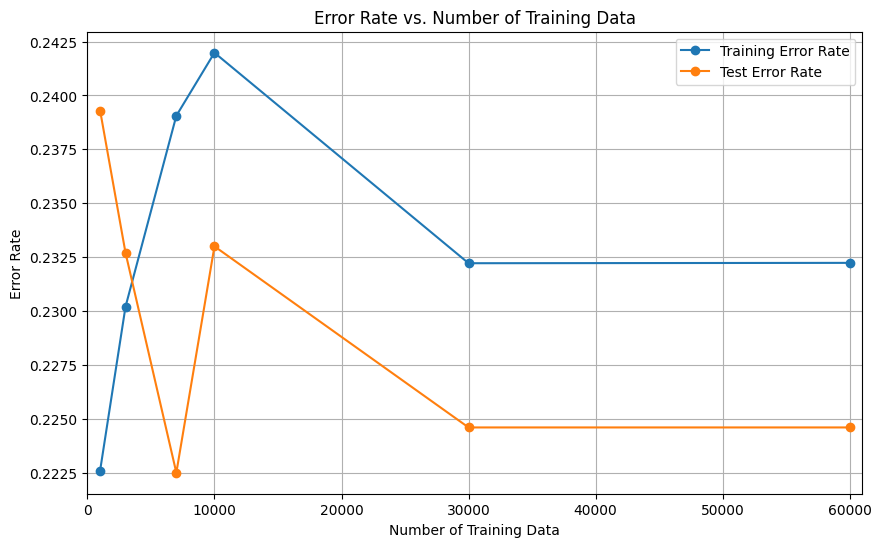

In [57]:
# Load the error rates for each data size
data_sizes = [1000, 3000, 7000, 10000, 30000, 60000]
train_error_rates_data = []
test_error_rates_data = []

for data_size in data_sizes:
    train_error_rates_data = load_object("number_error_rate_train_data_" + str(data_size) + ".pkl","../results/experiments_mnist")
    test_error_rates_data = load_object("number_error_rate_test_data_" + str(data_size) + ".pkl","../results/experiments_mnist")
    
# Plotting the error rates for different numbers of training data
plt.figure(figsize=(10, 6))
plt.plot(data_sizes, train_error_rates_data, label='Training Error Rate', marker='o')
plt.plot(data_sizes, test_error_rates_data, label='Test Error Rate', marker='o')

plt.xlim(0, max(data_sizes) + 1000)
plt.xlabel('Number of Training Data')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Training Data')
plt.legend()
plt.grid(True)
plt.show()


## 3.2. With pretraining

In [ ]:
n_samples, n_visible = mnist_train.shape  # n_samples, n_features
n_classes = mnist_test_labels.shape[1]

# Defining different sizes for the subsets ensuring equal representation for each class
data_sizes = [1000, 3000, 7000, 10000, 30000, 60000]
num_classes = len(np.unique(mnist_train_labels))
layer_loss_data = []
layer_error_rate_train_data = []
layer_error_rate_test_data = []

for data_size in data_sizes:
    num_samples_per_class = data_size // num_classes
    subset_train_data, subset_train_labels = create_stratified_subset(binary_mnist_train, mnist_train_labels, num_samples_per_class)
    
    hidden_layer_sizes = [500] * 1  # Fixer le nombre de couches à 2 avec 200 neurones chacune
    dnn = DNN(input_dim=n_visible, output_dim=n_classes, hidden_layer_sizes=hidden_layer_sizes, random_state=42)

    # pretrain
    dnn.train(binary_mnist_train, n_epochs=100, learning_rate=3e-4, batch_size=512)

    loss = dnn.backpropagation(subset_train_data, labels=subset_train_labels, n_epochs=200, learning_rate=3e-4, batch_size=512)
    layer_loss_data.append(loss)
    
    error_rate_train, _ = dnn.test(test_data=subset_train_data, true_labels=subset_train_labels)
    layer_error_rate_train_data.append(error_rate_train)  # Assurez-vous que error_rate_train est un scalaire

    error_rate_test, _ = dnn.test(test_data=binary_mnist_test, true_labels=mnist_test_labels)
    layer_error_rate_test_data.append(error_rate_test)  # Assurez-vous que error_rate_test est un scalaire

    # Save the lists with losses and error rates
    save_object(layer_loss_data, "pretrain_number_loss_data_" + str(data_size) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_train_data, "pretrain_number_error_rate_train_data_" + str(data_size) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_test_data, "pretrain_number_error_rate_test_data_" + str(data_size) + ".pkl","../results/experiments_mnist")


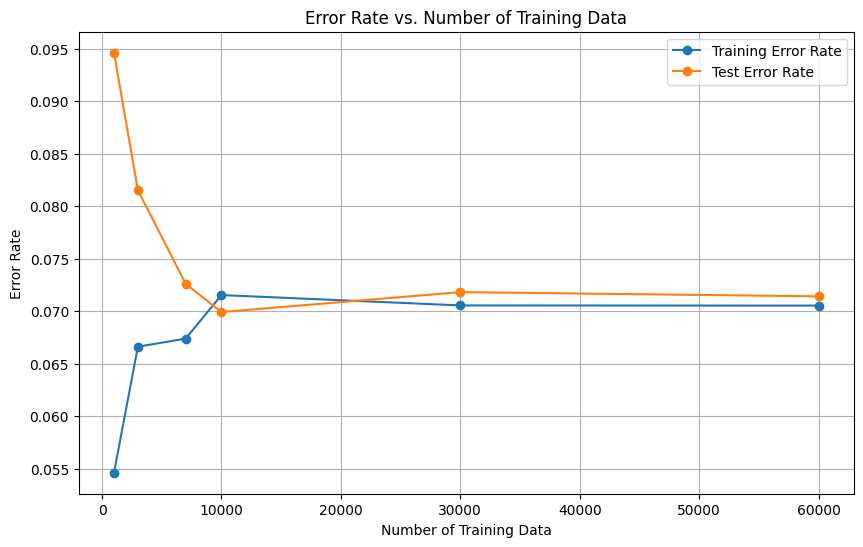

In [26]:
# Load the error rates for each data size
data_sizes = [1000, 3000, 7000, 10000, 30000, 60000]
train_error_rates_data = []
test_error_rates_data = []

for data_size in data_sizes:
    train_error_rates_data = load_object("pretrain_number_error_rate_train_data_" + str(data_size) + ".pkl", "../results/experiments_mnist")
    test_error_rates_data = load_object("pretrain_number_error_rate_test_data_" + str(data_size) + ".pkl", "../results/experiments_mnist")
    
# Plotting the error rates for different numbers of training data
plt.figure(figsize=(10, 6))
plt.plot(data_sizes, train_error_rates_data, label='Training Error Rate', marker='o')
plt.plot(data_sizes, test_error_rates_data, label='Test Error Rate', marker='o')

plt.xlabel('Number of Training Data')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Training Data')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
test_error_rates_data

[0.09460000000000002,
 0.08150000000000002,
 0.0726,
 0.06989999999999996,
 0.07179999999999997,
 0.07140000000000002]